In [1]:
# !pip install pandas matplotlib numpy

import os 
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


In [45]:
%pip install --no-cache-dir "numpy==2.1.*" "pandas==2.2.*"

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


This cell just takes the mice that matter `["6357", "6359", "7999", "8001", "8002", "9493", "9494", "9496", "9497", "8938", "8939", "8941", "9129", "9257", "9258", "9259", "9260", "8549", "8550", "8551", "8552", "11038", "11039", "11040", "11268", "11269", "11270", "11271", "11272"]
` and creates a copy that is named mouseID_session_ID_trial_info.csv that we will work with, as a back-up. 

> In this case, this was already ran this and the files are already in BOX, so don't run this again for now 

In [27]:

#define the path to the mouse data
main_path = 'C:/Users/shahd/Box/Awake Project/Maze data/simplermaze'

#these are the mice we are interested in
mice_that_matter = ["6357", "6359", "7999", "8001", "8002", "9493", "9494", "9496", "9497", "8938", "8939", "8941", "9129", "9257", "9258", "9259", "9260", "8549", "8550", "8551", "8552", "11038", "11039", "11040", "11268", "11269", "11270", "11271", "11272"]


mouse_data = []
for mouse in os.listdir(main_path):
    mid = next(
        (m for m in mice_that_matter 
         if f"mouse{m}" in mouse 
         or f"mouse {m}" in mouse 
         or f"MOUSE{m}" in mouse),
        None
    )

    if mid:  # if a match was found
        mouse_data.append(mouse)

        mouse_dir  = main_path + "/" + mouse
        print(mouse)

        for sessions in os.listdir(mouse_dir):
            sessions_dir = mouse_dir + "/" + sessions

            #rename the sessions to make sure that session_ID all has the same format, aka session#.#

            sessions= sessions.replace(" ", "") #remove spaces
            sessions= sessions.replace("_", "") # remove _ 

            sessions = sessions.replace("habituation", "session1.1") #change habituation with 1.1

            session_ID = sessions[-10:] #I'm sure there is a quicker way to do this but I don't know it lol
            print("    "+ session_ID)

            if "csv" not in sessions:

                for files in os.listdir(sessions_dir):

                    # only get files that have session_data and .csv in the name
                    if ".csv" in files and "session_data" in files:

                        source_file = os.path.join(sessions_dir, files)
                        new_name    = f"mouse{mid}_{session_ID}_trial_info.csv"
                        new_file    = os.path.join(sessions_dir, new_name)

                        if os.path.exists(new_file):
                            print(f"        {new_name} already exists — skipping")
                        else:
                            print("        " + files)
                            print(f"copying {source_file} into {new_file}")
                            shutil.copy2(source_file, new_file)  # copy2 keeps metadata
                        
print(len(mouse_data))


mouse 11038
    session1.1
        session_data_2025-08-28_13_05_44.csv
copying C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 11038/2025-08-28_13_05_44_11038_session_1.1\session_data_2025-08-28_13_05_44.csv into C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 11038/2025-08-28_13_05_44_11038_session_1.1\mouse11038_session1.1_trial_info.csv
    session3.1
        session_data_2025-08-29_09_48_13.csv
copying C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 11038/2025-08-29_09_48_13_11038_session_3.1\session_data_2025-08-29_09_48_13.csv into C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 11038/2025-08-29_09_48_13_11038_session_3.1\mouse11038_session3.1_trial_info.csv
    session3.2
        session_data_2025-09-02_10_31_59.csv
copying C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mouse 11038/2025-09-02_10_31_59_11038_session_3.2\session_data_2025-09-02_10_31_59.csv into C:/Users/shahd/Box/Awake Project/Maze data/simplermaze/mous

this cell essentially stores all these files in a list called `all_mice_sessions`

In [47]:
main_path = 'C:/Users/shahd/Box/Awake Project/Maze data/simplermaze'

all_mice_sessions = []

for mouse in os.listdir(main_path):
    if "mouse" in mouse or "MOUSE" in mouse:
        mouse_path = os.path.join(main_path, mouse)

        for sessions in os.listdir(mouse_path):
            session_path = os.path.join(mouse_path, sessions)

            
            if "csv" not in sessions:

                for file in os.listdir(session_path):
                    if "trial_info.csv" in file and "clean" not in file: 
                        # os.remove(session_path + "/" + file)

                        all_mice_sessions.append(session_path + "/" + file)
                        
                        # check if there is any inconsistency with the naming
                        if "session" not in file:
                            print(file)
            
        
print(len(all_mice_sessions))
# chack the naming
for i in all_mice_sessions:
    folder = os.path.dirname(i)
    fname = os.path.basename(i)
    print (fname)

mouse8002_2sesson3.1_trial_info.csv
mouse8549_sessoin3.1_trial_info.csv
mouse8551_essiion3.3_trial_info.csv
mouse8938_2023489381_trial_info.csv
mouse8938_ession3.10_trial_info.csv
mouse8938_ession3.11_trial_info.csv
mouse8938_ession3.12_trial_info.csv
mouse8939_0282091291_trial_info.csv
mouse8939_62789393.1_trial_info.csv
mouse8939_ession3.10_trial_info.csv
mouse8939_ession3.11_trial_info.csv
mouse8939_ession3.12_trial_info.csv
mouse8941_4273389411_trial_info.csv
mouse8941_ession3.10_trial_info.csv
mouse8941_ession3.11_trial_info.csv
mouse8941_ession3.12_trial_info.csv
mouse9129_ession3.10_trial_info.csv
mouse9129_ession3.11_trial_info.csv
mouse9129_ession3.12_trial_info.csv
300
mouse11038_session1.1_trial_info.csv
mouse11038_session3.1_trial_info.csv
mouse11038_session3.2_trial_info.csv
mouse11038_session3.3_trial_info.csv
mouse11038_session3.4_trial_info.csv
mouse11038_session3.5_trial_info.csv
mouse11038_session3.6_trial_info.csv
mouse11038_session3.7_trial_info.csv
mouse11039_sessi

this script is the one used to fix a lil naming mistake I made, nothing major. 
But it's important to note that once Shahd will have the session id of the ones that are just numbers, this is the cell that will need to be modified. 

DONE

In [48]:
import os



for i in all_mice_sessions:
    folder = os.path.dirname(i)
    fname = os.path.basename(i)

    if "session" not in fname:
        snippet = fname.split("_")[1]  # part after first "_"
        print(snippet)

        if "ession" in snippet:
            snippet = snippet.replace("ession", "session")
        elif "sesson" in snippet:
            snippet = snippet.replace("sesson", "session")
        elif "sessoin" in snippet:
            snippet = snippet.replace("sessoin", "session")
        elif "2sesson" in snippet:
            snippet = snippet.replace("2sesson", "session")
        elif "essiion" in snippet:
            snippet = snippet.replace("essiion", "session")
        elif "essiion" in snippet:
            snippet = snippet.replace("essiion", "session")
        


        print(snippet)
        if "session" not in snippet:
            # tailor the name to the individual trial
            if "mouse8939" in fname and "3.1" in fname:
                snippet = "session3.1"
            elif "mouse9129_0282091291" in fname:
                snippet = "session1.2"
            
            else:
                snippet = "session1.1"

        mid = fname.split("_")[0]  # part before "_", the mouse_ID
        new_name = f"{mid}_{snippet}_trial_info.csv"
        new_path = os.path.join(folder, new_name)

        if os.path.exists(new_path):
            print(f"SKIPPING (already exists): {new_path}")
            continue

        print("RENAMING:", i, "->", new_path)
        os.rename(i, new_path)


2sesson3.1
2session3.1
SKIPPING (already exists): C:/Users/shahd/Box/Awake Project/Maze data/simplermaze\MOUSE8002\2024-12-12_15_57_188002sesson3.1\mouse8002_2session3.1_trial_info.csv
sessoin3.1
session3.1
RENAMING: C:/Users/shahd/Box/Awake Project/Maze data/simplermaze\MOUSE8549\2025-01-16_13_23_358549sessoin3.1/mouse8549_sessoin3.1_trial_info.csv -> C:/Users/shahd/Box/Awake Project/Maze data/simplermaze\MOUSE8549\2025-01-16_13_23_358549sessoin3.1\mouse8549_session3.1_trial_info.csv
essiion3.3
session3.3
RENAMING: C:/Users/shahd/Box/Awake Project/Maze data/simplermaze\MOUSE8551\2025-01-20_16_31_208551sessiion3.3/mouse8551_essiion3.3_trial_info.csv -> C:/Users/shahd/Box/Awake Project/Maze data/simplermaze\MOUSE8551\2025-01-20_16_31_208551sessiion3.3\mouse8551_session3.3_trial_info.csv
2023489381
2023489381
SKIPPING (already exists): C:/Users/shahd/Box/Awake Project/Maze data/simplermaze\mouse8938\2025-02-18_12_02_34_8938_session_1.1\mouse8938_session1.1_trial_info.csv
ession3.10
sessi

Here we sort the .csvs in `all_mice_sessions` into another variable called `all_mice_sessions_sorted`. Is it necessary? not really. But it helps me understand 

In [49]:
main_path = 'C:/Users/shahd/Box/Awake Project/Maze data/simplermaze'

all_mice_sessions = []

for mouse in os.listdir(main_path):
    if "mouse" in mouse or "MOUSE" in mouse:
        mouse_path = os.path.join(main_path, mouse)

        for sessions in os.listdir(mouse_path):
            session_path = os.path.join(mouse_path, sessions)

            if ".csv" not in sessions:

                for file in os.listdir(session_path):
                    if "session" in file and "trial_info.csv" in file and "clean" not in file: 
                        # os.remove(session_path + "/" + file)

                        all_mice_sessions.append(session_path + "/" + file)
                        
                        # check if there is any inconsistency with the naming
                        if "session" not in file:
                            print(file)

def key(p):
    fname = os.path.basename(p) # gets just the filename and not the whole path to get to it
    parts = fname.replace(".csv", "").split("_")  # ["mouse8938", "session3.10", "trial", "info"]
    mouse = parts[0].replace("mouse", "")
    session = parts[1].replace("session", "")
    major, *minor = session.split(".")
    return int(mouse), int(major), int(minor[0]) if minor else 0

all_mice_sessions_sorted = sorted(all_mice_sessions, key=key)

for i in all_mice_sessions_sorted:
    print(i)



C:/Users/shahd/Box/Awake Project/Maze data/simplermaze\mouse 6357\habituation/mouse6357_session1.1_trial_info.csv
C:/Users/shahd/Box/Awake Project/Maze data/simplermaze\mouse 6357\session 3.1/mouse6357_session3.1_trial_info.csv
C:/Users/shahd/Box/Awake Project/Maze data/simplermaze\mouse 6357\2024-08-21_11_14_226357session3.2/mouse6357_session3.2_trial_info.csv
C:/Users/shahd/Box/Awake Project/Maze data/simplermaze\mouse 6357\2024-08-22_14_33_316357session3.3/mouse6357_session3.3_trial_info.csv
C:/Users/shahd/Box/Awake Project/Maze data/simplermaze\mouse 6357\2024-08-23_10_42_226357session3.4/mouse6357_session3.4_trial_info.csv
C:/Users/shahd/Box/Awake Project/Maze data/simplermaze\mouse 6357\2024-08-27_13_05_196357session3.5/mouse6357_session3.5_trial_info.csv
C:/Users/shahd/Box/Awake Project/Maze data/simplermaze\mouse 6357\2024-08-28_11_58_146357session3.6/mouse6357_session3.6_trial_info.csv
C:/Users/shahd/Box/Awake Project/Maze data/simplermaze\mouse 6357\2024-08-29_10_23_026357ses

Now we start modifying the datasets. 
1. First thing first, rew_location/area_rewarded are a character, while first_reward_area_visited is rew + character, so we need to add a new column, like `first_rew_area_visited_char` where we just get the final character and apply it to all these datasets. 
   
2. Second, this doesn't really tell us if the mouse eventually reached the reward area, so we need to add a `has_reached_rew_area`. This basically checks rew_location and then will check if any time was spent in any of the rew columns (it would need to be !=0)
3. ~~In some trials the mouse was not detected to have entered the maze but the mouse went to the correct rew_area, so if `first_rew_area_visited_char`== `rew_location` then hit = 1, miss = incorrect = 0~~
 checks the amount of times the mouse entered the right `rew_area` but `hit != 1`


This outputs a new .csv file called `clean_mouseID_sessionID_trial_info.csv` with the new columns and without the passive trials. 

In [50]:
def adjust_datasets(CSV_FILE):
    df = pd.read_csv(CSV_FILE)


    #total number of trials - times the mouse went in and out of the maze
    tot_n_trials= len(df)


    df = df.dropna(subset=['first_reward_area_visited'])

    n_active_trials = len(df)

    # Convert NaN elsewhere to 0 (after selecting active)
    df = df.fillna(0)

    # Safer numeric conversion (avoid FutureWarning)
    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col], downcast="integer")
        except (ValueError, TypeError):
            pass

    if "first_rew_area_visited_char" not in df.columns:
    # insert column "first_rew_area_visited_char" that contains only the last character of the

        df.insert(5, "first_rew_area_visited_char", df["first_reward_area_visited"].astype(str).str[-1])

    if "has_reached_rew_area" not in df.columns:

        # now we check if the mouse ever got to the correct ROI 
        rew_letter= df["rew_location"].astype(str).str.strip().str.upper()
        rew_cols   = "rew" + rew_letter

        #row indices 
        rows = np.arange(len(df))

        # get the correct values from the matching column for each row
        values = df[rew_cols].to_numpy()[rows, np.arange(len(df))]


        df.insert(6, "has_reached_rew_area",(values != 0).astype(int))

        # now let's correct the incorrect hits/misses/incorrects 
        # condition: first_rew_area_visited_char equals rew_location

        # update hit/miss/incorrect accordingly
        # df.loc[mask, ["hit", "miss", "incorrect"]] = [1, 0, 0]
        out_path = os.path.join(os.path.dirname(CSV_FILE), "clean_" + os.path.basename(CSV_FILE))
        df.to_csv(out_path, index=False)


    mask = (df["first_rew_area_visited_char"] == df["rew_location"]) & (df["hit"] != 1)
    mismatch_count = mask.sum()

    # number of times the mouse entered the maze and actually entered at least a rew area
    n_active_trials = len(df)
    


    #percentages of wrong rejection over total amount of trials
    perc_wrong_rej_tot = round((mismatch_count / tot_n_trials) * 100, 2)
    #percentages of wrong rejection over active trials
    perc_wrong_rej_act = round((mismatch_count / n_active_trials) * 100, 2)

    #get the amount of hits
    hits = int((df["hit"] == 1).sum())

    



    name= os.path.basename(CSV_FILE)[:20]

    # print(f'-   {name} has {mismatch_count} trials where the mouse was incorrectly non rewarded, over {tot_n_trials} times it went in the maze, and {n_active_trials} active trials where the mouse reached at least one reward area\n'+
    #     f'This means {perc_wrong_rej_tot}% misdetection in total, {perc_wrong_rej_act}% misdetection in active trials')

    print(f"converted {name}")
    return name, mismatch_count, hits,  n_active_trials,  tot_n_trials, perc_wrong_rej_act, perc_wrong_rej_tot






the cell below generates a dataframe and .csv file named `mismatch_summary.csv` containing the mouse_id, mismatch count, and the number of trials (considered as total amount of times the mouse went in and out of the maze), and active trials (as in the times the mouse entered the maze and reached a rew area)

In [51]:
results =[]

for i in all_mice_sessions_sorted:
    if "session3" in i:
        results.append(adjust_datasets(i))

#make a csv 
columns = ["file", "mismatch_count", "hits", "tot_active_trials", "tot_trials", 
           "perc_wrong_rej_active", "perc_wrong_rej_tot"]
summary_df = pd.DataFrame(results, columns=columns)


# save the csv 
main_path = 'C:/Users/shahd/Box/Awake Project/Maze data/simplermaze'
summary_csv_path = os.path.join(main_path, "mismatch_summary.csv")
summary_df.to_csv(summary_csv_path, index=False)

summary_df

converted mouse6357_session3.1
converted mouse6357_session3.2
converted mouse6357_session3.3
converted mouse6357_session3.4
converted mouse6357_session3.5
converted mouse6357_session3.6
converted mouse6357_session3.7
converted mouse6357_session3.8
converted mouse6359_session3.1
converted mouse6359_session3.2
converted mouse6359_session3.3
converted mouse6359_session3.4
converted mouse6359_session3.5


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse6359_session3.6
converted mouse6359_session3.7


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse6359_session3.8


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse7999_session3.1


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse7999_session3.2


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse7999_session3.3


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse7999_session3.4


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse7999_session3.5


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse7999_session3.6


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse7999_session3.7


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse7999_session3.8


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse7999_9session3.


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse8001_session3.1


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse8001_session3.2


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse8001_session3.3


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse8001_session3.4


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse8001_session3.5


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse8001_session3.6


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse8001_session3.7


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse8001_session3.8
converted mouse8001_1session3.


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse8002_session3.1


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse8002_session3.2


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse8002_session3.3


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse8002_session3.4


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse8002_session3.5


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse8002_session3.6


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse8002_session3.7


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encount

converted mouse8002_2session3.
converted mouse8002_2session3.
converted mouse8002_2session3.
converted mouse8549_session3.1


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse8549_session3.2


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse8549_session3.3
converted mouse8549_session3.4
converted mouse8549_session3.5
converted mouse8549_session3.6
converted mouse8549_session3.7
converted mouse8549_session3.8


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse8550_session3.1


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse8550_session3.2


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse8550_session3.3
converted mouse8550_session3.4
converted mouse8550_session3.5
converted mouse8550_session3.6
converted mouse8550_session3.7
converted mouse8550_session3.8


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse8551_session3.1


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)
C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse8551_session3.2
converted mouse8551_session3.3
converted mouse8551_session3.4
converted mouse8551_session3.5
converted mouse8551_session3.6
converted mouse8551_session3.7
converted mouse8551_session3.8


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse8552_session3.1


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse8552_session3.2
converted mouse8552_session3.3
converted mouse8552_session3.4
converted mouse8552_session3.5
converted mouse8552_session3.6
converted mouse8552_session3.7
converted mouse8552_session3.8
converted mouse8938_session3.1
converted mouse8938_session3.2
converted mouse8938_session3.3
converted mouse8938_session3.4
converted mouse8938_session3.5
converted mouse8938_session3.6
converted mouse8938_session3.7
converted mouse8938_session3.8
converted mouse8938_session3.8
converted mouse8938_session3.9
converted mouse8938_session3.1
converted mouse8938_session3.1
converted mouse8938_session3.1
converted mouse8939_session3.1


C:\Users\shahd\AppData\Local\Temp\ipykernel_36516\3872644376.py:61: RuntimeWarning: invalid value encountered in scalar divide
  perc_wrong_rej_tot = round((mismatch_count / tot_n_trials) * 100, 2)
C:\Users\shahd\AppData\Local\Temp\ipykernel_36516\3872644376.py:63: RuntimeWarning: invalid value encountered in scalar divide
  perc_wrong_rej_act = round((mismatch_count / n_active_trials) * 100, 2)


converted mouse8939_session3.1
converted mouse8939_session3.2
converted mouse8939_session3.3
converted mouse8939_session3.4
converted mouse8939_session3.5
converted mouse8939_session3.6
converted mouse8939_session3.7
converted mouse8939_session3.8
converted mouse8939_session3.8
converted mouse8939_session3.9
converted mouse8939_session3.1
converted mouse8939_session3.1
converted mouse8939_session3.1
converted mouse8941_session3.1
converted mouse8941_session3.2
converted mouse8941_session3.3
converted mouse8941_session3.4
converted mouse8941_session3.5
converted mouse8941_session3.6
converted mouse8941_session3.7
converted mouse8941_session3.8
converted mouse8941_session3.9
converted mouse8941_session3.1
converted mouse8941_session3.1
converted mouse8941_session3.1
converted mouse9129_session3.1
converted mouse9129_session3.2
converted mouse9129_session3.3
converted mouse9129_session3.4
converted mouse9129_session3.5
converted mouse9129_session3.6
converted mouse9129_session3.7
converte

C:\Users\shahd\AppData\Local\Temp\ipykernel_36516\3872644376.py:63: RuntimeWarning: invalid value encountered in scalar divide
  perc_wrong_rej_act = round((mismatch_count / n_active_trials) * 100, 2)


converted mouse9494_session3.4
converted mouse9494_session3.5
converted mouse9494_session3.6
converted mouse9494_session3.7
converted mouse9496_session3.1
converted mouse9496_session3.2
converted mouse9496_session3.3
converted mouse9496_session3.4
converted mouse9496_session3.5
converted mouse9496_session3.6
converted mouse9496_session3.7


C:\Users\shahd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\cast.py:377: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


converted mouse9496_session3.8
converted mouse9497_session3.1
converted mouse9497_session3.2
converted mouse9497_session3.3
converted mouse9497_session3.4


PermissionError: [Errno 13] Permission denied: 'C:/Users/shahd/Box/Awake Project/Maze data/simplermaze\\mouse9497\\2025-04-11_13_17_13_9497_session_3.5\\clean_mouse9497_session3.5_trial_info.csv'

In [52]:
#this is to calculate the time spent in each rewroi 

import pandas as pd
import matplotlib.pyplot as plt

def calculate_arm_times(filepaths):
    results = {}
    for path in filepaths:
        df = pd.read_csv(path)

        # Drop passive trials 
        df = df.dropna(subset=['first_reward_area_visited'])

        # Clip negative times
        for col in ["entrance1", "entrance2", "rewA", "rewB", "rewC", "rewD"]:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors="coerce")
                df[col] = df[col].mask(df[col] < 0, pd.NA)

        # Ensure numeric trial timings
        df['trial_start_time'] = pd.to_numeric(df['trial_start_time'], errors='coerce')
        df['end_trial_time'] = pd.to_numeric(df['end_trial_time'], errors='coerce')
        df['trial_duration'] = (df['end_trial_time'] - df['trial_start_time']) / 1000.0  # ms → s

        # Calculate total time spent in each arm (ms → s)
        arm_times = {arm: df[arm].sum(skipna=True) / 1000.0 for arm in ['rewA', 'rewB', 'rewC', 'rewD']}

        # Proportions
        total_time = sum(arm_times.values())
        arm_props = {f"{arm}_prop": (t / total_time if total_time > 0 else 0) for arm, t in arm_times.items()}

        results[path] = {**arm_times, **arm_props}

    return pd.DataFrame(results).T


def plot_arm_preference(summary_df, mouse_id=None):
    # Absolute times
    ax = summary_df[['rewA', 'rewB', 'rewC', 'rewD']].plot(
        kind='bar', figsize=(10, 6), rot=45
    )
    ax.set_ylabel("Total Time (s)")
    title = "Time Spent in Each Arm per Session"
    if mouse_id:
        title += f" (Mouse {mouse_id})"
    ax.set_title(title)
    ax.legend(title="Arm")
    plt.tight_layout()
    plt.show()

    # Proportions
    prop_cols = ['rewA_prop', 'rewB_prop', 'rewC_prop', 'rewD_prop']
    ax = summary_df[prop_cols].plot(
        kind='bar', stacked=True, figsize=(10, 6), rot=45
    )
    ax.set_ylabel("Proportion of Time")
    title = "Proportion of Time in Each Arm per Session"
    if mouse_id:
        title += f" (Mouse {mouse_id})"
    ax.set_title(title)
    ax.legend(title="Arm")
    plt.tight_layout()
    plt.show()




Mouse 6357 summary:
                rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session1.1   178.947  177.822  197.451  284.820   0.213276   0.211935   
session 3.1  176.331  151.731  338.367   99.834   0.230118   0.198014   
session3.2   158.248  154.634  381.473  122.167   0.193807   0.189381   
session3.3   144.098  156.272  329.642  114.214   0.193621   0.209979   
session3.4    68.793  281.224  390.410  197.809   0.073322   0.299737   
session3.5   133.303   73.806  208.455   89.889   0.263730   0.146020   
session3.6   160.859  883.860  171.957  141.542   0.118434   0.650750   
session3.7   354.690  319.877  123.411   67.568   0.409788   0.369567   
session3.8   436.529  452.442  497.784   42.206   0.305487   0.316623   

             rewC_prop  rewD_prop  
session1.1    0.235330   0.339459  
session 3.1   0.441581   0.130287  
session3.2    0.467193   0.149619  
session3.3    0.442933   0.153467  
session3.4    0.416111   0.210831  
session3.5    0.412412   0.17783

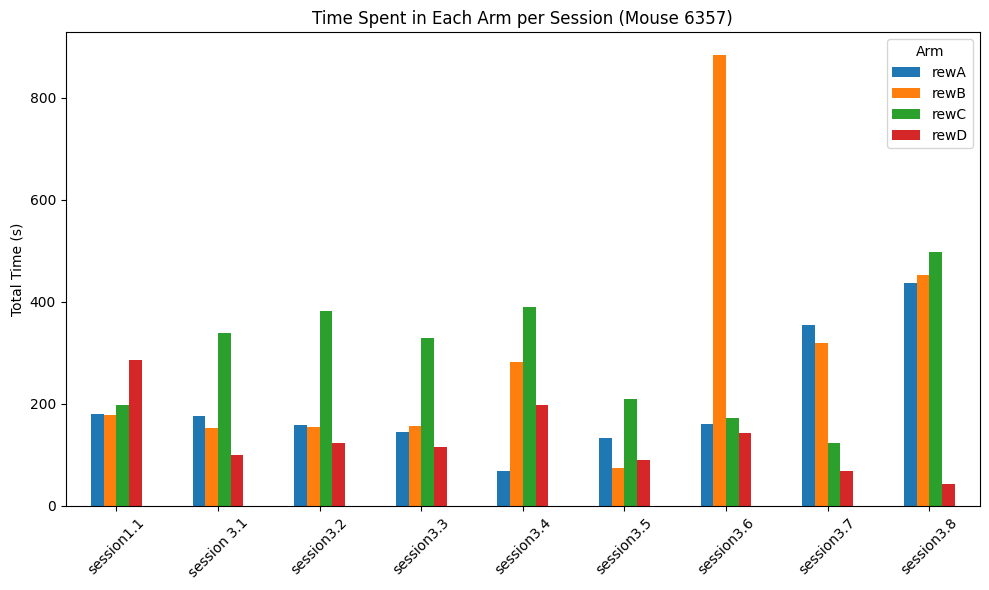

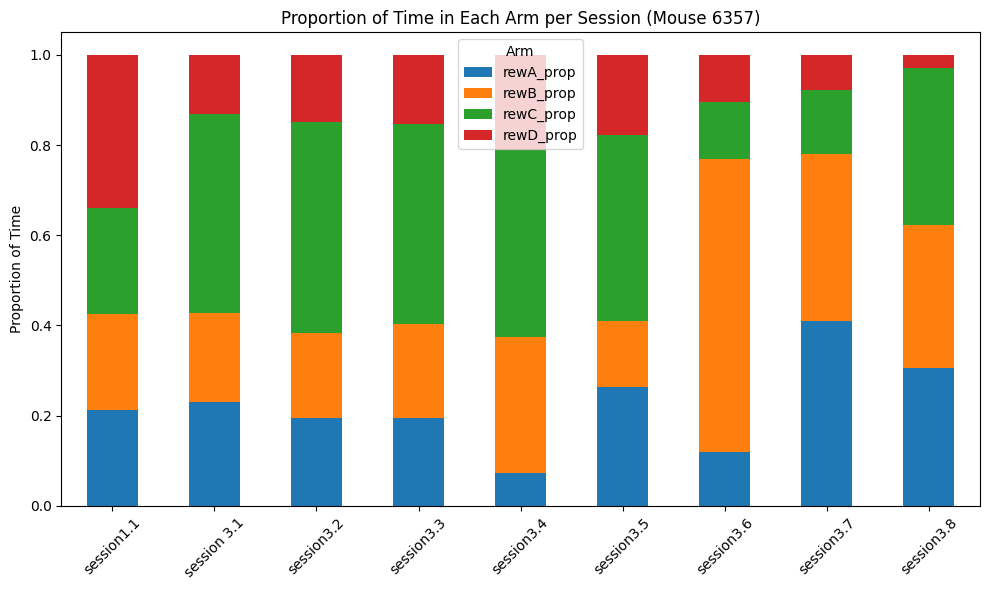


Mouse 6359 summary:
               rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session1.1  118.280  145.988  163.821  129.982   0.211944   0.261594   
session3.1   70.773   85.528  377.882   80.281   0.115178   0.139191   
session3.2  376.410  327.169  562.372  363.023   0.231072   0.200844   
session3.3  318.008  232.672  391.894  355.247   0.245032   0.179279   
session3.4  301.805  415.722  259.116   93.902   0.281917   0.388327   
session3.5  299.345  279.229  413.901   64.463   0.283219   0.264187   
session3.6  244.136  243.568  401.713  247.045   0.214821   0.214321   
session3.7  225.129  247.583  256.031   77.804   0.279127   0.306967   
session3.8  153.478  218.140  315.545   47.560   0.208892   0.296901   

            rewC_prop  rewD_prop  
session1.1   0.293549   0.232913  
session3.1   0.614978   0.130652  
session3.2   0.345231   0.222854  
session3.3   0.301963   0.273726  
session3.4   0.242041   0.087714  
session3.5   0.391604   0.060990  
session3.6   

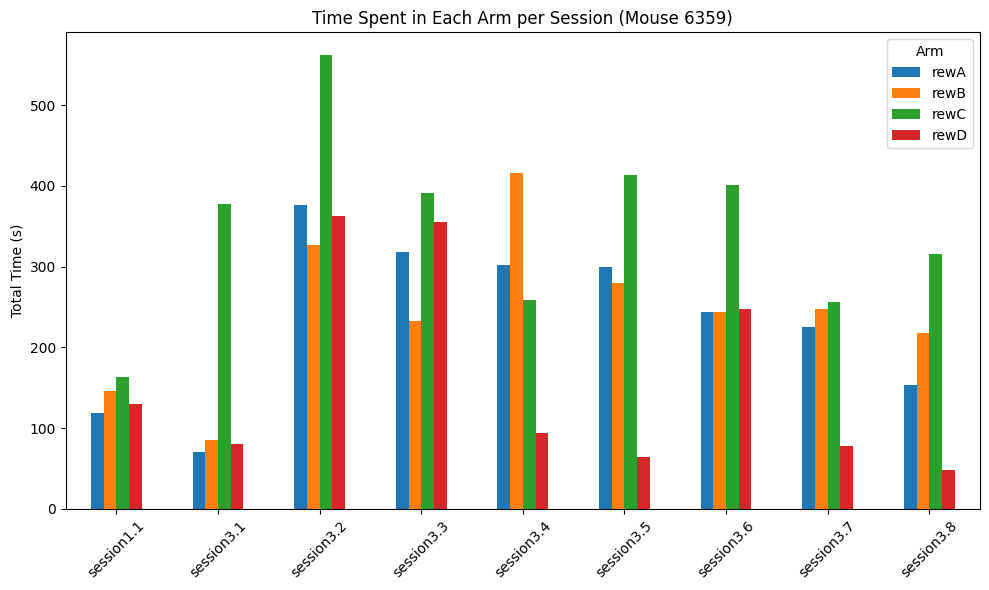

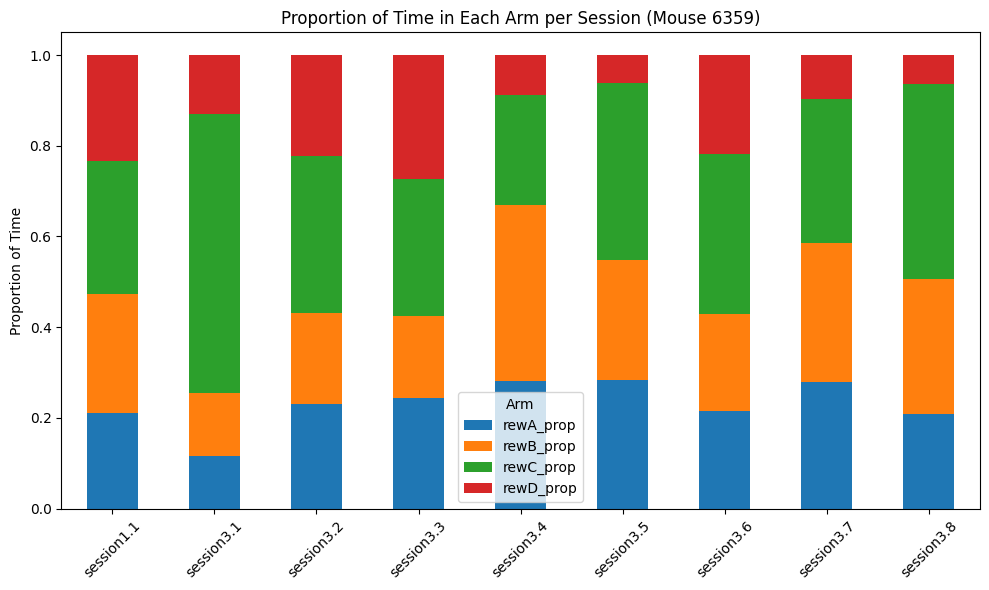


Mouse 7999 summary:
               rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session1.1  442.707  135.895  272.366  179.391   0.429663   0.131891   
session3.1  294.629  463.160  177.064  181.529   0.263914   0.414876   
session3.2  214.653  221.856  162.448  298.792   0.239101   0.247125   
session3.3  160.459   38.760   56.500  168.922   0.377870   0.091277   
session3.4   85.108   25.031   40.924   58.353   0.406406   0.119528   
session3.5   72.205   53.783   53.358   48.116   0.317438   0.236448   
session3.6   80.541   72.743  101.342   32.961   0.280058   0.252943   
session3.7   43.492   82.870   85.730   96.517   0.140929   0.268527   
session3.8  160.673  151.112  126.961  134.637   0.280219   0.263545   
session3.8  160.673  151.112  126.961  134.637   0.280219   0.263545   

            rewC_prop  rewD_prop  
session1.1   0.264341   0.174105  
session3.1   0.158605   0.162605  
session3.2   0.180950   0.332824  
session3.3   0.133054   0.397800  
session3.4 

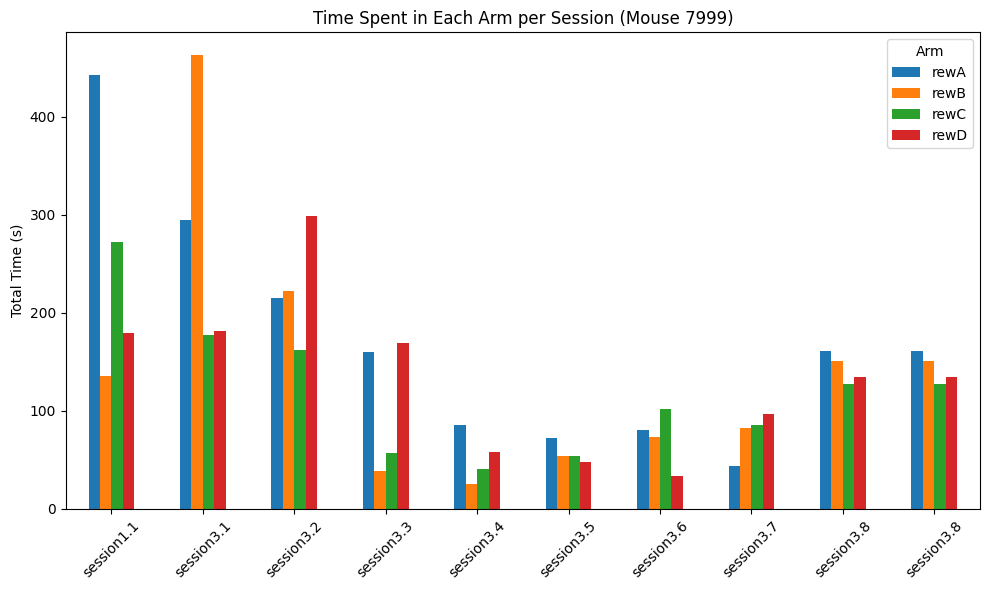

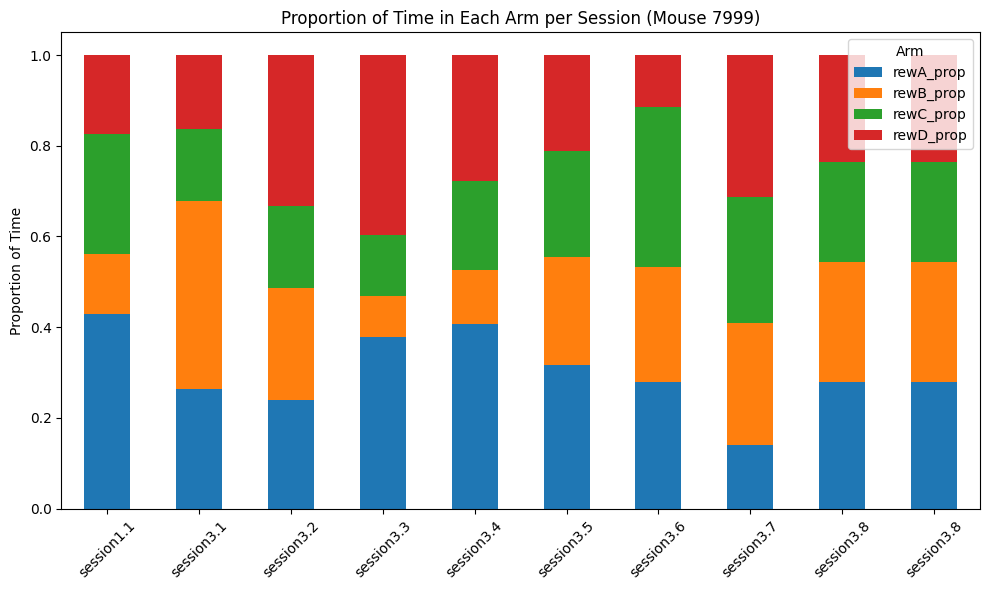


Mouse 8001 summary:
               rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session1.1   94.546   84.227  110.994  142.828   0.218555   0.194702   
session3.1  439.774  177.590  143.004   56.702   0.538233   0.217350   
session3.2   69.794   52.586   45.581   52.811   0.316136   0.238191   
session3.3   54.183  230.758   54.172   72.703   0.131571   0.560342   
session3.4   53.736   93.566  104.763   75.242   0.164176   0.285866   
session3.5  105.878  135.562  185.690   61.911   0.216501   0.277200   
session3.6   51.938  118.707  177.121   50.222   0.130501   0.298268   
session3.7  114.098  114.660  234.268  185.784   0.175857   0.176724   
session3.8   60.738   75.392  359.528  149.236   0.094183   0.116906   
session3.7  114.098  114.660  234.268  185.784   0.175857   0.176724   

            rewC_prop  rewD_prop  
session1.1   0.256577   0.330166  
session3.1   0.175021   0.069397  
session3.2   0.206462   0.239211  
session3.3   0.131544   0.176542  
session3.4 

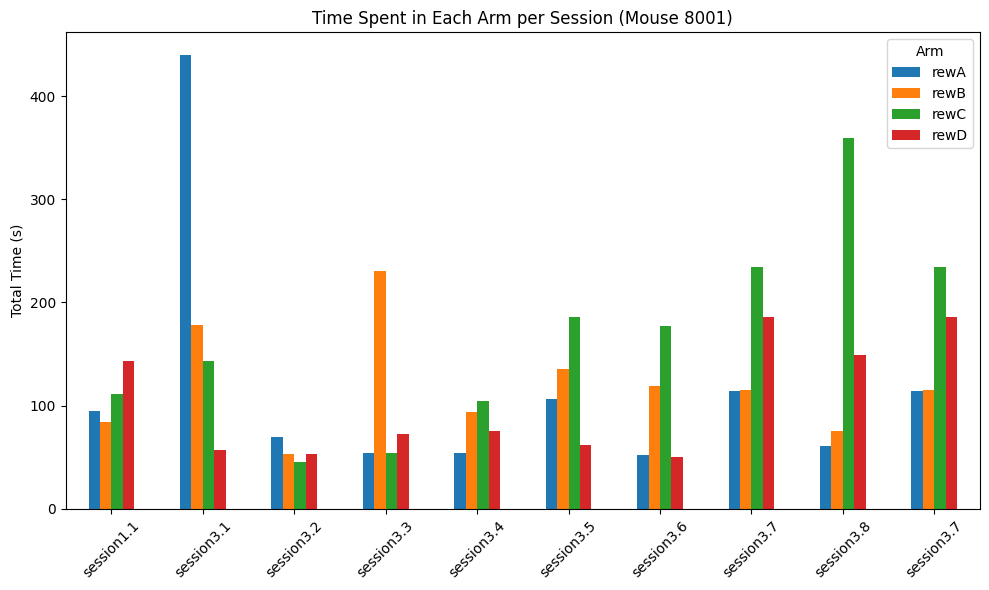

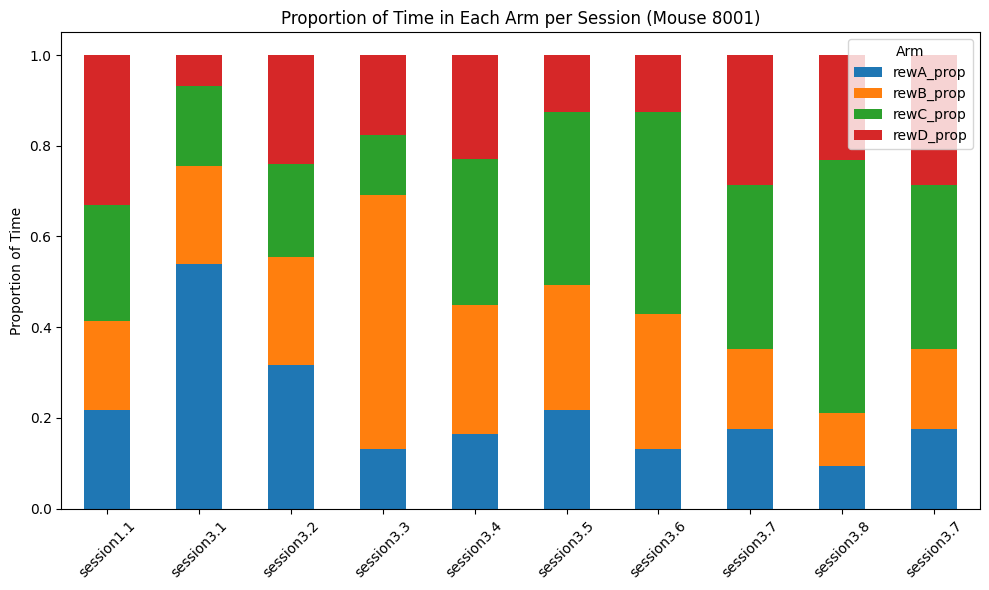


Mouse 8002 summary:
               rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session3.1  203.876  290.679  240.321  729.757   0.139199   0.198465   
session3.2   82.840   51.529   55.023   32.493   0.373347   0.232233   
session3.3  168.178   94.664  392.073  104.116   0.221569   0.124717   
session3.4  144.085  158.359  154.665   75.578   0.270487   0.297283   
session3.5  242.027  177.850  148.971  210.067   0.310723   0.228330   
session3.6  418.655  124.119  297.909  295.560   0.368456   0.109236   
session3.7  266.033   57.175  153.993  206.849   0.388909   0.083583   
session3.1  203.876  290.679  240.321  729.757   0.139199   0.198465   
session3.3  168.178   94.664  392.073  104.116   0.221569   0.124717   
session3.7  266.033   57.175  153.993  206.849   0.388909   0.083583   

            rewC_prop  rewD_prop  
session3.1   0.164083   0.498252  
session3.2   0.247980   0.146441  
session3.3   0.516544   0.137170  
session3.4   0.290349   0.141881  
session3.5 

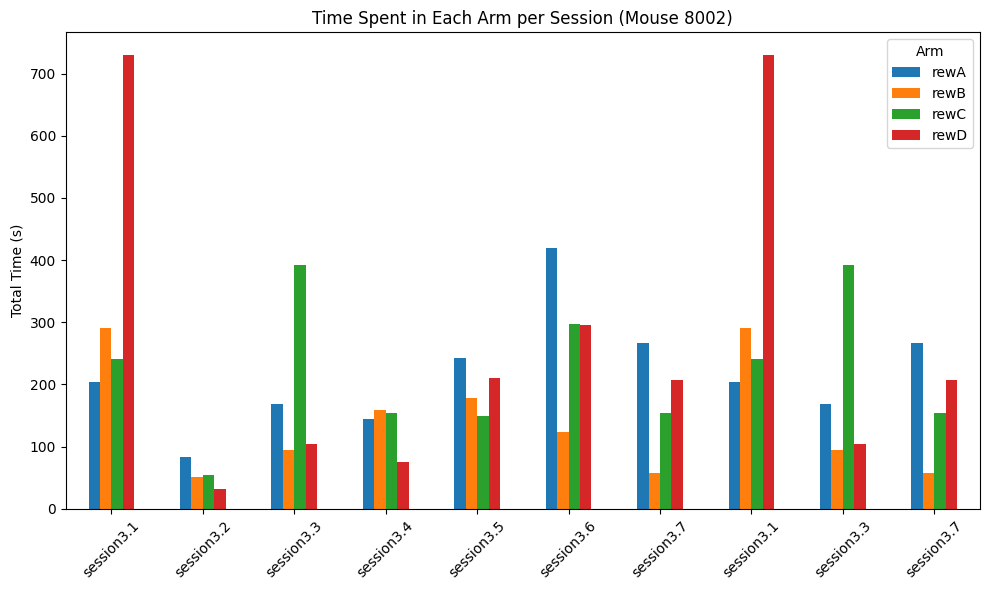

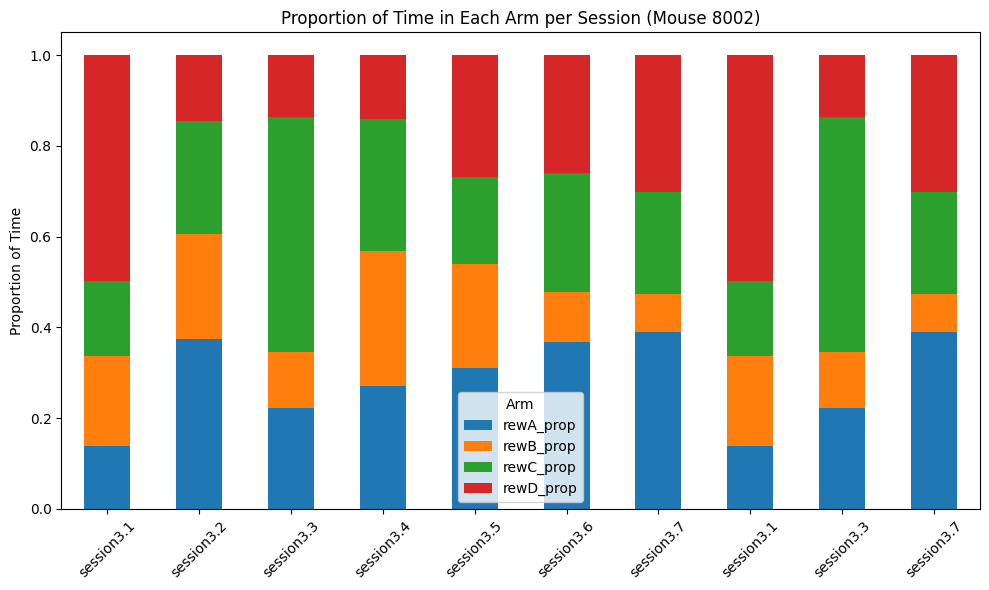


Mouse 9493 summary:
                rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session_1.1  208.795  119.843  103.602  194.010   0.333405   0.191366   
session_3.1  182.370   86.211   89.773  102.866   0.395408   0.186919   
session_3.2  272.814  180.401  146.327   85.865   0.398032   0.263203   
session_3.3  293.405   93.540  111.173   83.313   0.504626   0.160879   
session_3.4  240.912   68.117  194.186   52.599   0.433440   0.122554   
session_3.5  292.731   75.279   88.789   92.512   0.532906   0.137043   
session_3.6  197.036   42.825   54.659   78.394   0.528368   0.114839   
session_3.7  178.902  121.708   19.229   61.949   0.468590   0.318784   
session_3.8  267.532   28.631  113.818  561.491   0.275388   0.029472   

             rewC_prop  rewD_prop  
session_1.1   0.165432   0.309796  
session_3.1   0.194642   0.223030  
session_3.2   0.213489   0.125276  
session_3.3   0.191206   0.143290  
session_3.4   0.349372   0.094634  
session_3.5   0.161637   0.16841

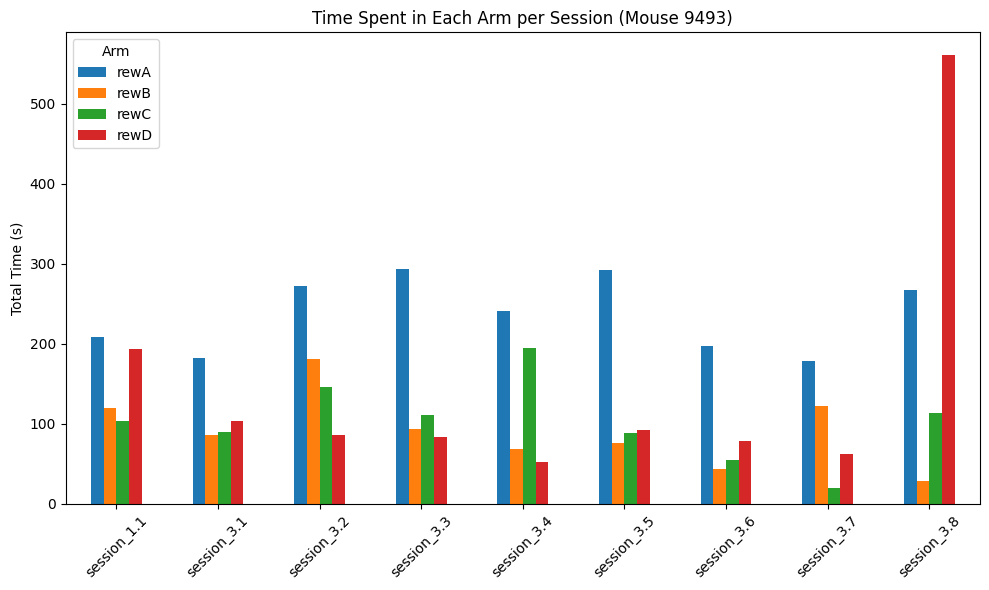

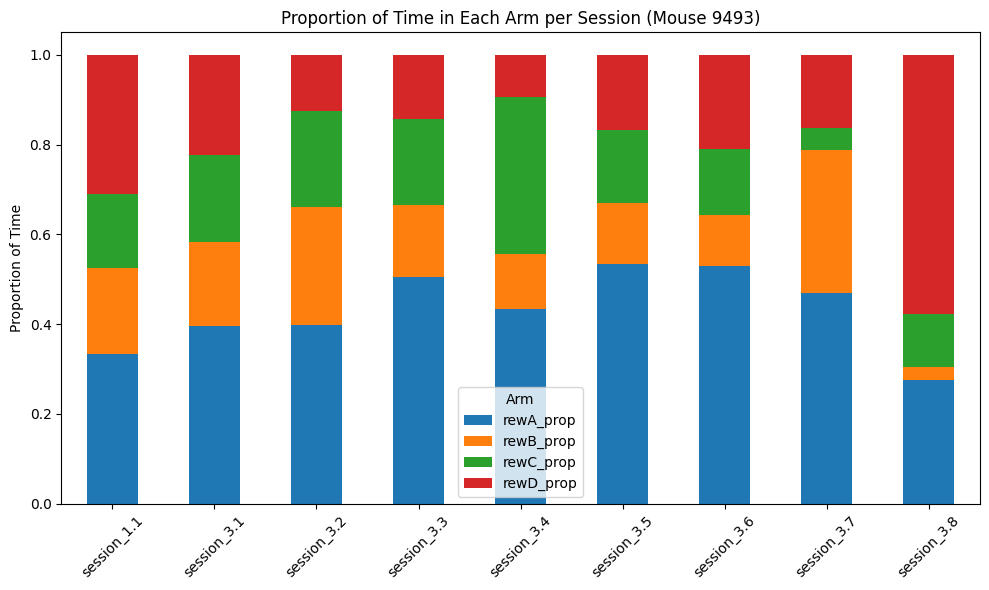


Mouse 9494 summary:
                rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session_1.1  317.559  197.784  127.222  159.998   0.395681   0.246440   
session_3.1  202.987   36.388  119.270  192.203   0.368499   0.066058   
session_3.2  178.233  132.679   39.574  107.769   0.388938   0.289531   
session_3.3  445.198   98.902   75.746  261.651   0.505048   0.112198   
session_3.4    0.000    0.000    0.000    0.000   0.000000   0.000000   
session_3.5  151.842   30.736  118.921  158.550   0.330056   0.066810   
session_3.6  320.891   37.556   82.874  212.007   0.491164   0.057484   
session_3.7  460.344  159.782  224.504  208.038   0.437312   0.151788   

             rewC_prop  rewD_prop  
session_1.1   0.158520   0.199359  
session_3.1   0.216521   0.348922  
session_3.2   0.086358   0.235173  
session_3.3   0.085929   0.296826  
session_3.4   0.000000   0.000000  
session_3.5   0.258496   0.344637  
session_3.6   0.126849   0.324503  
session_3.7   0.213271   0.197629

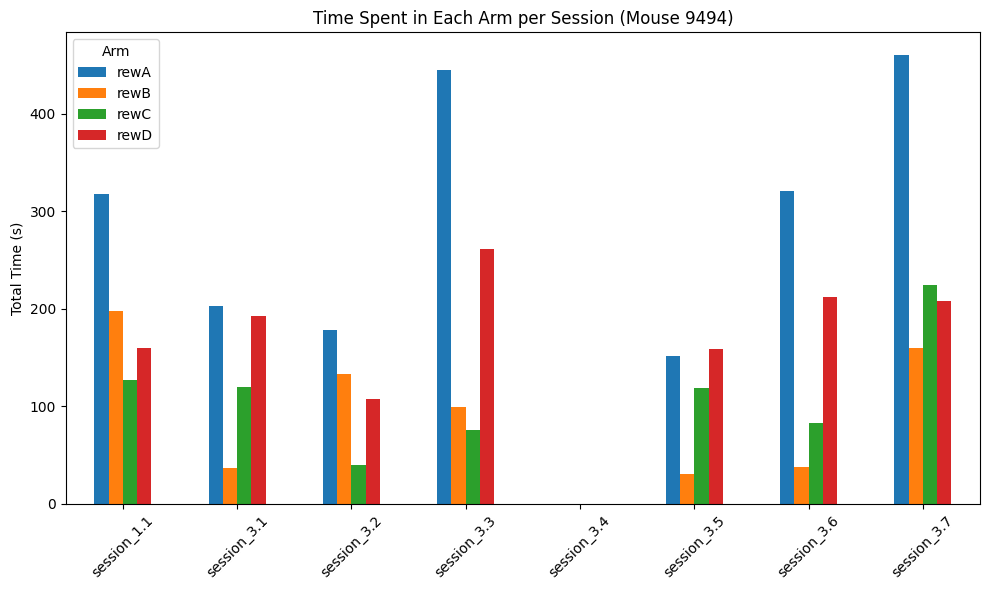

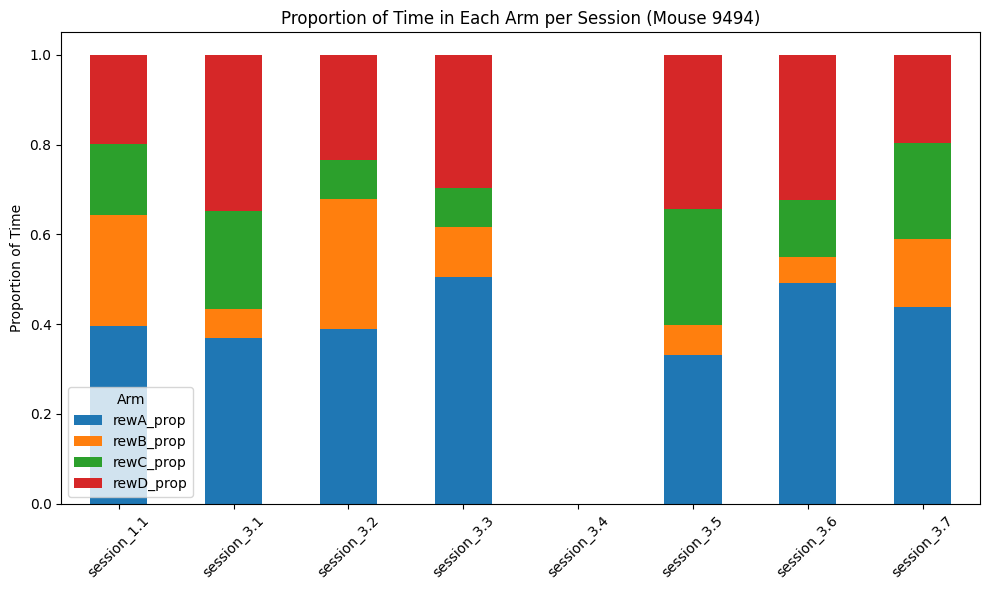


Mouse 9496 summary:
                rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session_1.1  316.527  153.342  132.635  164.642   0.412603   0.199886   
session_3.1  300.012  131.002  116.022   87.645   0.472697   0.206406   
session_3.2    0.000  129.651  127.624   97.372   0.000000   0.365578   
session_3.3  238.017  188.075  149.757  225.406   0.297055   0.234726   
session_3.4  191.359  205.200  217.084  179.066   0.241399   0.258859   
session_3.5  162.410   72.888   95.293  450.049   0.208047   0.093370   
session_3.6  303.847  122.490  160.194  270.713   0.354446   0.142888   
session_3.7  470.194  159.884  123.691  158.726   0.515284   0.175216   
session_3.8  267.185   48.609  138.324  290.195   0.358969   0.065307   

             rewC_prop  rewD_prop  
session_1.1   0.172894   0.214616  
session_3.1   0.182804   0.138093  
session_3.2   0.359862   0.274560  
session_3.3   0.186903   0.281316  
session_3.4   0.273851   0.225891  
session_3.5   0.122070   0.57651

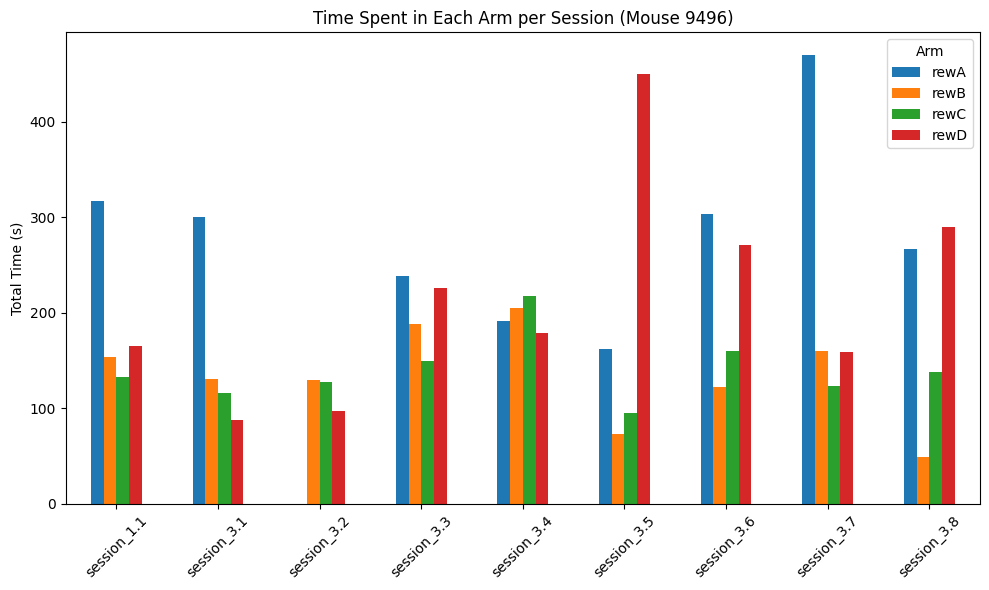

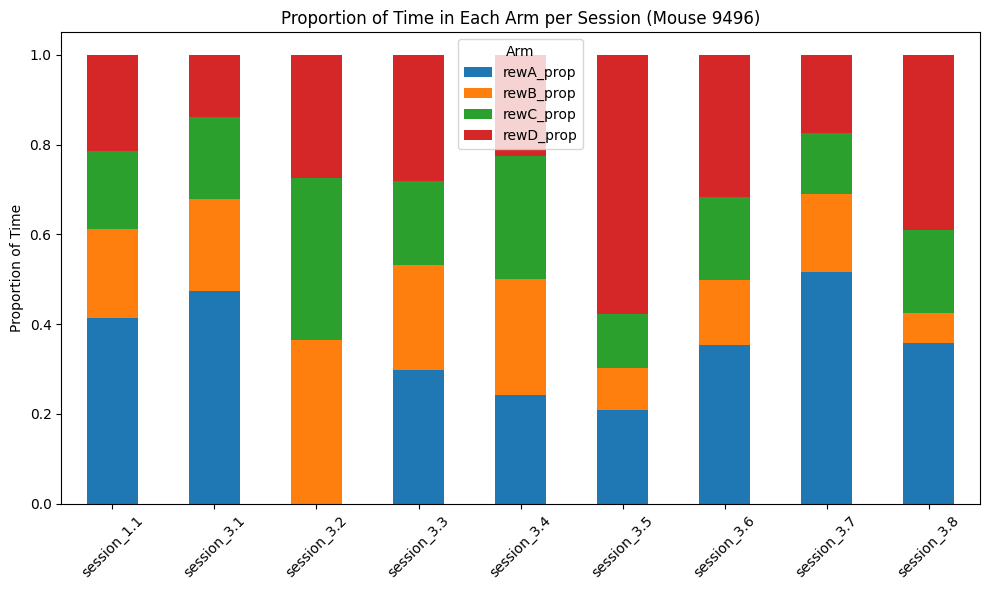


Mouse 9497 summary:
                rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session_1.1  210.920   90.600   93.361  251.420   0.326349   0.140182   
session_3.1  328.200  226.763  155.950  125.681   0.392305   0.271055   
session_3.2  250.284   75.442  154.185  116.022   0.419987   0.126595   
session_3.3  313.910  274.846   97.225  212.267   0.349469   0.305980   
session_3.4  251.890   88.291   89.538   84.441   0.489906   0.171719   
session_3.5  230.533   56.698  113.688   72.229   0.487232   0.119831   
session_3.6  275.223   54.219   52.057  134.545   0.533332   0.105067   
session_3.7  305.281   65.662   43.089   89.807   0.605910   0.130323   
session_3.8  224.380   21.674   62.934  247.487   0.403217   0.038949   

             rewC_prop  rewD_prop  
session_1.1   0.144454   0.389014  
session_3.1   0.186411   0.150229  
session_3.2   0.258729   0.194690  
session_3.3   0.108238   0.236312  
session_3.4   0.174144   0.164231  
session_3.5   0.240280   0.15265

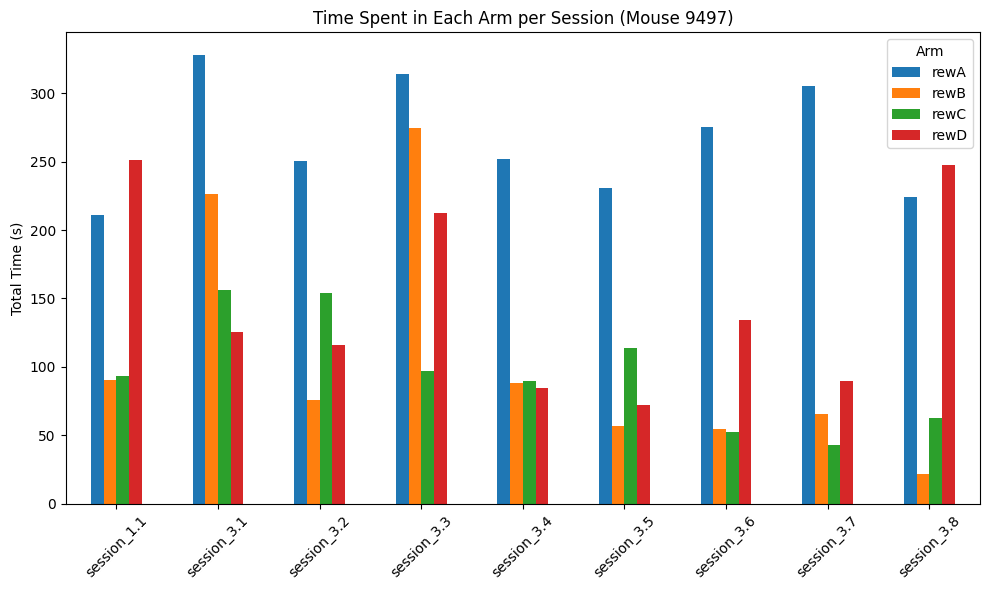

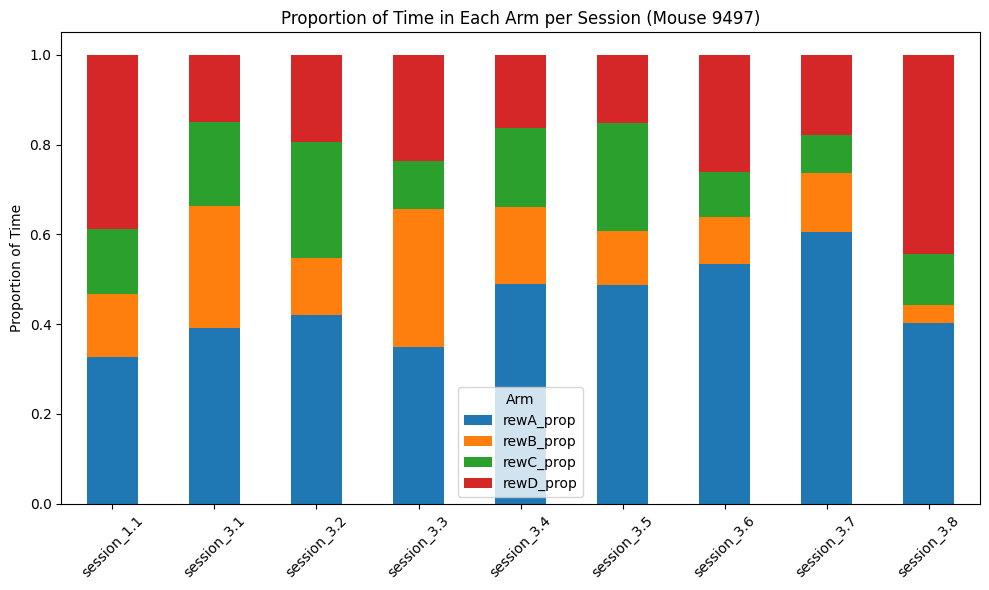


Mouse 8938 summary:
                 rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session_1.1   147.752   82.979  103.894   45.940   0.388244   0.218042   
session_3.1   193.431  307.744  114.749   95.664   0.271830   0.432475   
session_3.2   193.883  237.905  219.411  128.539   0.248651   0.305109   
session_3.3   156.014  137.172  243.573  109.059   0.241576   0.212400   
session_3.4   131.716  209.374  308.905  122.392   0.170531   0.271074   
session_3.5   159.086  196.085  404.888   93.709   0.186334   0.229670   
session_3.6    75.380   63.634  534.741   69.238   0.101455   0.085645   
session_3.7   129.184  130.762  559.148  126.730   0.136584   0.138252   
session_3.8    78.392  217.053  661.169  120.851   0.072756   0.201448   
session_3.8   124.524   79.718  724.413  575.295   0.082798   0.053006   
session_3.9    55.697  136.836  168.730  178.671   0.103155   0.253431   
session_3.10  148.219   71.699  317.263   79.147   0.240487   0.116333   
session_3.11   64

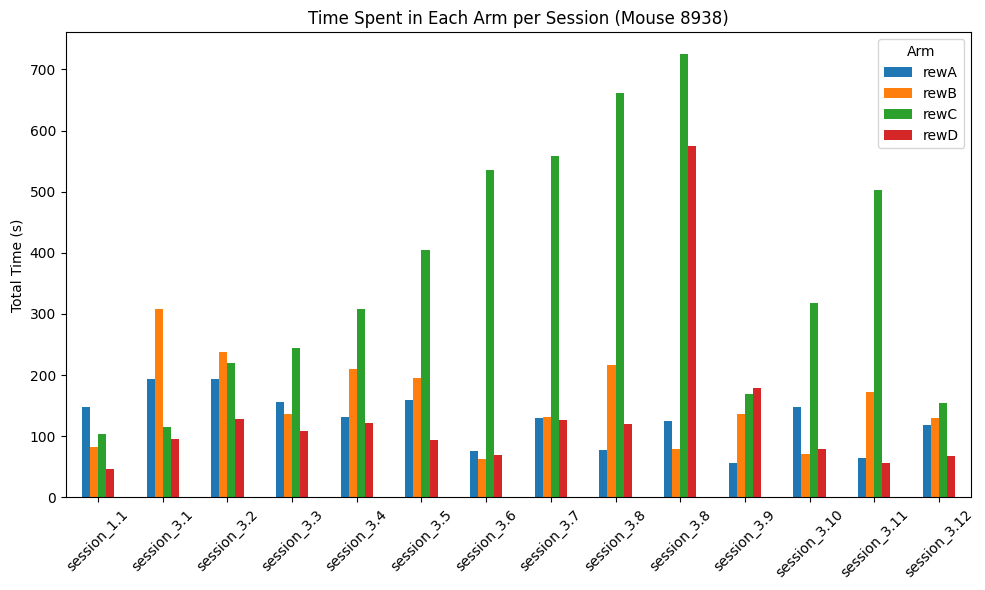

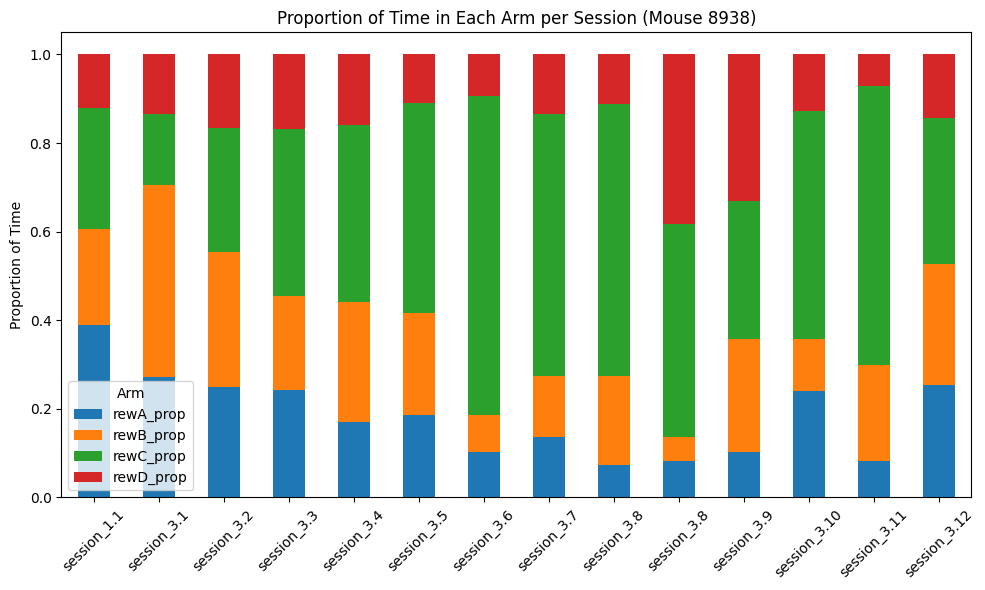


Mouse 8939 summary:
                 rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session1.1     72.852   75.880   82.926   65.357   0.245281   0.255475   
session3.1    139.381   96.051  139.166  173.907   0.254111   0.175114   
session_3.1     0.000    0.000    0.000    0.000   0.000000   0.000000   
session_3.2   188.175  181.540   58.665   70.454   0.377230   0.363929   
session_3.3    96.909  125.910  195.986  206.967   0.154863   0.201207   
session_3.4   103.280  155.989  195.194   98.808   0.186672   0.281940   
session_3.5    89.445  302.243  210.294  113.258   0.125056   0.422576   
session_3.6   130.136  119.239  294.652   89.437   0.205436   0.188233   
session_3.7    79.332   56.089  339.041   92.842   0.139840   0.098869   
session_3.8    26.796   92.716  254.544   40.737   0.064601   0.223524   
session_3.8   138.314   72.930  488.374  413.400   0.124269   0.065525   
session_3.9   186.187  109.380  210.373  117.466   0.298661   0.175455   
session_3.10   95

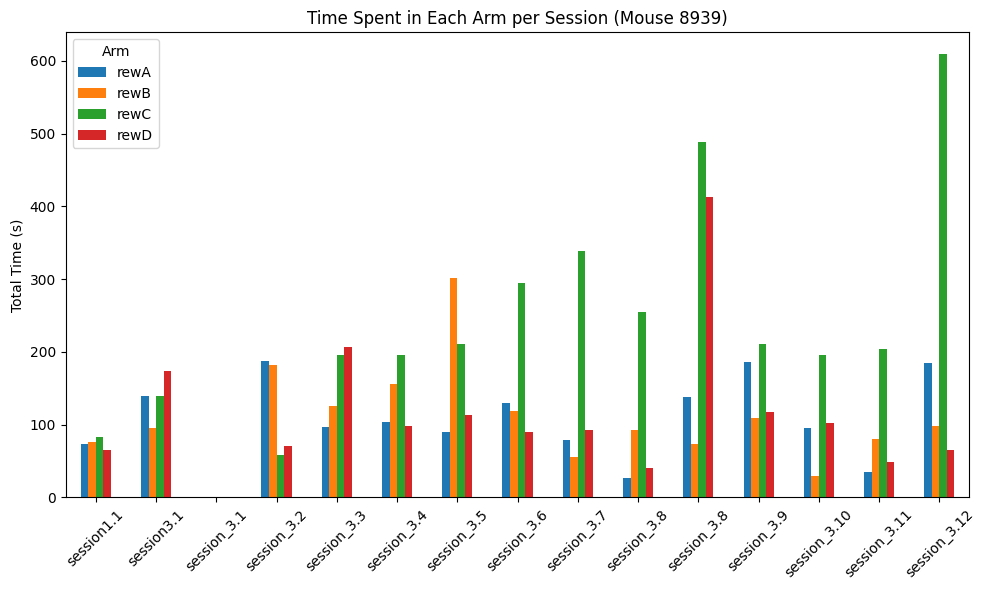

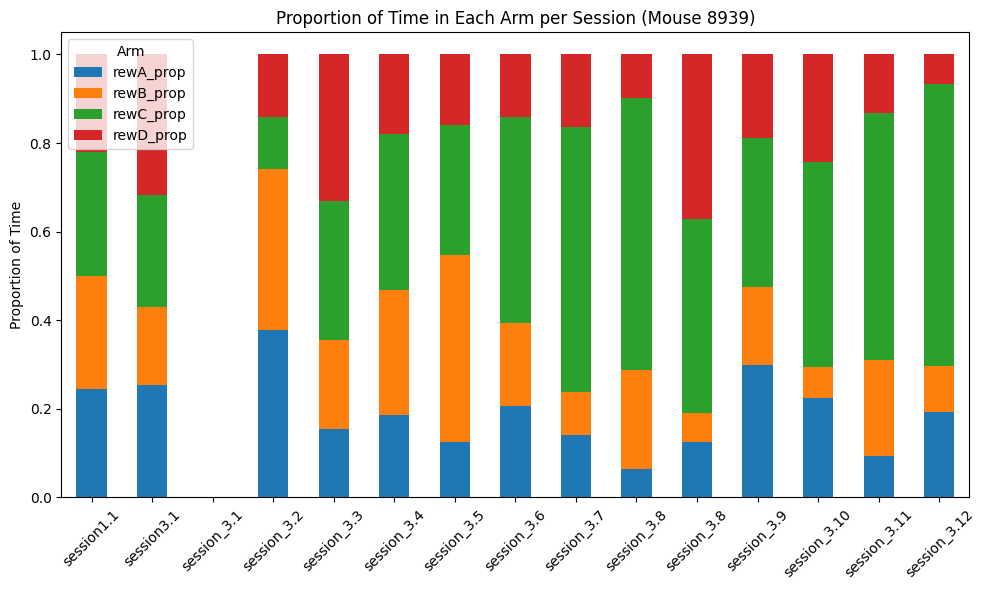


Mouse 8941 summary:
                 rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session_1.1   283.045  138.040  175.642   83.231   0.416268   0.203013   
session_3.1   262.772  385.591  226.729   97.636   0.270139   0.396402   
session_3.2   196.445  286.896  115.352  173.605   0.254364   0.371484   
session_3.3   379.175  299.204  131.528  358.474   0.324530   0.256084   
session_3.4   261.762  336.340  323.907  377.498   0.201432   0.258821   
session_3.5   184.571  248.603  323.124  221.173   0.188825   0.254333   
session_3.6   141.060  160.485  350.034  116.098   0.183749   0.209053   
session_3.7   112.479  120.977  423.878   98.402   0.148834   0.160078   
session_3.8   180.228  187.684  474.135  112.354   0.188839   0.196651   
session_3.9   210.684  161.443  334.871  181.605   0.237096   0.181682   
session_3.10  112.702  184.271  511.092   42.930   0.132436   0.216536   
session_3.11  225.731   79.975  636.905   81.591   0.220397   0.078085   
session_3.12  178

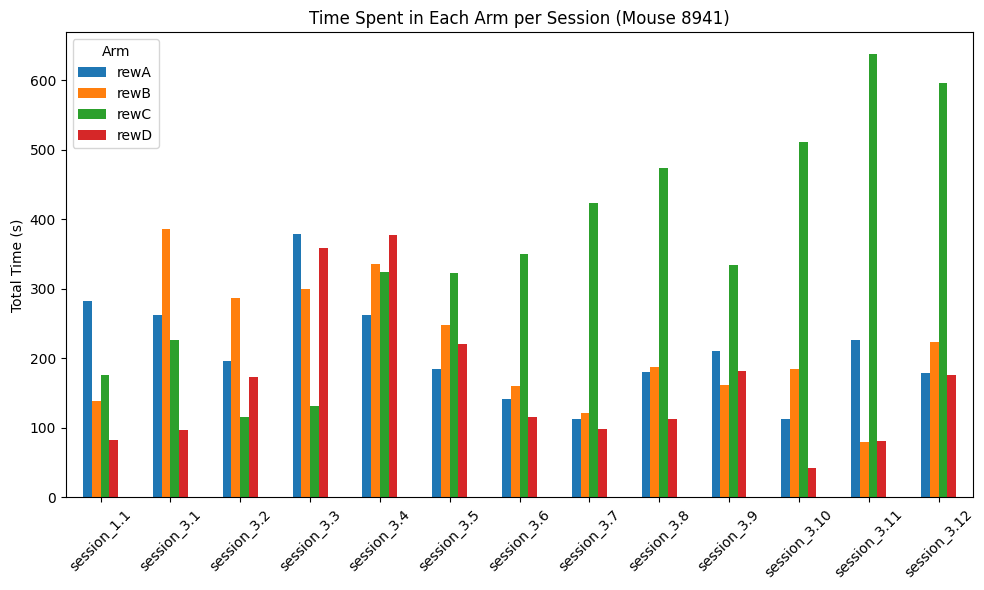

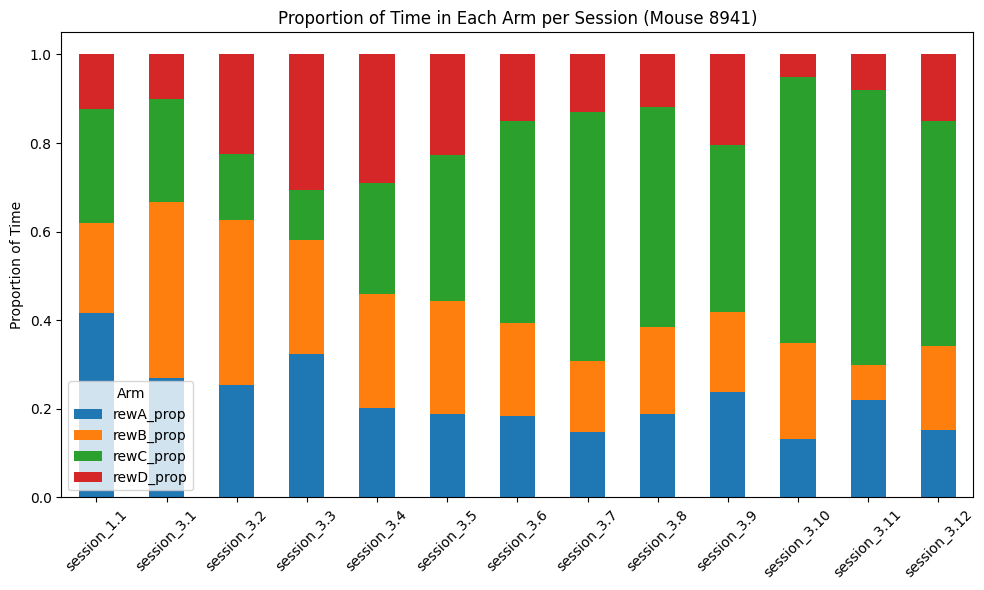


Mouse 9129 summary:
                 rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session1.1     72.852   75.880   82.926   65.357   0.245281   0.255475   
session1.1     72.852   75.880   82.926   65.357   0.245281   0.255475   
session1.1     72.852   75.880   82.926   65.357   0.245281   0.255475   
session_3.1   113.161  316.262  196.925  227.152   0.132585   0.370547   
session_3.2   230.366  112.740  176.177   87.741   0.379501   0.185726   
session_3.3    57.596  100.401   85.434  263.248   0.113674   0.198155   
session_3.4   214.450  188.849  361.011  346.900   0.192988   0.169949   
session_3.5   107.772  109.285  366.402  227.053   0.132968   0.134835   
session_3.6   121.656  151.423  254.436  343.380   0.139691   0.173871   
session_3.7    73.648  109.202  282.037  236.125   0.105060   0.155778   
session_3.8   210.089   83.257  295.664  169.557   0.276955   0.109756   
session_3.9   197.222  120.296  212.517   81.666   0.322416   0.196658   
session_3.10  135

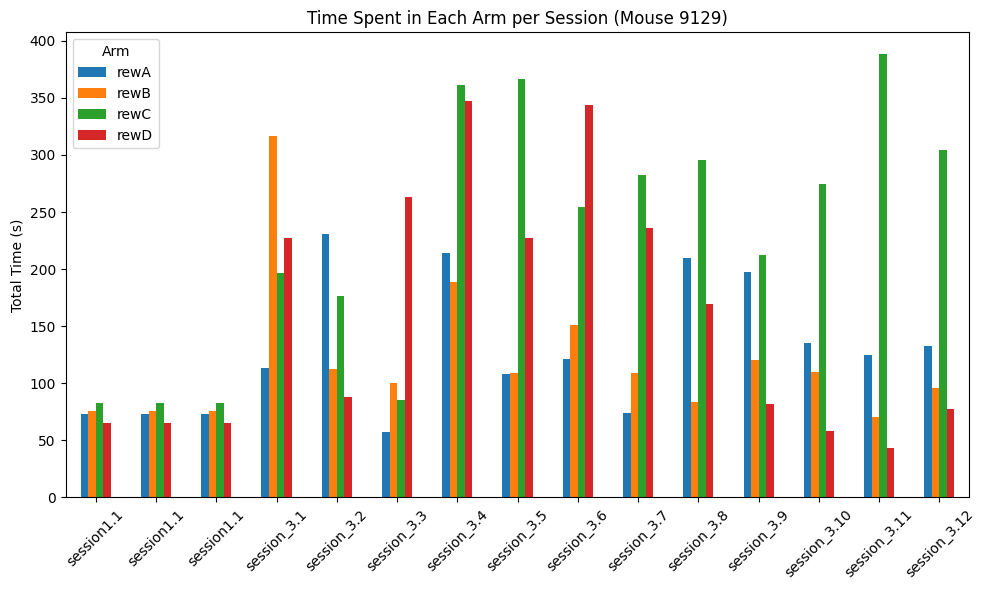

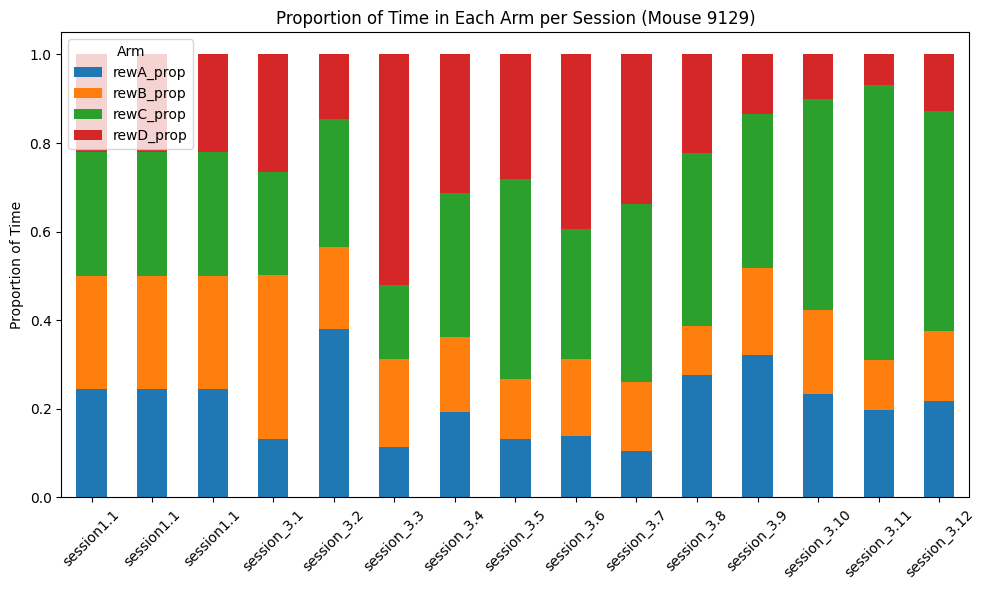


Mouse 9257 summary:
                rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session_1.1   28.220   28.743   65.341   68.908   0.147585   0.150320   
session_3.1  211.150   77.993  129.474  183.744   0.350537   0.129479   
session_3.2  245.245  105.028  225.749  155.496   0.335255   0.143575   
session_3.3  194.734   48.338  161.405   87.625   0.395719   0.098228   
session_3.4  132.370   76.870  118.397   86.877   0.319338   0.185446   
session_3.5  231.836   66.330   92.681   79.310   0.493103   0.141081   
session_3.6  174.902   55.746  158.738   83.266   0.370044   0.117943   
session_3.7  131.884   83.164  123.693  109.805   0.294026   0.185408   
session_3.8  183.556   30.386   97.225   73.612   0.477043   0.078970   

             rewC_prop  rewD_prop  
session_1.1   0.341720   0.360375  
session_3.1   0.214944   0.305040  
session_3.2   0.308603   0.212566  
session_3.3   0.327991   0.178063  
session_3.4   0.285628   0.209588  
session_3.5   0.197128   0.16868

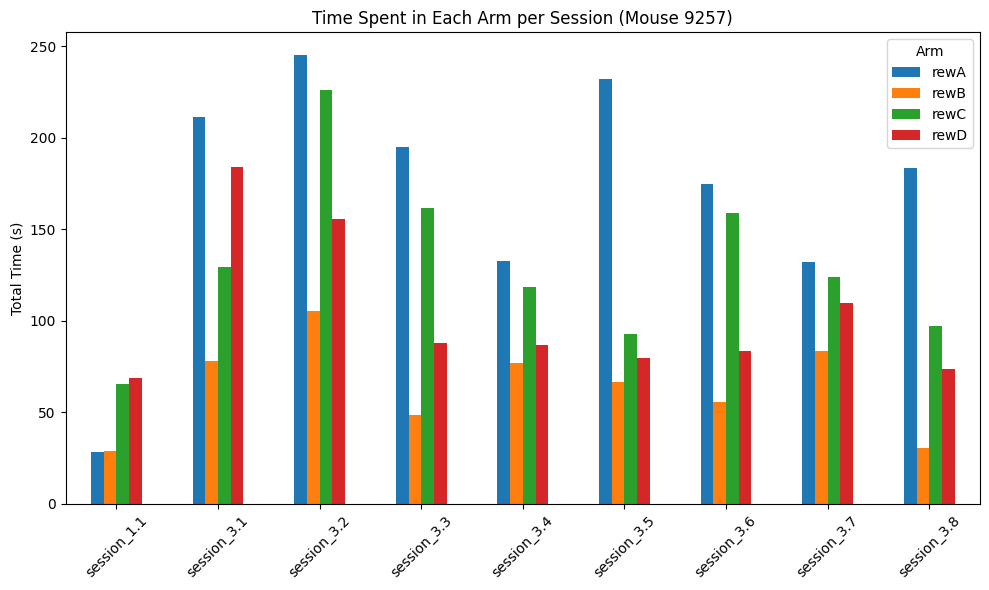

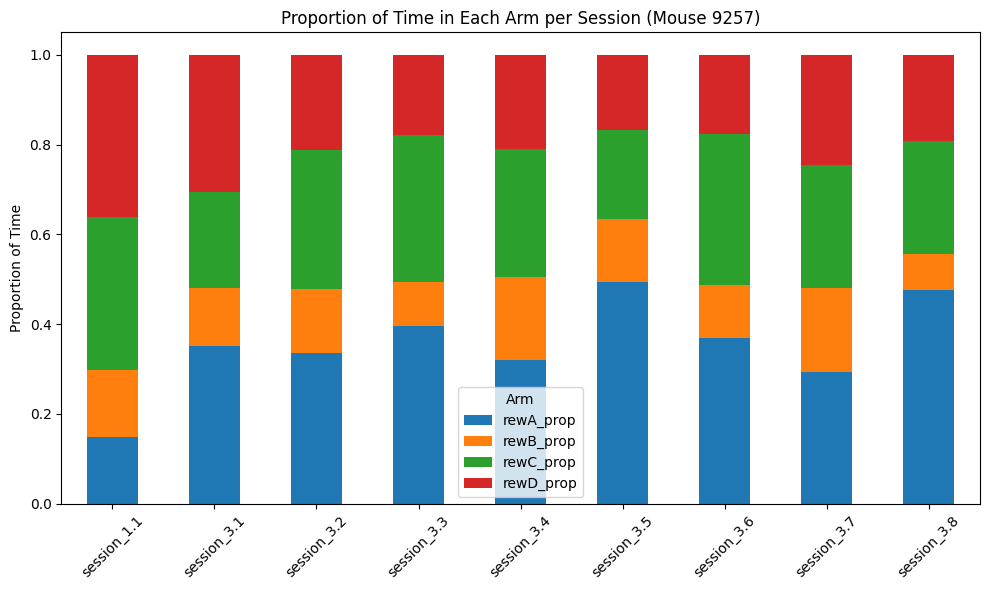


Mouse 9258 summary:
                rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session_1.1  168.102  103.554  146.200  140.898   0.300852   0.185330   
session_3.1  133.878   48.808   82.850   74.540   0.393671   0.143521   
session_3.2  104.465    0.000   49.174   85.404   0.437013   0.000000   
session_3.3  102.627   27.394   35.014   58.653   0.458795   0.122465   
session_3.4  118.383   35.200   58.994   61.025   0.432683   0.128654   
session_3.5  115.769   21.997   43.214   67.482   0.465942   0.088533   
session_3.6  100.898   37.390   69.667   99.605   0.328060   0.121570   
session_3.7   96.141   40.851   53.898   47.692   0.402968   0.171224   
session_3.8   72.222   30.740   28.736   50.172   0.397108   0.169022   

             rewC_prop  rewD_prop  
session_1.1   0.261654   0.252165  
session_3.1   0.243622   0.219186  
session_3.2   0.205712   0.357275  
session_3.3   0.156531   0.262209  
session_3.4   0.215620   0.223043  
session_3.5   0.173926   0.27159

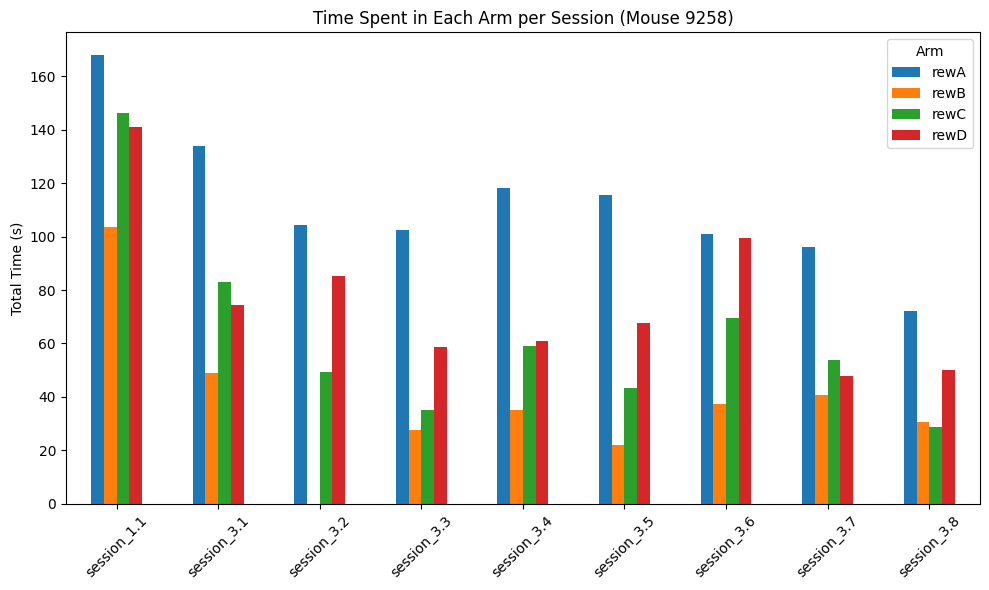

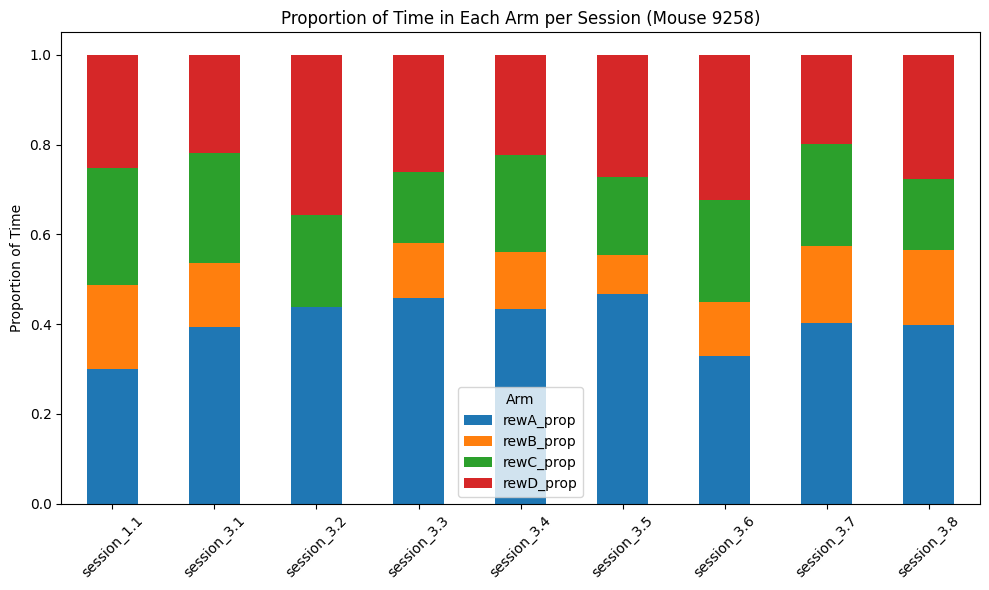


Mouse 9259 summary:
                rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session_1.1  207.097   70.998  105.443   52.649   0.474789   0.162770   
session_3.1  363.916  102.191  202.079  183.242   0.427418   0.120023   
session_3.2  288.690   73.552  112.370  124.453   0.481901   0.122778   
session_3.3  296.831  122.402   80.626   83.990   0.508404   0.209647   
session_3.4  269.290   84.488  122.352  101.036   0.466573   0.146384   
session_3.5  394.803   96.329  147.444  142.762   0.505291   0.123287   
session_3.6    0.000   72.633    0.000    0.000   0.000000   1.000000   
session_3.7    0.000  186.264  125.106   59.023   0.000000   0.502882   
session_3.8   93.124  193.618  138.401   75.829   0.185887   0.386485   

             rewC_prop  rewD_prop  
session_1.1   0.241738   0.120703  
session_3.1   0.237341   0.215217  
session_3.2   0.187576   0.207745  
session_3.3   0.138094   0.143856  
session_3.4   0.211988   0.175055  
session_3.5   0.188707   0.18271

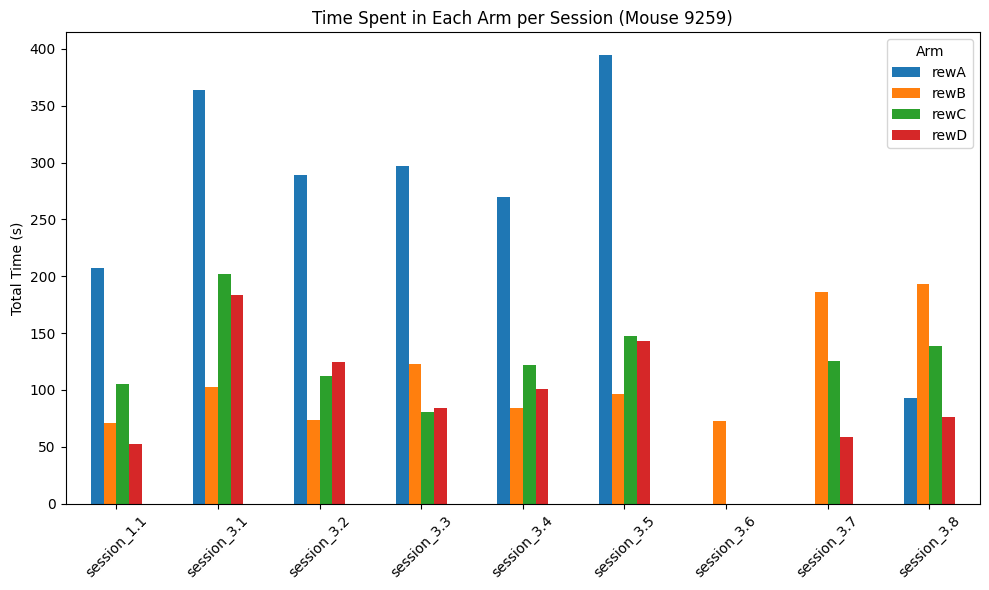

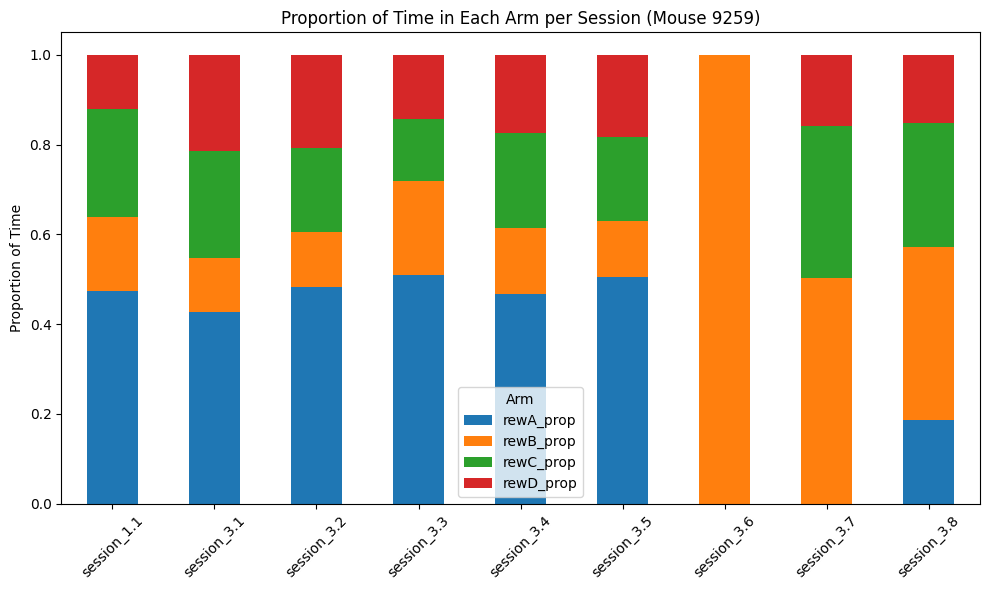


Mouse 9260 summary:
                rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session_1.1  165.173  109.062   83.112  135.231   0.335324   0.221411   
session_3.1   96.386  143.467    0.000  112.284   0.273717   0.407418   
session_3.2  326.712  136.103  102.452  133.927   0.467269   0.194657   
session_3.3    0.000   91.353    0.000    0.000   0.000000   1.000000   
session_3.4  282.981  104.454  121.408  237.925   0.378941   0.139875   
session_3.5  217.610   82.630  107.049  259.100   0.326551   0.123997   
session_3.6  309.864   78.730   56.990  225.057   0.462042   0.117395   
session_3.7  228.889   63.387  167.326  108.285   0.403054   0.111619   
session_3.8  115.342   59.452  129.652  224.428   0.218090   0.112412   

             rewC_prop  rewD_prop  
session_1.1   0.168729   0.274537  
session_3.1   0.000000   0.318865  
session_3.2   0.146529   0.191545  
session_3.3   0.000000   0.000000  
session_3.4   0.162578   0.318606  
session_3.5   0.160640   0.38881

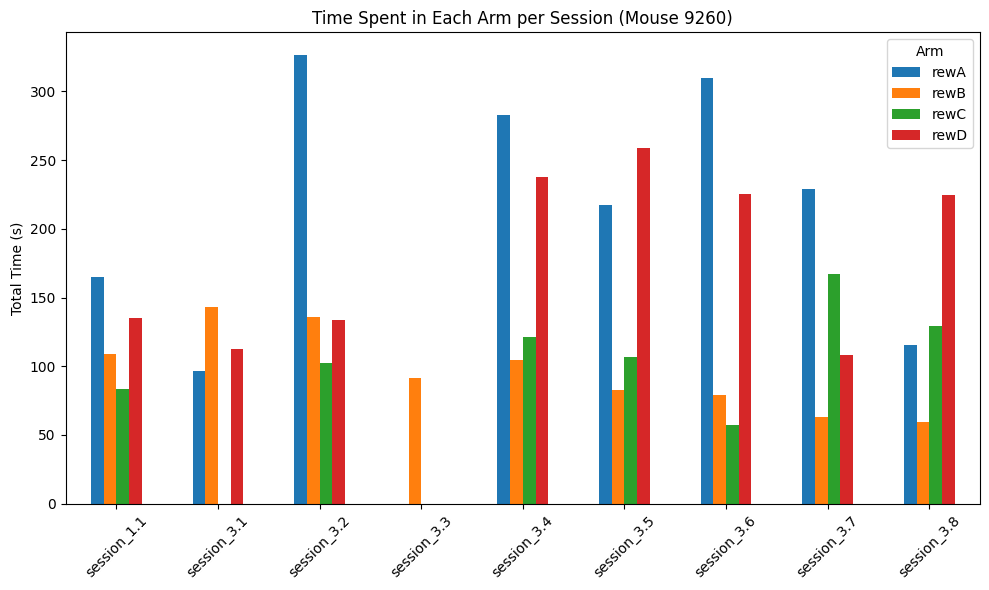

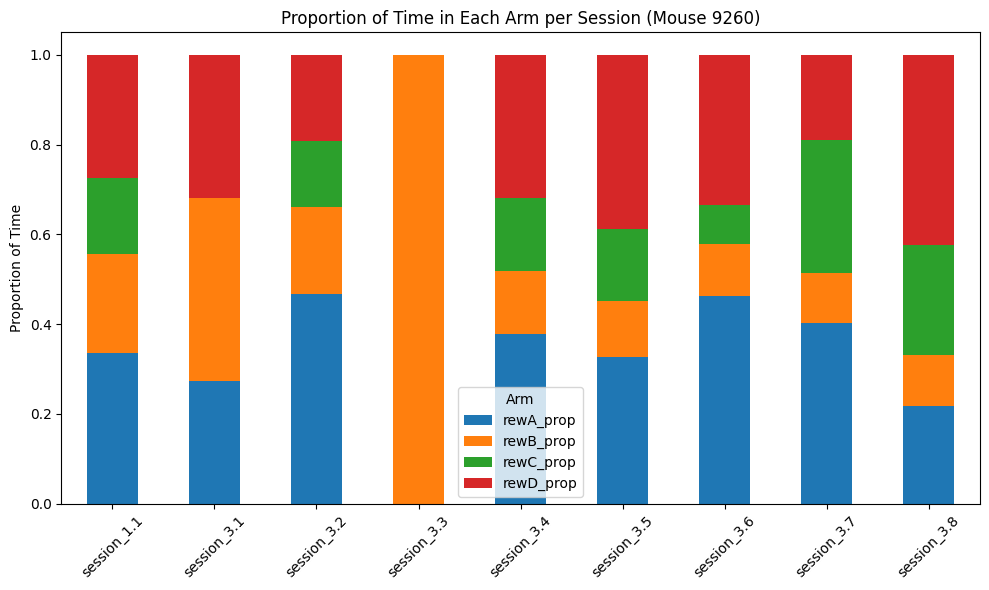


Mouse 8549 summary:
               rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session1.1  159.528  154.682  259.014  367.745   0.169536   0.164386   
session1.1  123.222  127.237   87.750  100.243   0.281039   0.290196   
session3.1  123.222  127.237   87.750  100.243   0.281039   0.290196   
session3.2   56.073  105.485   51.798  111.447   0.172637   0.324766   
session3.3   15.920   12.561   82.662   52.957   0.097014   0.076545   
session3.4    0.000    7.268    0.000   36.084   0.000000   0.167651   
session3.5    0.000    2.100    0.000   13.664   0.000000   0.133215   
session3.6    0.000    0.000    1.158    0.149   0.000000   0.000000   
session3.7    0.000    0.977    0.000    5.674   0.000000   0.146895   
session3.8   11.437   79.916  156.007   55.038   0.037821   0.264274   

            rewC_prop  rewD_prop  
session1.1   0.275263   0.390815  
session1.1   0.200136   0.228629  
session3.1   0.200136   0.228629  
session3.2   0.159475   0.343122  
session3.3 

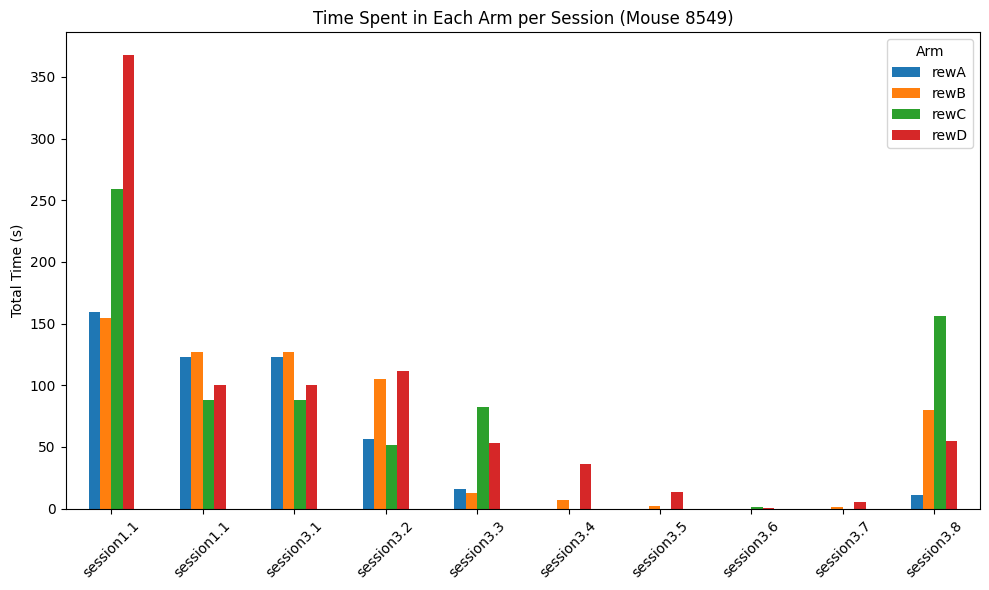

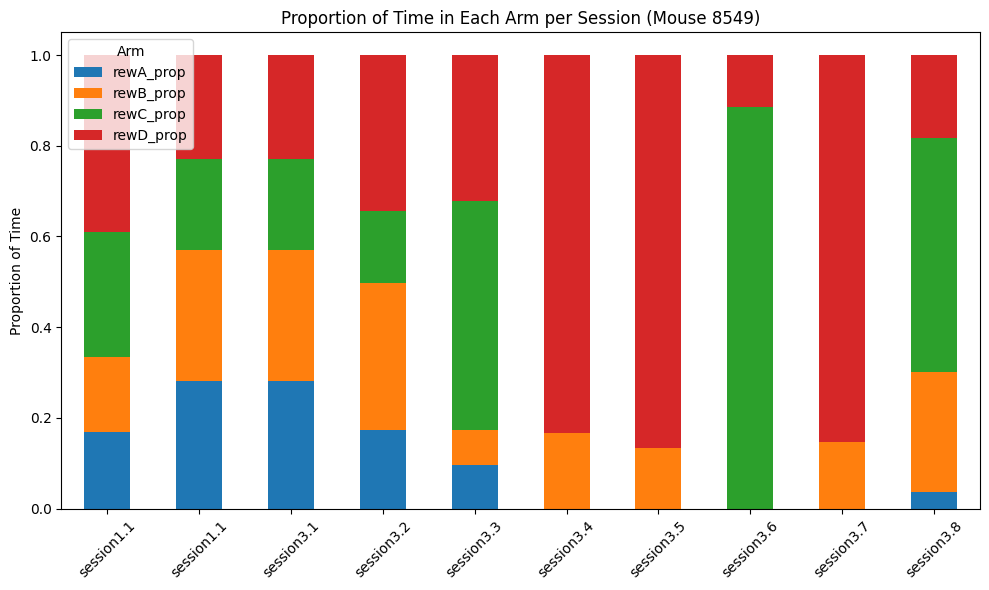


Mouse 8550 summary:
               rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session1.1  179.499  156.075  388.856   90.584   0.220240   0.191500   
session3.1  121.386  128.952  133.938  188.001   0.212111   0.225331   
session3.2   65.697  122.441   78.425  158.706   0.154483   0.287914   
session3.3   45.469   58.388   87.542   76.828   0.169517   0.217681   
session3.4   44.844   50.015   75.508   25.295   0.229191   0.255619   
session3.5  128.593  179.408   98.949   27.695   0.295858   0.412769   
session3.6  156.239  165.889  308.065   50.765   0.229440   0.243611   
session3.7  137.455  134.312   67.207   16.419   0.386769   0.377925   
session3.8  130.664  190.054  176.194   39.304   0.243678   0.354436   

            rewC_prop  rewD_prop  
session1.1   0.477116   0.111144  
session3.1   0.234044   0.328514  
session3.2   0.184413   0.373190  
session3.3   0.326373   0.286429  
session3.4   0.385910   0.129279  
session3.5   0.227655   0.063719  
session3.6   

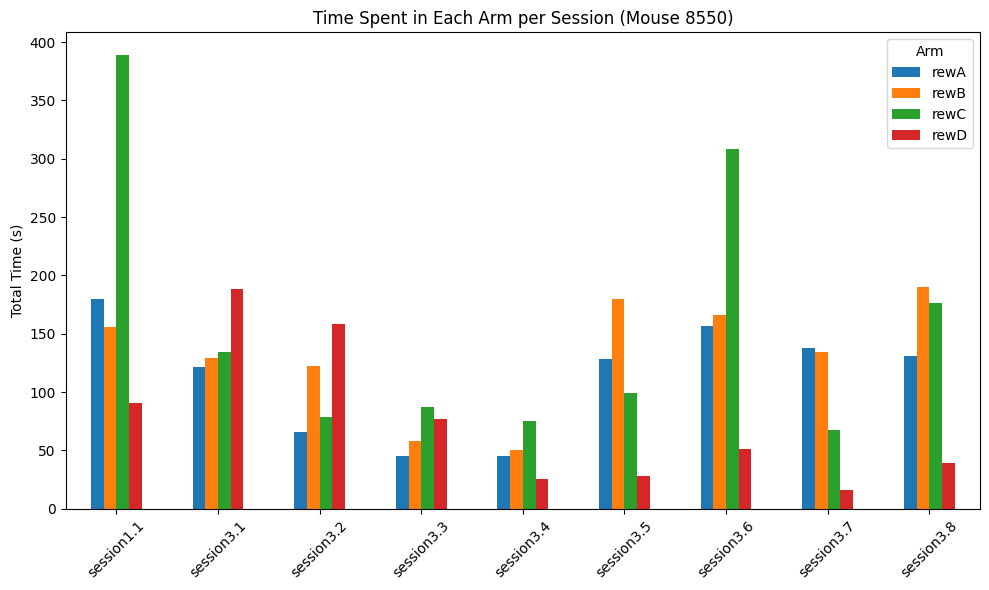

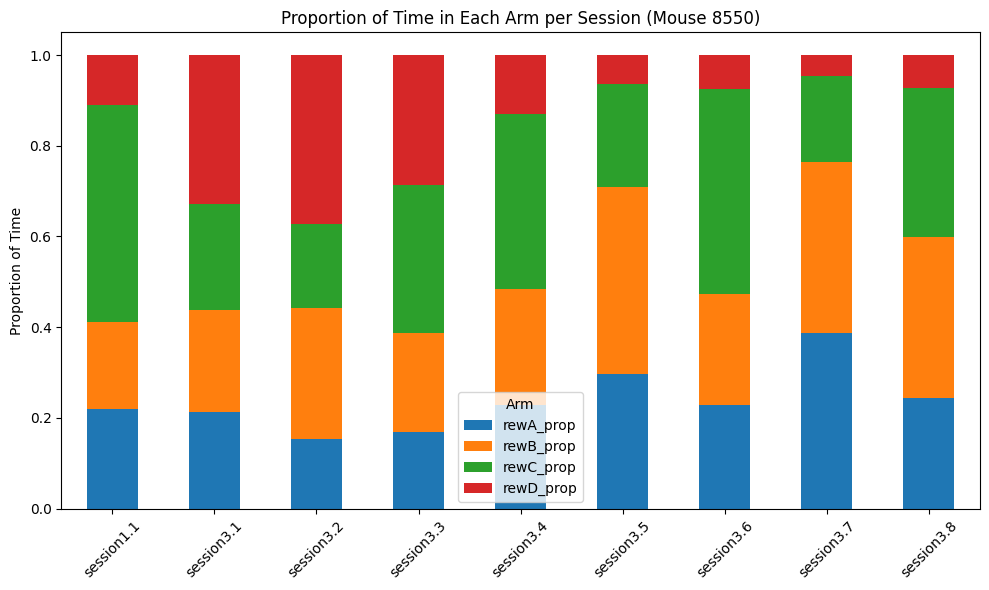


Mouse 8551 summary:
               rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session1.1  356.897  653.864  358.124  277.116   0.216827   0.397244   
session1.1  128.785   99.953   67.169   34.646   0.389605   0.302381   
session3.1   69.969  183.289  108.955  141.606   0.138877   0.363799   
session3.2  215.456  244.693  112.449  124.518   0.309068   0.351008   
session3.3  128.785   99.953   67.169   34.646   0.389605   0.302381   
session3.4   77.064  218.887  128.243   33.517   0.168368   0.478221   
session3.5   80.023  189.863   67.308   33.683   0.215767   0.511930   
session3.6  130.782   86.505  129.235   24.953   0.352061   0.232869   
session3.7  173.293  135.512   80.354   96.589   0.356755   0.278976   
session3.8  103.989  413.959  156.306  113.325   0.132036   0.525609   

            rewC_prop  rewD_prop  
session1.1   0.217572   0.168357  
session1.1   0.203202   0.104812  
session3.1   0.216258   0.281065  
session3.2   0.161306   0.178619  
session3.3 

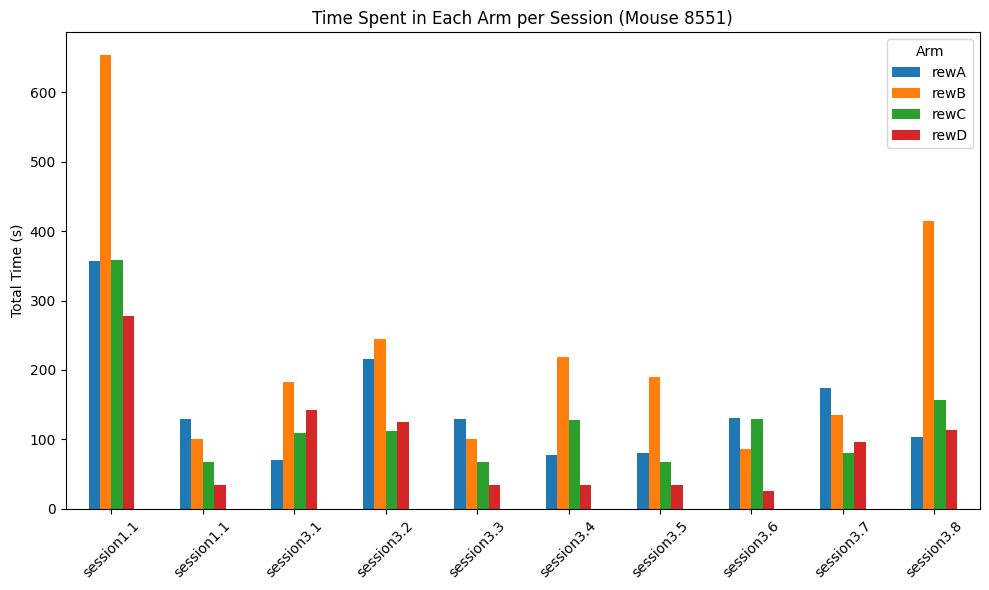

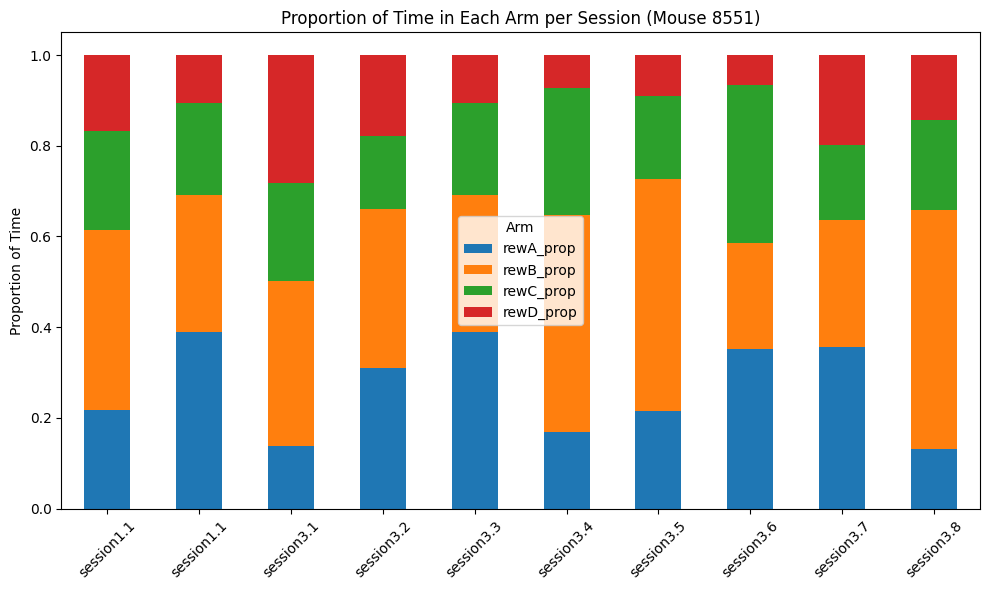


Mouse 8552 summary:
               rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session1.1  293.589  206.797  462.137  265.525   0.239070   0.168395   
session3.1  152.106  156.093  213.077  214.372   0.206765   0.212184   
session3.2   42.361  140.412  103.574  158.076   0.095317   0.315942   
session3.3   36.915   32.789   49.898   32.555   0.242611   0.215495   
session3.4  459.869  192.751   97.031   50.584   0.574667   0.240868   
session3.5  449.868  436.686  154.049   67.639   0.405929   0.394035   
session3.6  316.574  116.188   52.243   35.206   0.608549   0.223348   
session3.7  124.997   99.594   80.289   79.393   0.325282   0.259175   
session3.8  449.118  170.951   63.665   34.024   0.625723   0.238174   
session1.1  293.589  206.797  462.137  265.525   0.239070   0.168395   

            rewC_prop  rewD_prop  
session1.1   0.376318   0.216217  
session3.1   0.289645   0.291406  
session3.2   0.233053   0.355688  
session3.3   0.327938   0.213957  
session3.4 

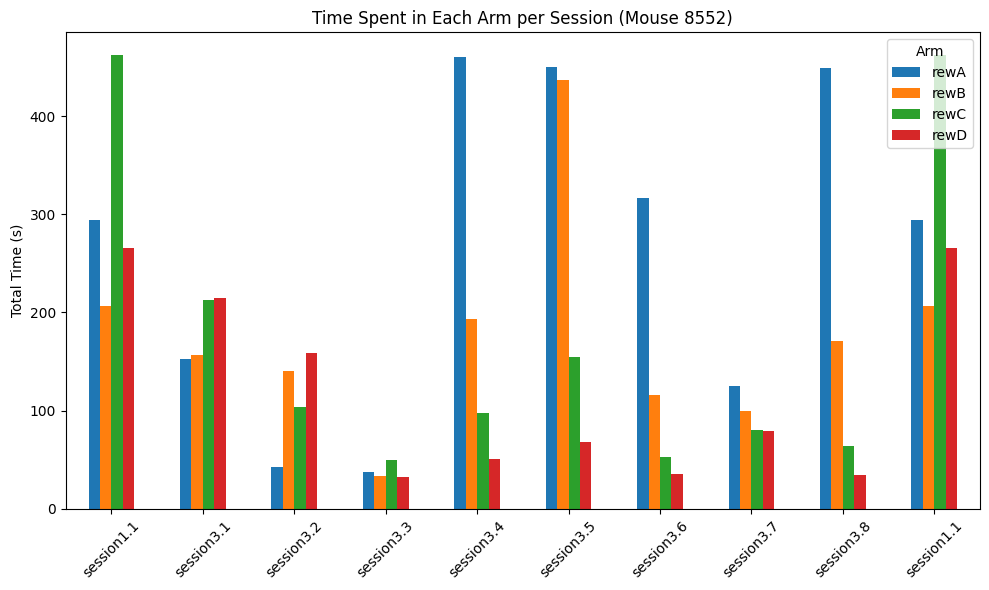

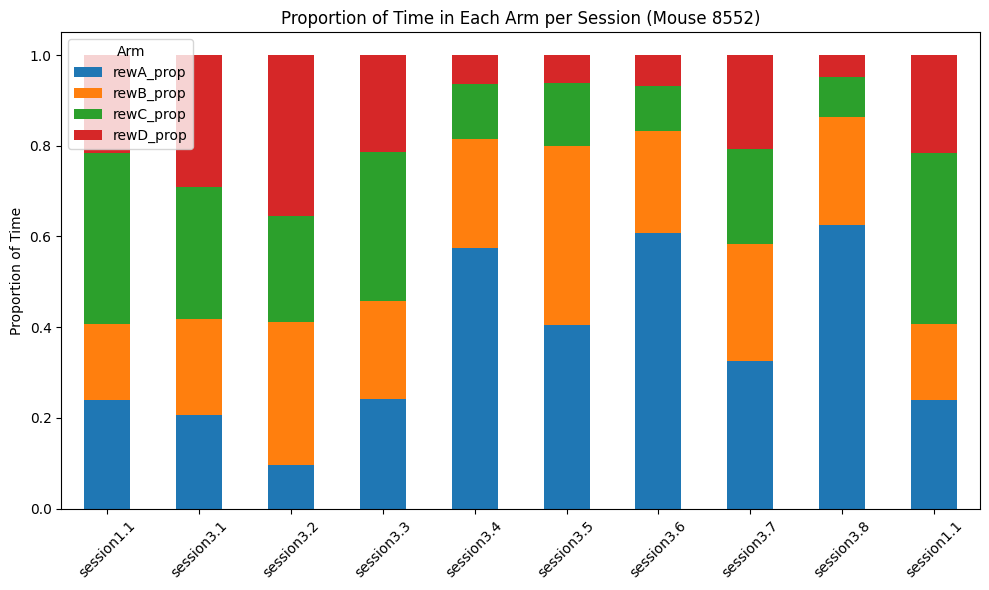


Mouse 11038 summary:
                rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session_1.1   40.208   51.970   59.459   78.910   0.174403   0.225420   
session_3.1   39.050   69.549  164.825   79.914   0.110517   0.196834   
session_3.2   97.165   95.433   89.288  108.006   0.249210   0.244768   
session_3.3  106.106  138.894  267.213  197.752   0.149452   0.195635   
session_3.4  248.796  196.658  131.742  117.577   0.358097   0.283054   
session_3.5  458.851  144.920  185.111  126.530   0.501251   0.158311   
session_3.6  274.458  145.313   72.846   89.785   0.471252   0.249506   
session_3.7  212.728  222.028   65.464   74.129   0.370381   0.386573   

             rewC_prop  rewD_prop  
session_1.1   0.257904   0.342273  
session_3.1   0.466480   0.226169  
session_3.2   0.229007   0.277015  
session_3.3   0.376375   0.278538  
session_3.4   0.189619   0.169231  
session_3.5   0.202216   0.138222  
session_3.6   0.125079   0.154163  
session_3.7   0.113979   0.12906

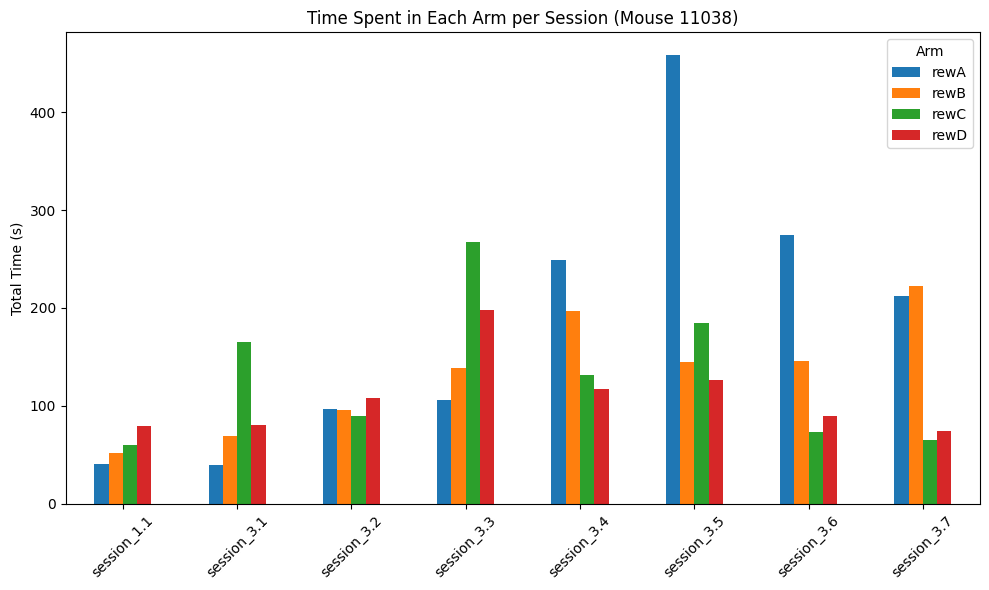

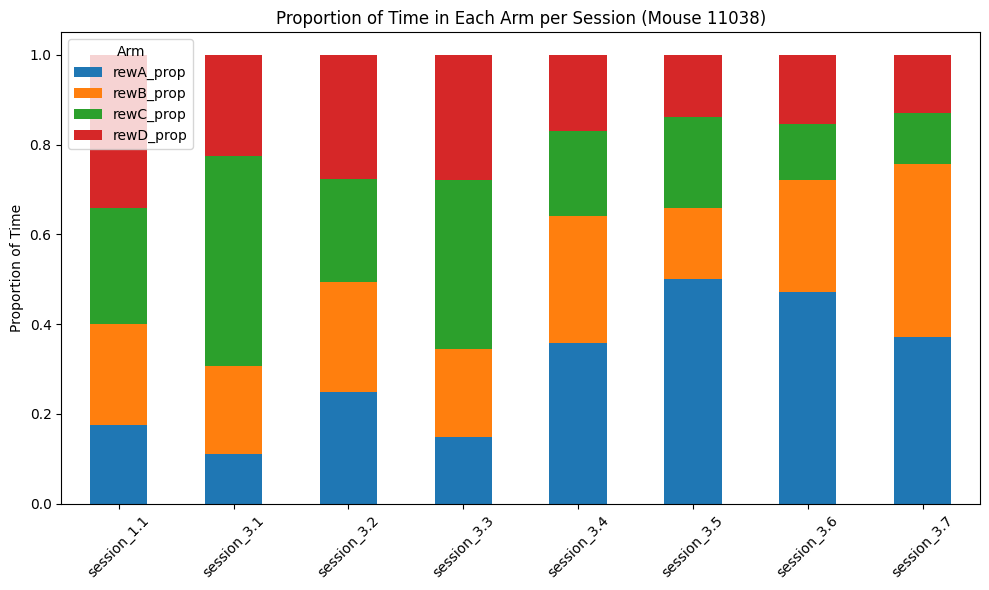


Mouse 11039 summary:
                rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session_1.1  191.492  274.834  142.993  161.369   0.248469   0.356609   
session_3.1   77.105  144.092  321.805  211.503   0.102193   0.190976   
session_3.2  313.207  278.253  358.098  191.407   0.274511   0.243875   
session_3.3  158.815  263.203  262.912  186.154   0.182319   0.302156   
session_3.4  285.650  339.704  396.327  170.190   0.239665   0.285017   
session_3.5  145.133  690.159  117.388   61.962   0.143039   0.680200   
session_3.6  159.295  553.999  175.733  170.478   0.150349   0.522885   
session_3.7  170.534  490.342   87.533  243.926   0.171851   0.494130   

             rewC_prop  rewD_prop  
session_1.1   0.185539   0.209383  
session_3.1   0.426511   0.280320  
session_3.2   0.313855   0.167759  
session_3.3   0.301822   0.213704  
session_3.4   0.332525   0.142792  
session_3.5   0.115694   0.061068  
session_3.6   0.165863   0.160903  
session_3.7   0.088209   0.24581

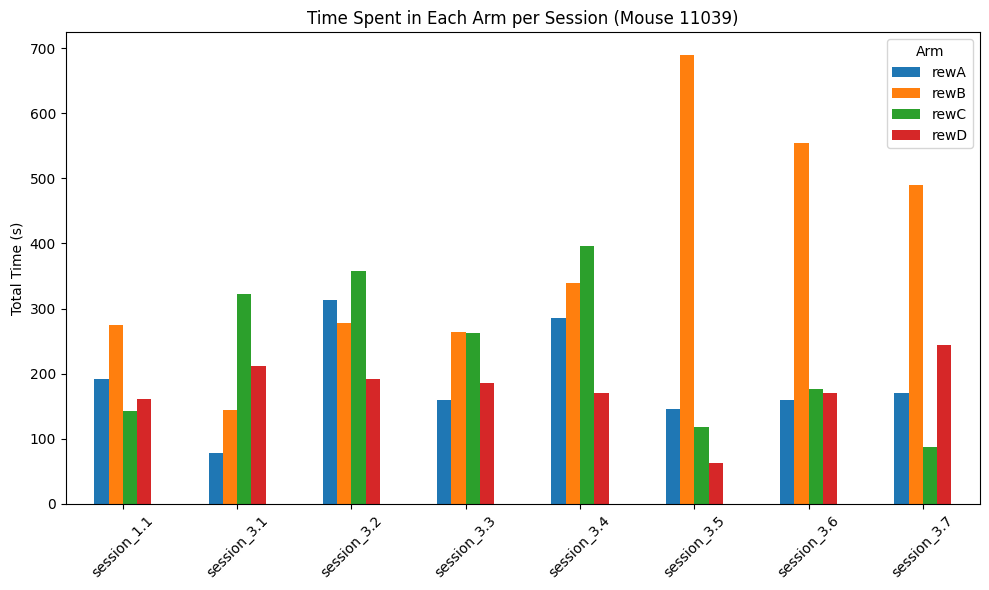

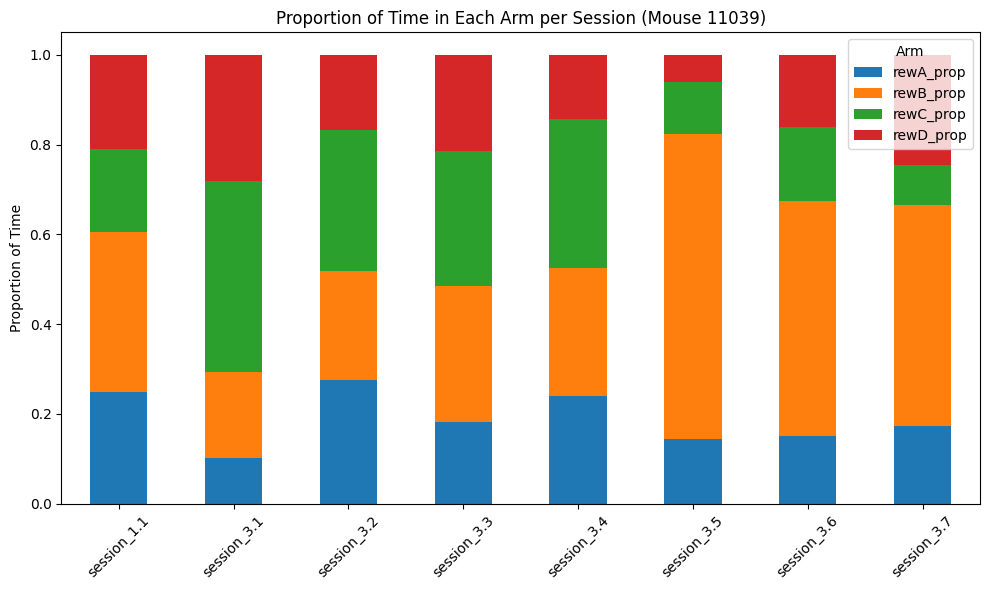


Mouse 11040 summary:
                rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session_1.1   31.132   39.892   42.073   31.211   0.215733   0.276437   
session_3.1   95.725  105.300  114.821  230.564   0.175189   0.192712   
session_3.2  221.602  102.939  229.881  132.505   0.322599   0.149854   
session_3.3  134.635  167.629  260.676  186.901   0.179551   0.223553   
session_3.4  243.612  194.155  132.384  166.344   0.330772   0.263620   
session_3.5  177.340  171.691   95.165  351.310   0.222927   0.215826   
session_3.6   36.234  120.108   85.011  238.288   0.075544   0.250412   
session_3.7  112.790  122.210  145.697  457.029   0.134638   0.145883   

             rewC_prop  rewD_prop  
session_1.1   0.291550   0.216280  
session_3.1   0.210137   0.421962  
session_3.2   0.334651   0.192895  
session_3.3   0.347642   0.249254  
session_3.4   0.179749   0.225859  
session_3.5   0.119628   0.441618  
session_3.6   0.177239   0.496805  
session_3.7   0.173920   0.54555

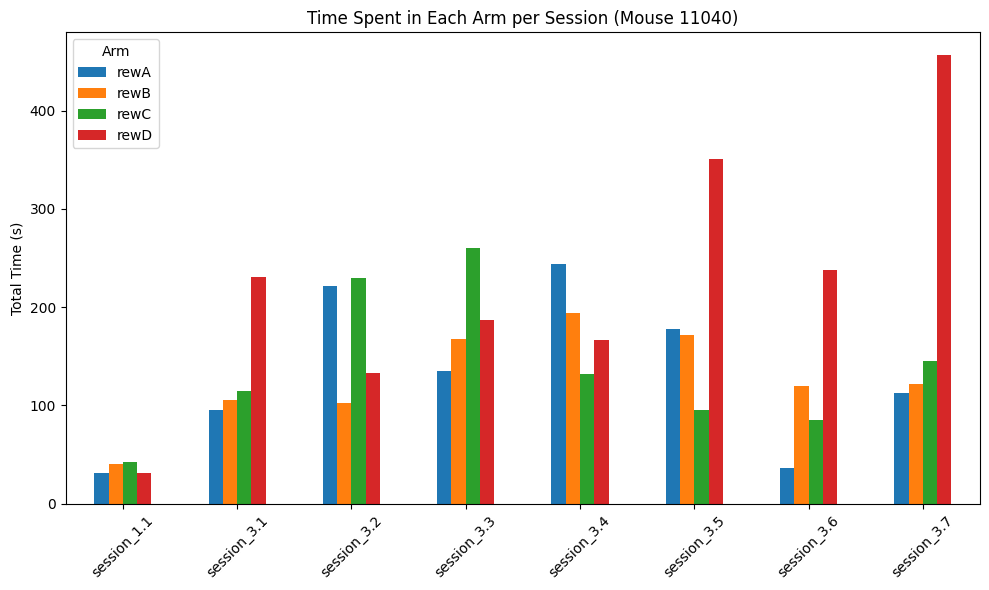

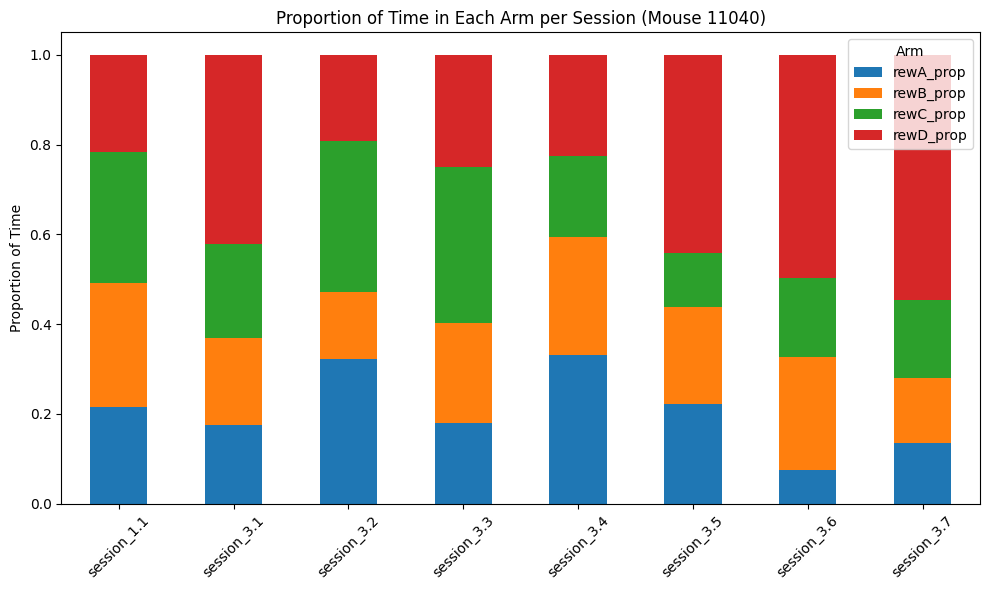


Mouse 11268 summary:
                rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session_1.1  177.197  341.913  230.757  397.613   0.154423   0.297969   
session_3.1  324.518  170.369  307.642  422.636   0.264877   0.139058   
session_3.2  381.198  409.850  150.467  348.984   0.295388   0.317590   
session_3.3  156.361  219.195   97.098  420.435   0.175079   0.245435   
session_3.4  149.557  114.042   83.492  203.417   0.271671   0.207158   
session_3.5   50.082   94.316   15.123  186.697   0.144655   0.272418   
session_3.6   66.622   96.969   50.482  199.372   0.161139   0.234539   
session_3.7   85.563   46.573   39.018  328.979   0.171080   0.093121   
session_3.8  109.634   88.979   58.573  295.442   0.198387   0.161011   

             rewC_prop  rewD_prop  
session_1.1   0.201099   0.346510  
session_3.1   0.251103   0.344963  
session_3.2   0.116596   0.270426  
session_3.3   0.108722   0.470765  
session_3.4   0.151664   0.369508  
session_3.5   0.043681   0.5392

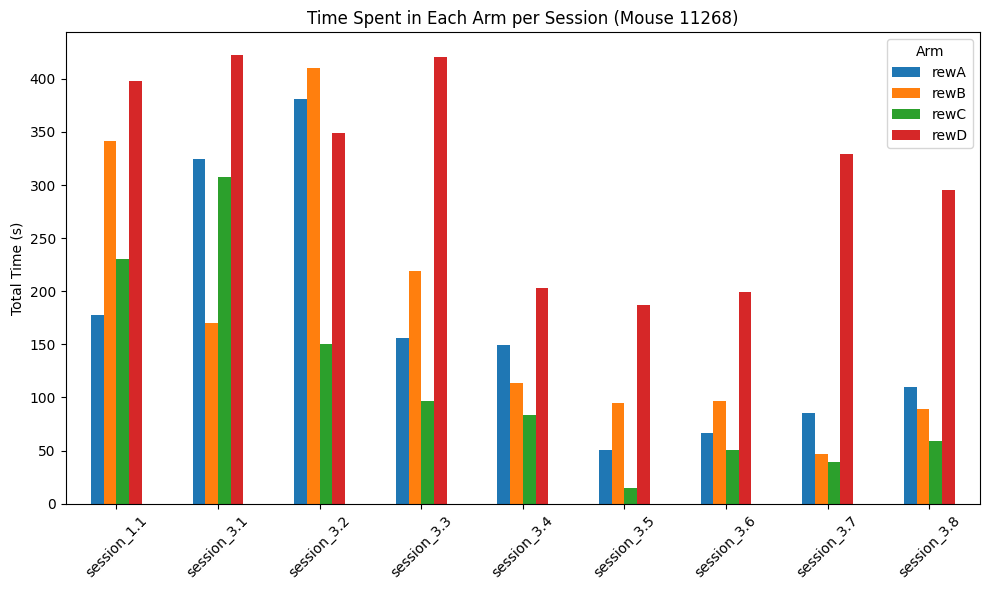

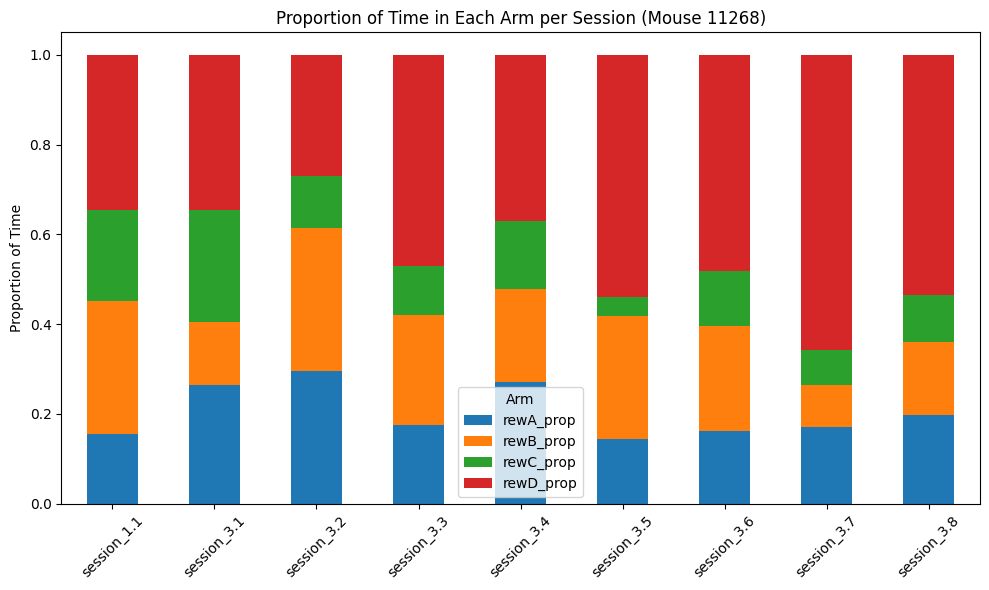


Mouse 11269 summary:
                rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session_1.1  115.402   83.259   77.697  146.710   0.272774   0.196798   
session_3.1  102.470  188.153  163.381  170.541   0.164071   0.301264   
session_3.2  107.973  116.282  159.732  179.698   0.191548   0.206289   
session_3.3  161.258  318.605  273.781  143.962   0.179653   0.354950   
session_3.4  194.270  256.776  133.245  306.084   0.218189   0.288391   
session_3.5   30.692   92.619   63.018  129.921   0.097050   0.292866   
session_3.6   73.868   87.558   39.062   63.103   0.280237   0.332174   
session_3.7   80.945   91.819   60.287  172.671   0.199509   0.226310   
session_3.8   92.513  251.803   99.487  195.751   0.144652   0.393717   

             rewC_prop  rewD_prop  
session_1.1   0.183651   0.346776  
session_3.1   0.261600   0.273064  
session_3.2   0.283371   0.318792  
session_3.3   0.305012   0.160384  
session_3.4   0.149650   0.343770  
session_3.5   0.199266   0.4108

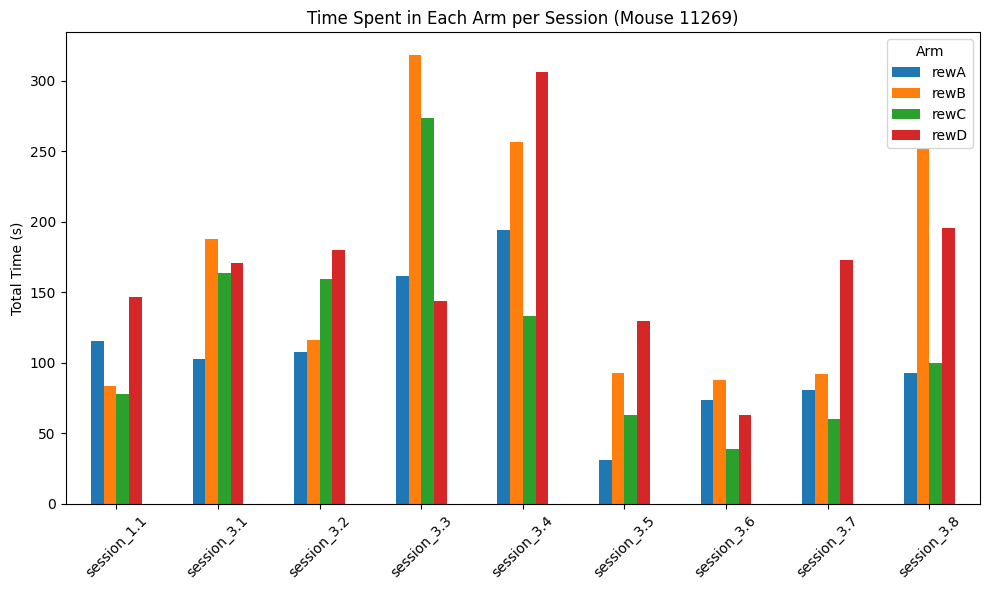

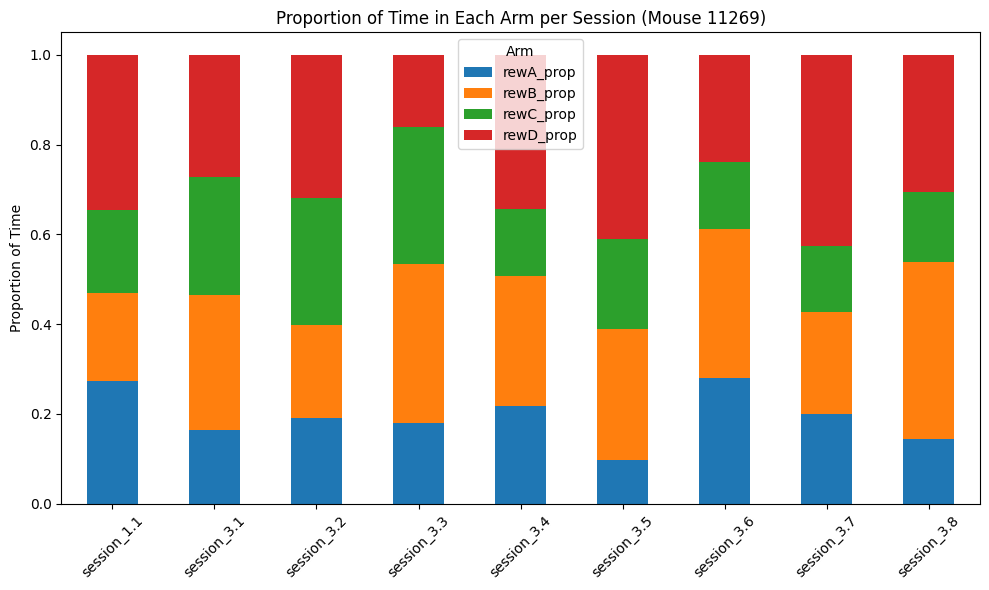


Mouse 11270 summary:
                rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session_1.1    8.791    5.346   22.221   29.358   0.133773   0.081350   
session_3.1  301.246  238.182  448.821  479.500   0.205244   0.162277   
session_3.2    0.000    0.000    0.000    0.000   0.000000   0.000000   
session_3.3  330.584  234.127  196.602  165.683   0.356619   0.252565   
session_3.4  167.926  405.466  115.051  423.746   0.150987   0.364566   
session_3.5  173.700  170.222  116.676  181.902   0.270350   0.264937   
session_3.6  183.337   80.824   95.373  223.229   0.314600   0.138691   
session_3.7  173.671  188.885   71.880  276.960   0.244127   0.265513   
session_3.8  109.774  110.917  104.696  288.931   0.178692   0.180553   

             rewC_prop  rewD_prop  
session_1.1   0.338137   0.446741  
session_3.1   0.305789   0.326691  
session_3.2   0.000000   0.000000  
session_3.3   0.212085   0.178731  
session_3.4   0.103446   0.381002  
session_3.5   0.181597   0.2831

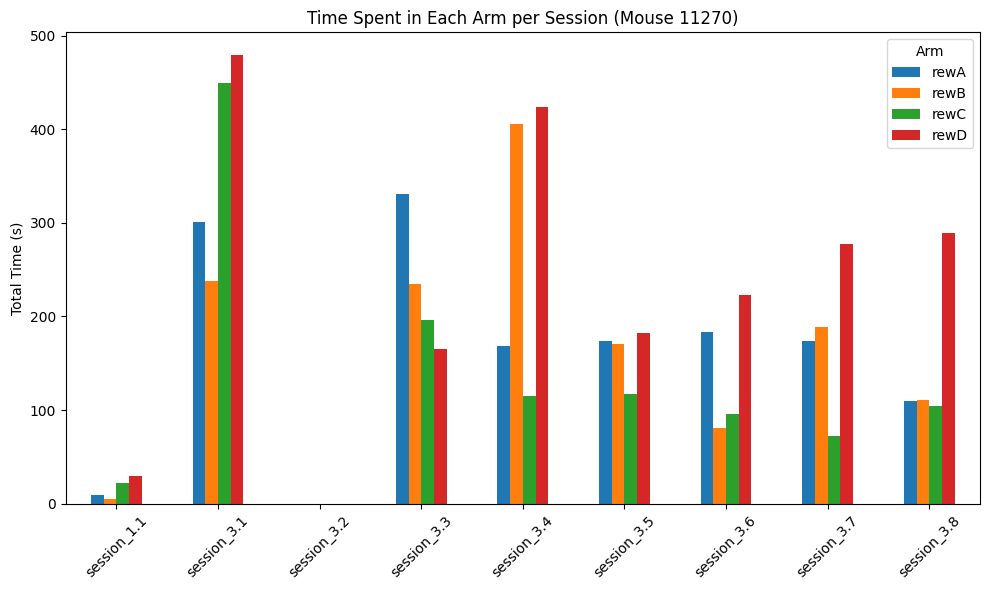

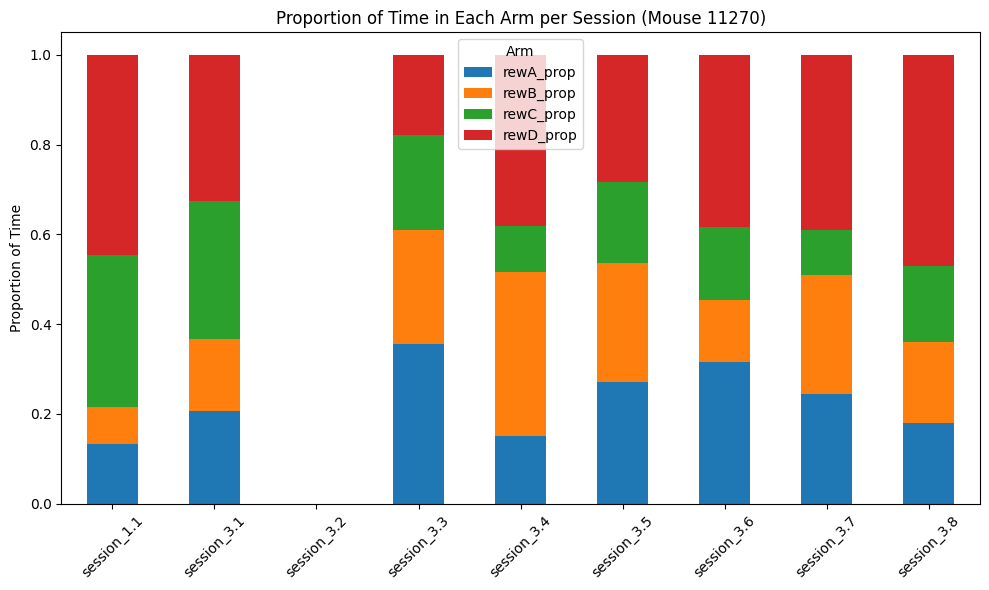


Mouse 11271 summary:
                rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session_1.1  193.421  203.825  168.757  407.498   0.198686   0.209373   
session_3.1   95.234  264.640   84.433  178.616   0.152882   0.424836   
session_3.2   79.744  824.026   87.356  155.413   0.069552   0.718707   
session_3.3  127.366  235.108   95.109  152.335   0.208825   0.385475   
session_3.4   85.070  201.599   76.197  395.272   0.112209   0.265913   
session_3.5  206.996  240.140   91.149  381.549   0.225036   0.261069   
session_3.6  111.973  159.995   47.569  104.480   0.264077   0.377332   
session_3.7   86.921   64.299   44.264  199.564   0.220026   0.162762   
session_3.8   95.410   37.180   39.541  156.888   0.289983   0.113003   

             rewC_prop  rewD_prop  
session_1.1   0.173351   0.418590  
session_3.1   0.135543   0.286738  
session_3.2   0.076191   0.135550  
session_3.3   0.155937   0.249763  
session_3.4   0.100505   0.521372  
session_3.5   0.099093   0.4148

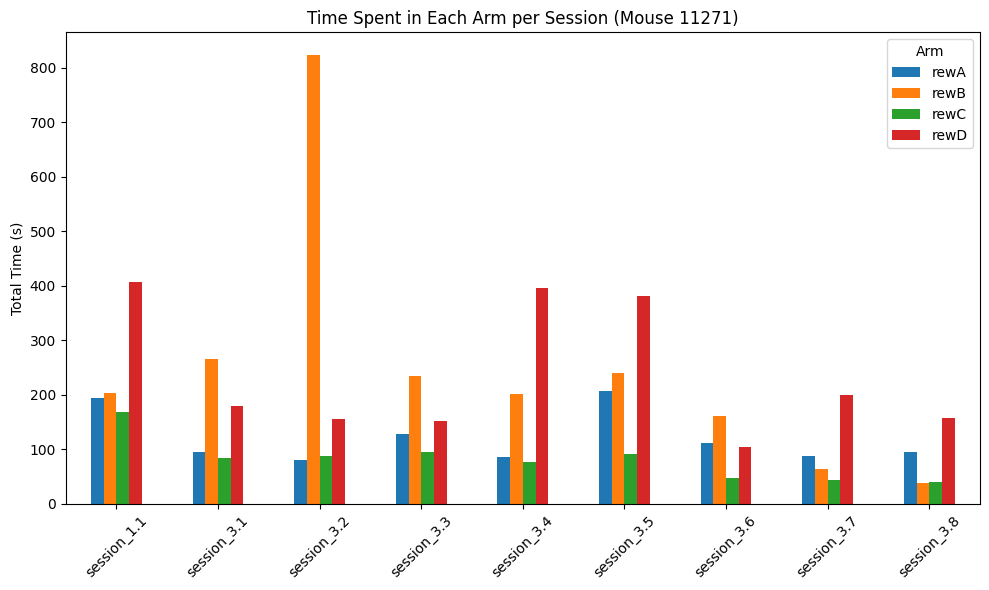

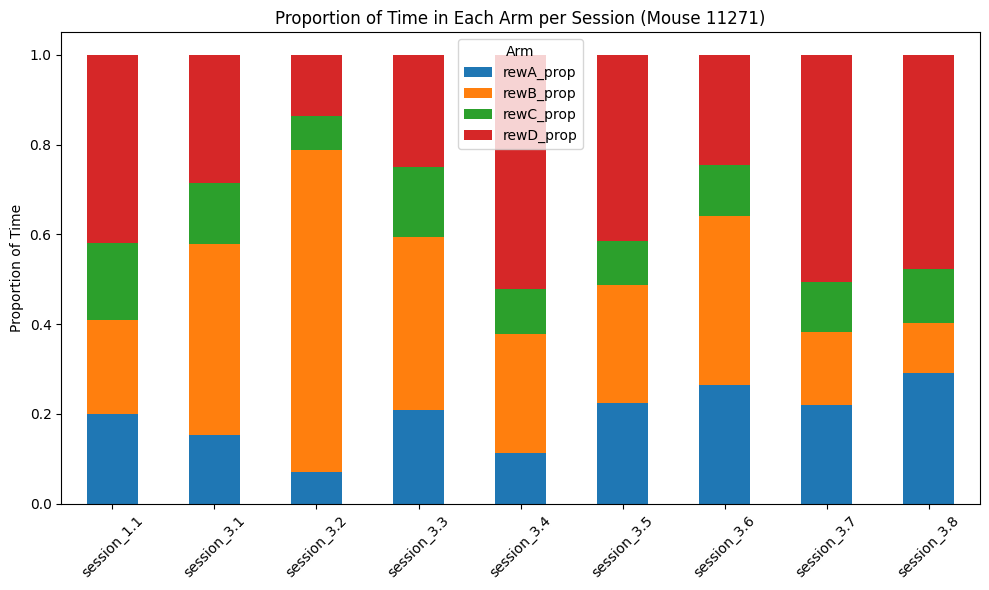


Mouse 11272 summary:
                rewA     rewB     rewC     rewD  rewA_prop  rewB_prop  \
session_1.1   97.726   71.265   78.083  122.704   0.264283   0.192724   
session_3.1   20.789   22.736   33.472   75.156   0.136632   0.149429   
session_3.2   52.592  192.490   43.603   63.952   0.149139   0.545859   
session_3.3   14.479   38.996   54.406   37.479   0.099608   0.268272   
session_3.4   59.575  169.109   75.550   60.349   0.163406   0.463842   
session_3.5   49.579  112.663   88.764   75.871   0.151675   0.344665   
session_3.6   64.003   85.119  122.413   78.496   0.182850   0.243176   
session_3.7   52.071   92.882  145.075  283.839   0.090737   0.161853   
session_3.8  138.092  184.127  106.207  168.815   0.231217   0.308296   

             rewC_prop  rewD_prop  
session_1.1   0.211162   0.331832  
session_3.1   0.219989   0.493950  
session_3.2   0.123648   0.181354  
session_3.3   0.374285   0.257836  
session_3.4   0.207223   0.165529  
session_3.5   0.271552   0.2321

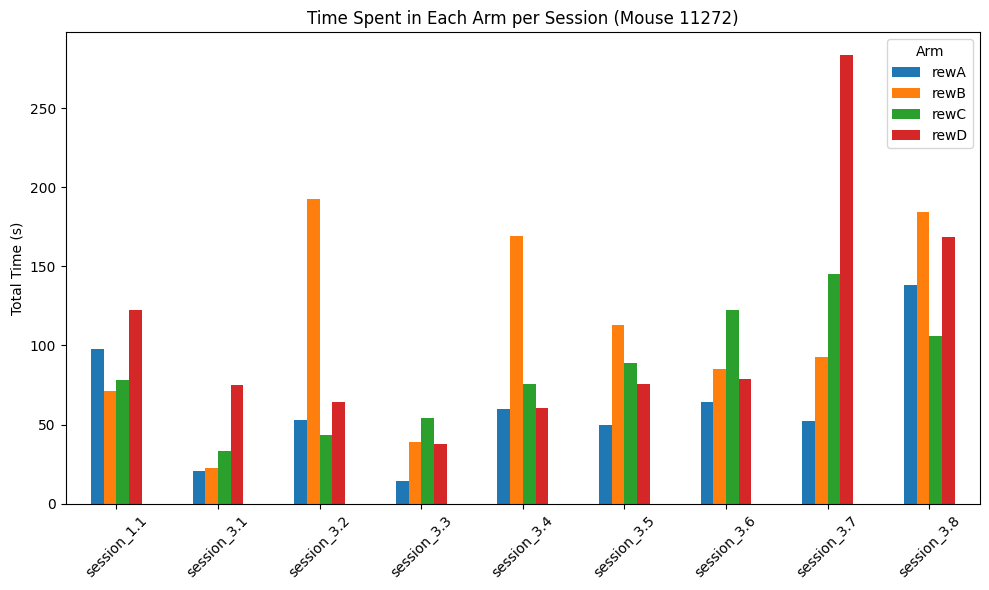

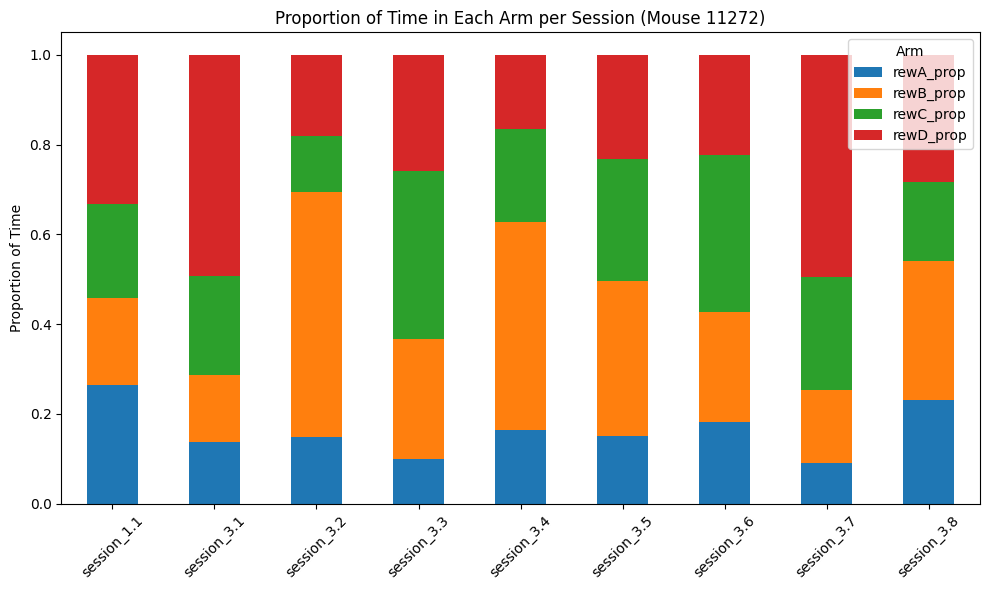

In [54]:
#this is to plot the time spent in each rewroi across all sessions 
import re

mice_that_matter = ["6357", "6359", "7999", "8001", "8002", 
                    "9493", "9494", "9496", "9497", 
                    "8938", "8939", "8941", "9129", 
                    "9257", "9258", "9259", "9260",
                    "8549", "8550", "8551", "8552",
                    "11038", "11039", "11040", "11268", 
                    "11269", "11270", "11271", "11272"]

for i in mice_that_matter:
    filepaths = []
    for j in all_mice_sessions_sorted:
        # include both habituation (session1.1) and session3.*
        if i in j and ("session1.1" in j or "session3" in j):
            filepaths.append(j)

    # calculate arm preference
    summary = calculate_arm_times(filepaths)

    # relabel sessions: will catch session1.1 or session3.x
    session_labels = [
        re.search(r"(session[_\s]?(?:1\.1|3\.\d+))", p, flags=re.I).group(1)
        if re.search(r"(session[_\s]?(?:1\.1|3\.\d+))", p, flags=re.I) else "unknown_session"
        for p in summary.index
    ]
    summary.index = session_labels

    print(f"\nMouse {i} summary:")
    print(summary)

    # plot
    plot_arm_preference(summary, mouse_id=i)


The cell below contains the functions to `calculate the left/right time in maze` + the function to `plot` them 

In [55]:


def calculate_left_right_time(filepaths):
    results = {}
    for path in filepaths:
        df = pd.read_csv(path)

        #dropping the passive trials 
        df = df.dropna(subset=['first_reward_area_visited'])

        #clip negative times 
        for col in ["entrance1", "entrance2", "rewA", "rewB", "rewC", "rewD"]:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors="coerce")
                df[col] = df[col].mask(df[col] < 0, pd.NA)   # or .clip(lower=0)

        

        # Ensure numeric types
        df['trial_start_time'] = pd.to_numeric(df['trial_start_time'], errors='coerce')
        df['end_trial_time'] = pd.to_numeric(df['end_trial_time'], errors='coerce')
        df['trial_duration'] = (df['end_trial_time'] - df['trial_start_time']) / 1000  # convert ms to seconds


        # Calculate left and right times
        left_time  = (df['rewA'].sum() + df['rewB'].sum()) / 1000.0  # ms → s
        right_time = (df['rewC'].sum() + df['rewD'].sum()) / 1000.0  # ms → s
        
        # Now calculate proportions inside the loop
        total_time = left_time + right_time
        left_prop = left_time / total_time if total_time > 0 else 0
        right_prop = right_time / total_time if total_time > 0 else 0

        results[path] = {
            'Left_time': left_time,
            'Right_time': right_time,
            'Left_prop': left_prop,
            'Right_prop': right_prop
        }

    return pd.DataFrame(results).T



def plot_left_right(summary_df, mouse_id=None):
    ax = summary_df[['Left_time', 'Right_time']].plot(
        kind='bar', figsize=(8, 5), rot=45)
    ax.set_ylabel("Total Time (s)")
    title = "Time spent Left vs Right per Session"
    if mouse_id:
        title += f" (Mouse {mouse_id})"
    ax.set_title(title)
    ax.legend(title="Side")
    plt.tight_layout()
    plt.show()

    # Plot proportions
    ax = summary_df[['Left_prop', 'Right_prop']].plot(
        kind='bar', stacked=True, figsize=(8, 5), rot=45
    )
    ax.set_ylabel("Proportion of Time")
    title = "Proportion of Time Left vs Right per Session"
    if mouse_id:
        title += f" (Mouse {mouse_id})"
    ax.set_title(title)
    ax.legend(title="Side")
    plt.tight_layout()
    plt.show()

Here we plot the mice that matter, but only the session 3s

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session 3.1      328.062     438.201   0.428132    0.571868
session3.2       312.882     503.640   0.383189    0.616811
session3.3       300.370     443.856   0.403601    0.596399
session3.4       350.017     588.219   0.373059    0.626941
session3.5       207.109     298.344   0.409749    0.590251
session3.6      1044.719     313.499   0.769184    0.230816
session3.7       674.567     190.979   0.779354    0.220646
session3.8       888.971     539.990   0.622110    0.377890


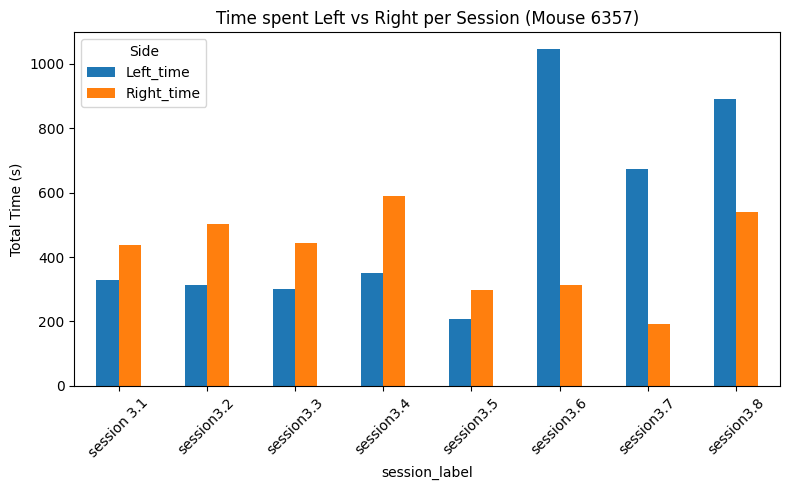

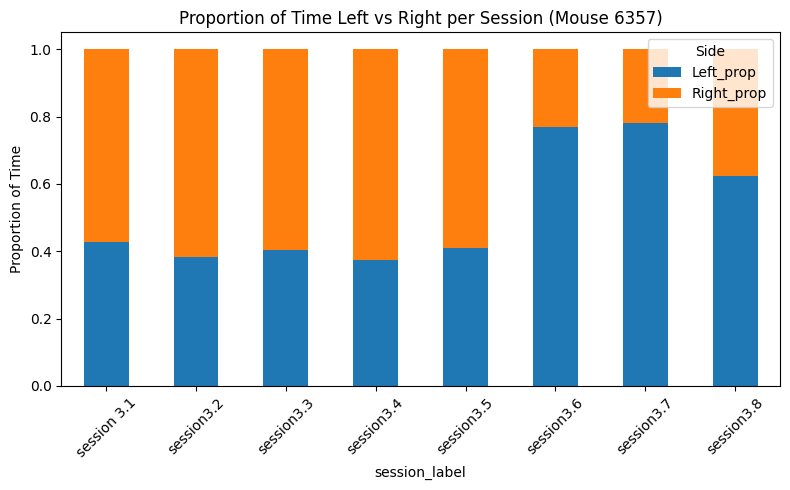

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session3.1       156.301     458.163   0.254370    0.745630
session3.2       703.579     925.395   0.431915    0.568085
session3.3       550.680     747.141   0.424311    0.575689
session3.4       717.527     353.018   0.670245    0.329755
session3.5       578.574     478.364   0.547406    0.452594
session3.6       487.704     648.758   0.429142    0.570858
session3.7       472.712     333.835   0.586094    0.413906
session3.8       371.618     363.105   0.505793    0.494207


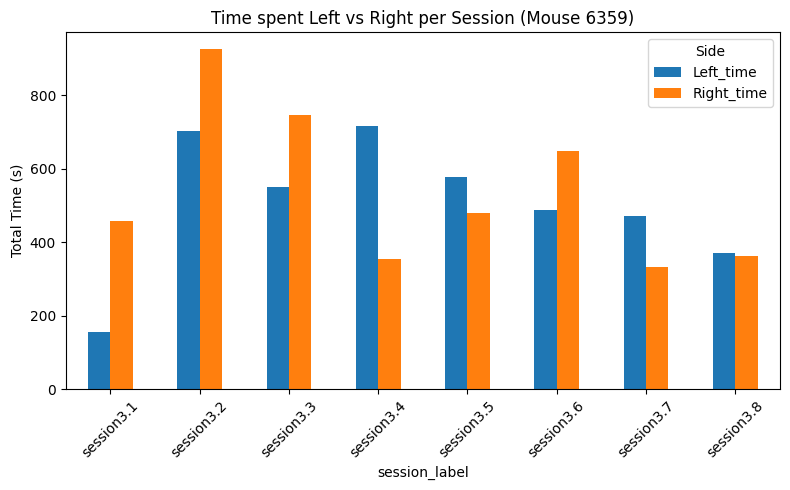

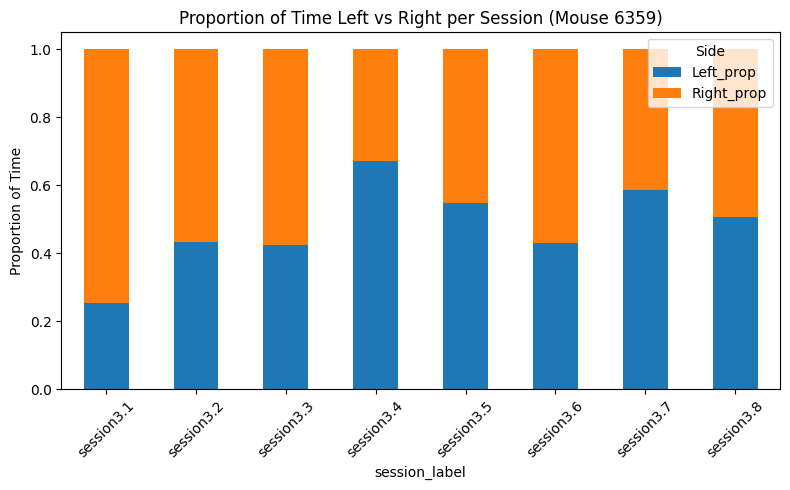

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session3.1       757.789     358.593   0.678790    0.321210
session3.2       436.509     461.240   0.486226    0.513774
session3.3       199.219     225.422   0.469147    0.530853
session3.4       110.139      99.277   0.525934    0.474066
session3.5       125.988     101.474   0.553886    0.446114
session3.6       153.284     134.303   0.533000    0.467000
session3.7       126.362     182.247   0.409457    0.590543
session3.8       311.785     261.598   0.543764    0.456236
session3.8       311.785     261.598   0.543764    0.456236


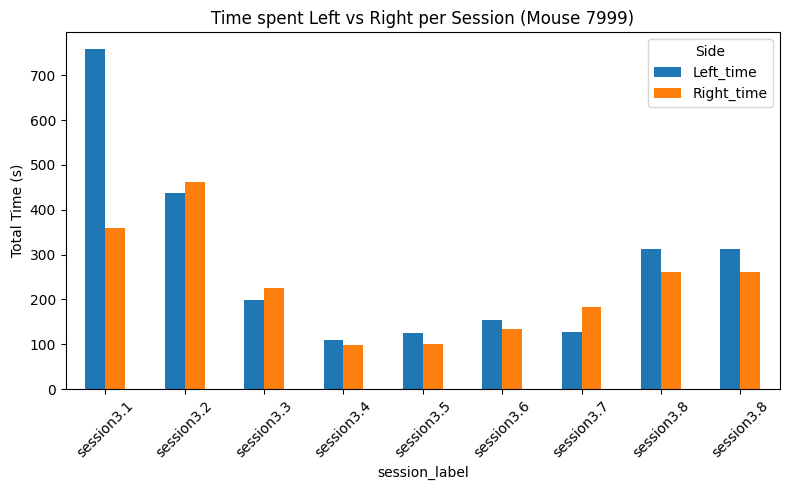

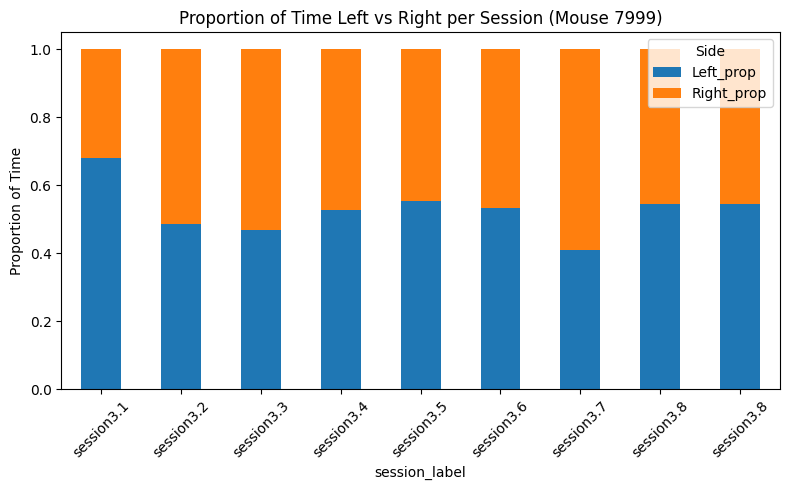

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session3.1       617.364     199.706   0.755583    0.244417
session3.2       122.380      98.392   0.554328    0.445672
session3.3       284.941     126.875   0.691913    0.308087
session3.4       147.302     180.005   0.450042    0.549958
session3.5       241.440     247.601   0.493701    0.506299
session3.6       170.645     227.343   0.428769    0.571231
session3.7       228.758     420.052   0.352581    0.647419
session3.8       136.130     508.764   0.211089    0.788911


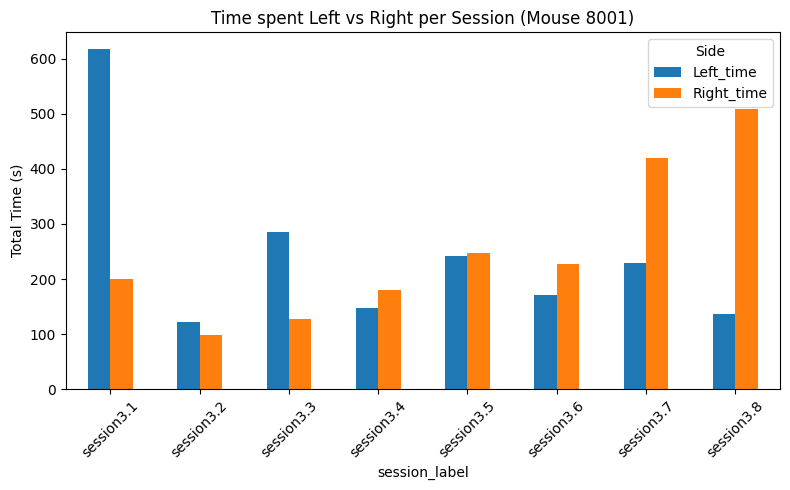

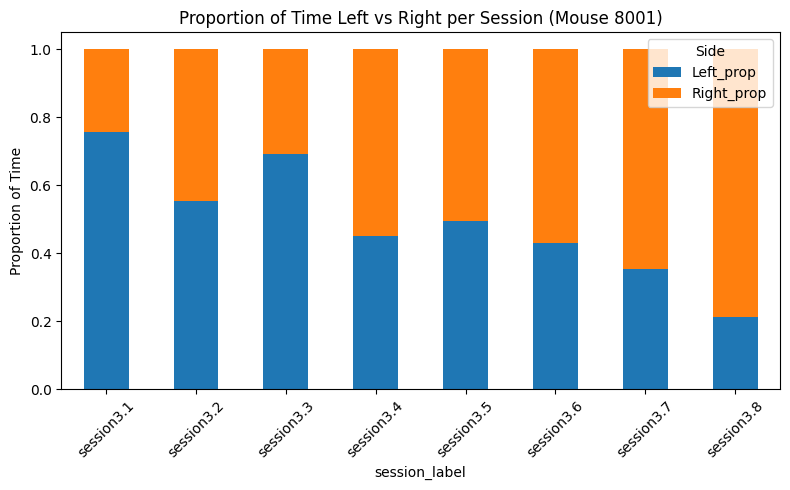

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session3.1       494.555     970.078   0.337665    0.662335
session3.2       134.369      87.516   0.605579    0.394421
session3.3       262.842     496.189   0.346286    0.653714
session3.4       302.444     230.243   0.567771    0.432229
session3.5       419.877     359.038   0.539054    0.460946
session3.6       542.774     593.469   0.477692    0.522308
session3.7       323.208     360.842   0.472492    0.527508
session3.1       494.555     970.078   0.337665    0.662335


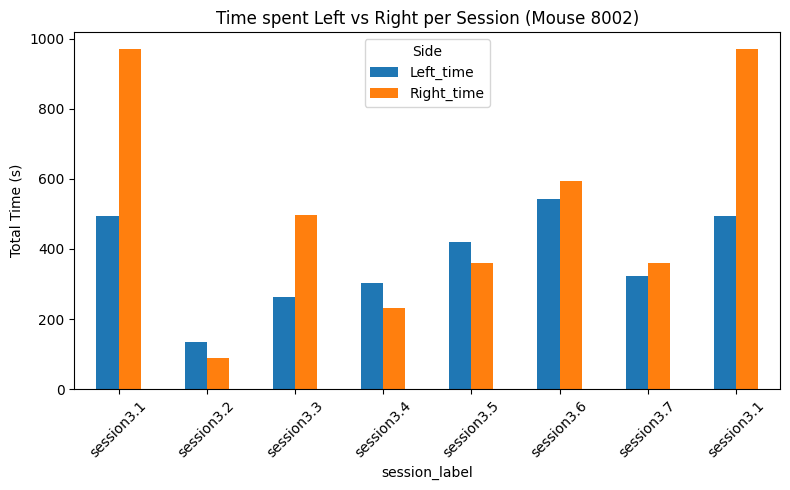

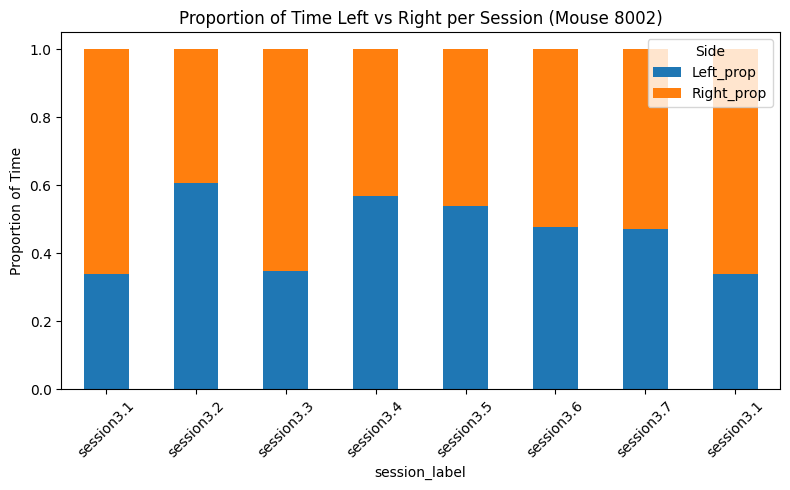

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_3.1      268.581     192.639   0.582327    0.417673
session_3.2      453.215     232.192   0.661235    0.338765
session_3.3      386.945     194.486   0.665505    0.334495
session_3.4      309.029     246.785   0.555994    0.444006
session_3.5      368.010     181.301   0.669948    0.330052
session_3.6      239.861     133.053   0.643207    0.356793
session_3.7      300.610      81.178   0.787374    0.212626
session_3.8      296.163     675.309   0.304860    0.695140


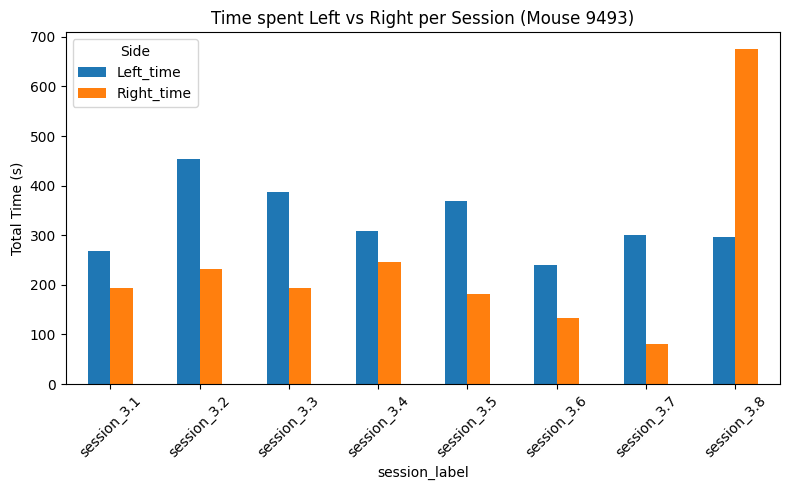

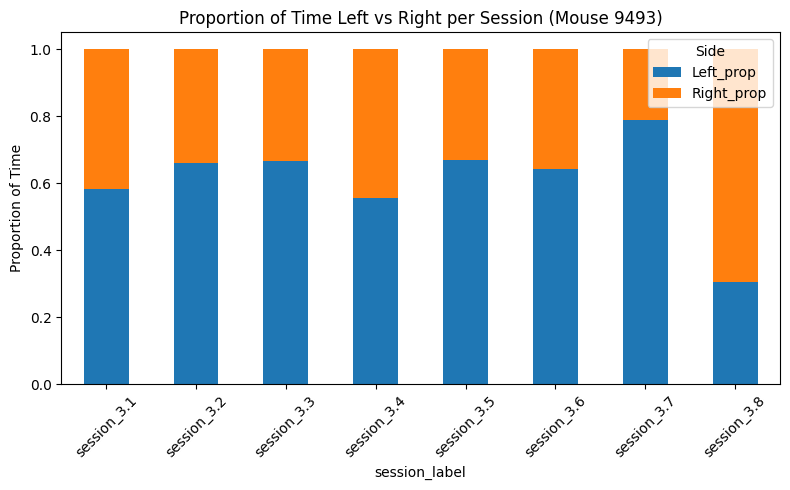

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_3.1      239.375     311.473   0.434557    0.565443
session_3.2      310.912     147.343   0.678469    0.321531
session_3.3      544.100     337.397   0.617245    0.382755
session_3.4        0.000       0.000   0.000000    0.000000
session_3.5      182.578     277.471   0.396866    0.603134
session_3.6      358.447     294.881   0.548648    0.451352
session_3.7      620.126     432.542   0.589099    0.410901


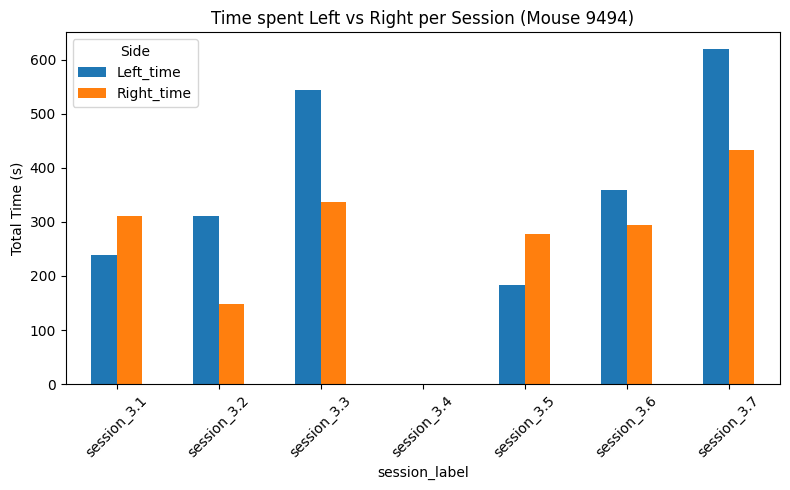

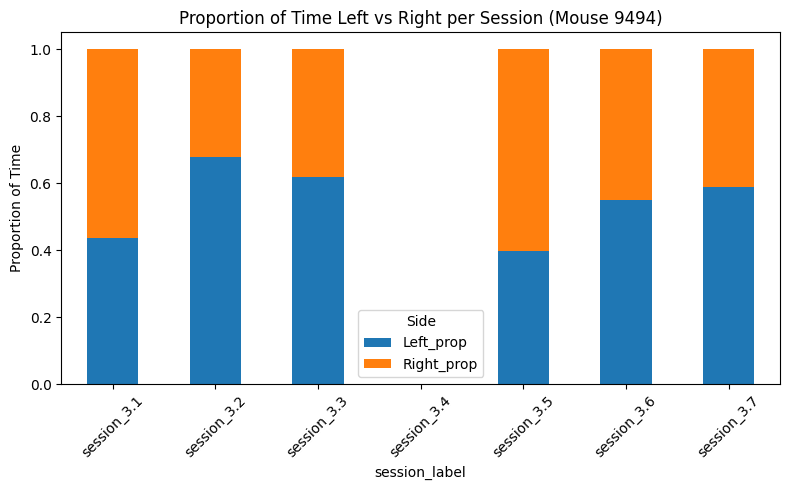

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_3.1      431.014     203.667   0.679103    0.320897
session_3.2      129.651     224.996   0.365578    0.634422
session_3.3      426.092     375.163   0.531781    0.468219
session_3.4      396.559     396.150   0.500258    0.499742
session_3.5      235.298     545.342   0.301417    0.698583
session_3.6      426.337     430.907   0.497334    0.502666
session_3.7      630.078     282.417   0.690500    0.309500
session_3.8      315.794     428.519   0.424276    0.575724


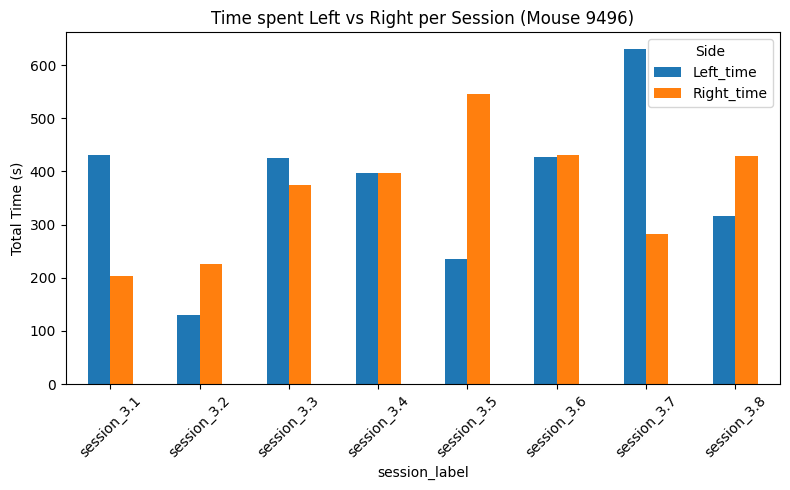

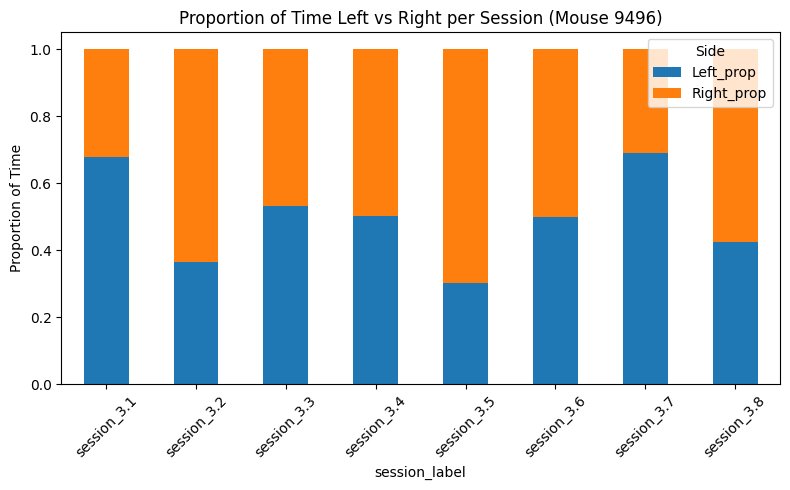

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_3.1      554.963     281.631   0.663360    0.336640
session_3.2      325.726     270.207   0.546582    0.453418
session_3.3      588.756     309.492   0.655449    0.344551
session_3.4      340.181     173.979   0.661625    0.338375
session_3.5      287.231     185.917   0.607064    0.392936
session_3.6      329.442     186.602   0.638399    0.361601
session_3.7      370.943     132.896   0.736233    0.263767
session_3.8      246.054     310.421   0.442165    0.557835


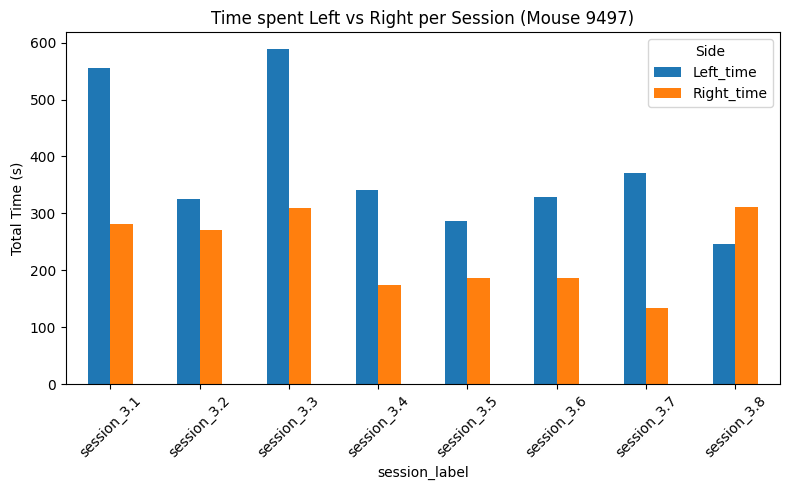

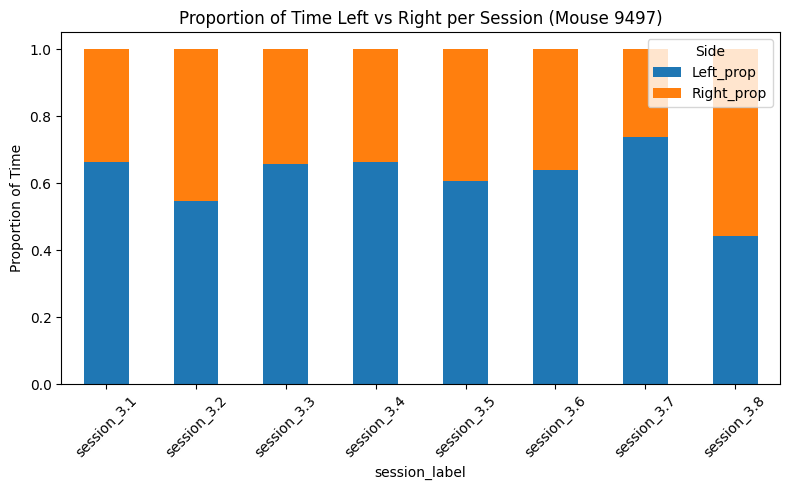

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_3.1      501.175     210.413   0.704305    0.295695
session_3.2      431.788     347.950   0.553760    0.446240
session_3.3      293.186     352.632   0.453976    0.546024
session_3.4      341.090     431.297   0.441605    0.558395
session_3.5      355.171     498.597   0.416004    0.583996
session_3.6      139.014     603.979   0.187100    0.812900
session_3.7      259.946     685.878   0.274835    0.725165
session_3.8      295.445     782.020   0.274204    0.725796
session_3.8      204.242    1299.708   0.135804    0.864196
session_3.9      192.533     347.401   0.356586    0.643414
session_3.10     219.918     396.410   0.356820    0.643180
session_3.11     237.765     559.700   0.298151    0.701849
session_3.12     248.338     222.812   0.527089    0.472911


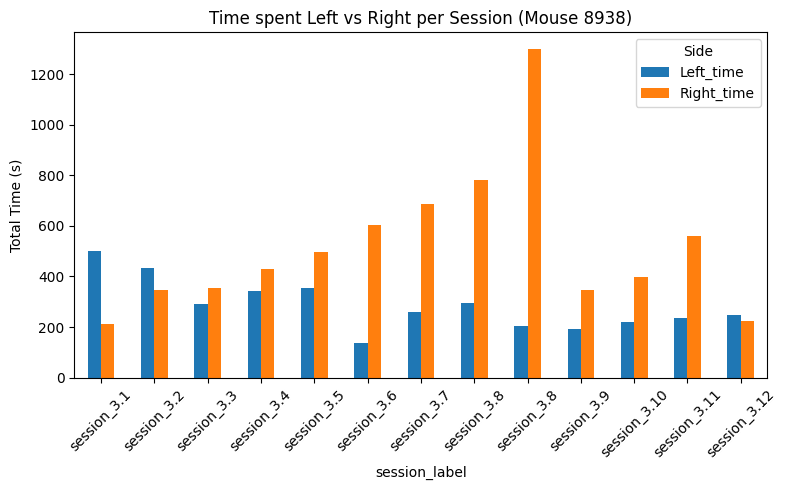

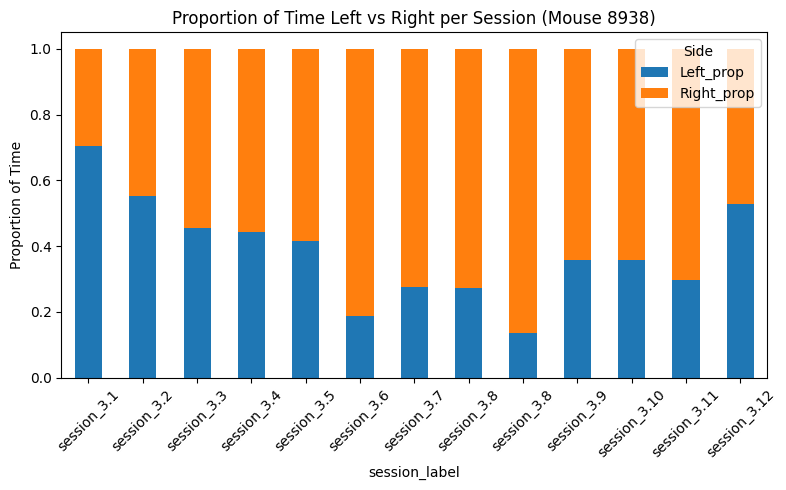

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session3.1       235.432     313.073   0.429225    0.570775
session_3.1        0.000       0.000   0.000000    0.000000
session_3.2      369.715     129.119   0.741158    0.258842
session_3.3      222.819     402.953   0.356071    0.643929
session_3.4      259.269     294.002   0.468611    0.531389
session_3.5      391.688     323.552   0.547632    0.452368
session_3.6      249.375     384.089   0.393669    0.606331
session_3.7      135.421     431.883   0.238710    0.761290
session_3.8      119.512     295.281   0.288124    0.711876
session_3.8      211.244     901.774   0.189794    0.810206
session_3.9      295.567     327.839   0.474116    0.525884
session_3.10     125.015     298.284   0.295335    0.704665
session_3.11     114.297     252.831   0.311327    0.688673
session_3.12     282.993     673.731   0.295794    0.704206


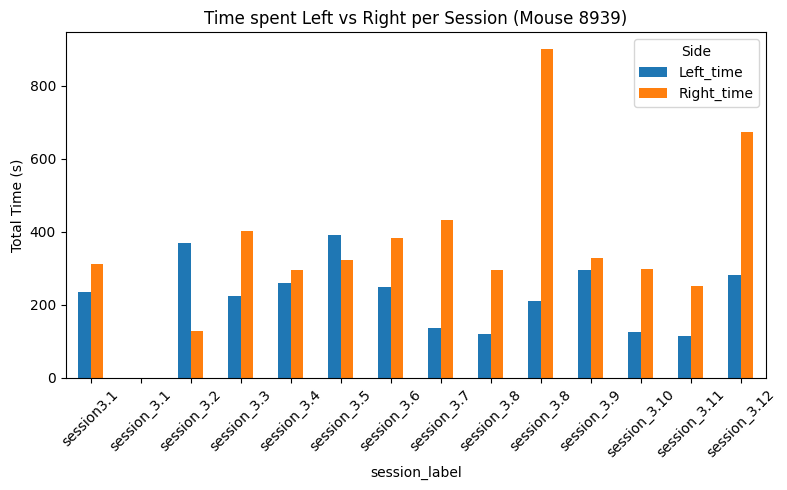

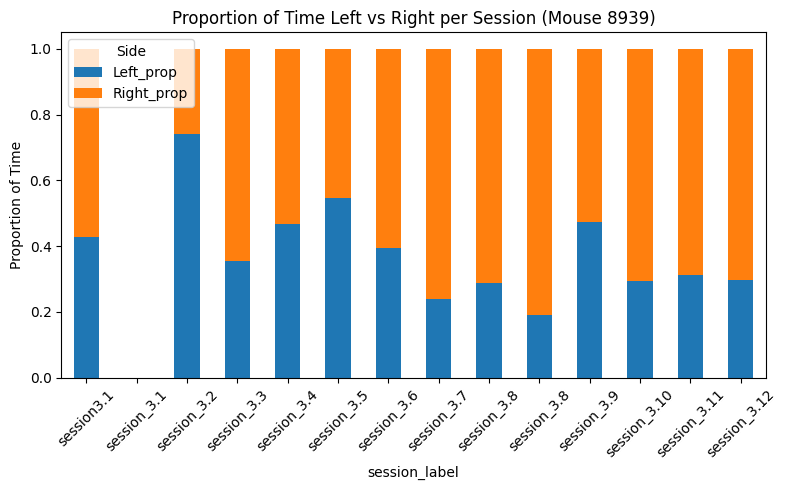

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_3.1      648.363     324.365   0.666541    0.333459
session_3.2      483.341     288.957   0.625848    0.374152
session_3.3      678.379     490.002   0.580615    0.419385
session_3.4      598.102     701.405   0.460253    0.539747
session_3.5      433.174     544.297   0.443158    0.556842
session_3.6      301.545     466.132   0.392802    0.607198
session_3.7      233.456     522.280   0.308912    0.691088
session_3.8      367.912     586.489   0.385490    0.614510
session_3.9      372.127     516.476   0.418778    0.581222
session_3.10     296.973     554.022   0.348971    0.651029
session_3.11     305.706     718.496   0.298482    0.701518
session_3.12     402.084     772.431   0.342340    0.657660


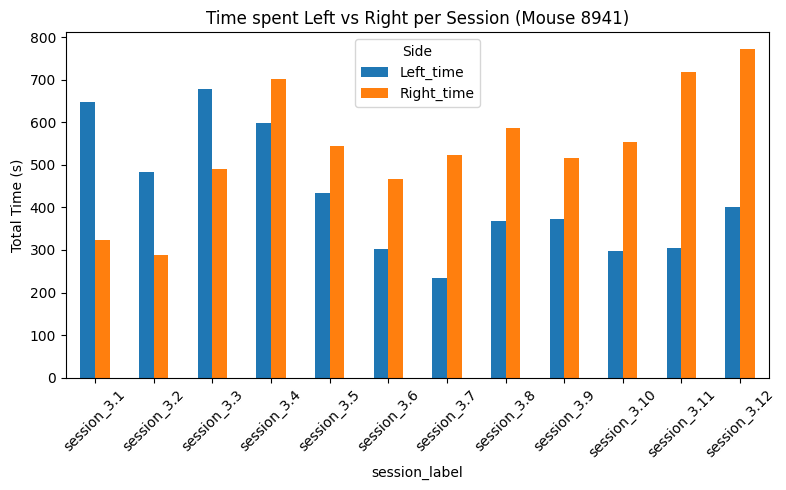

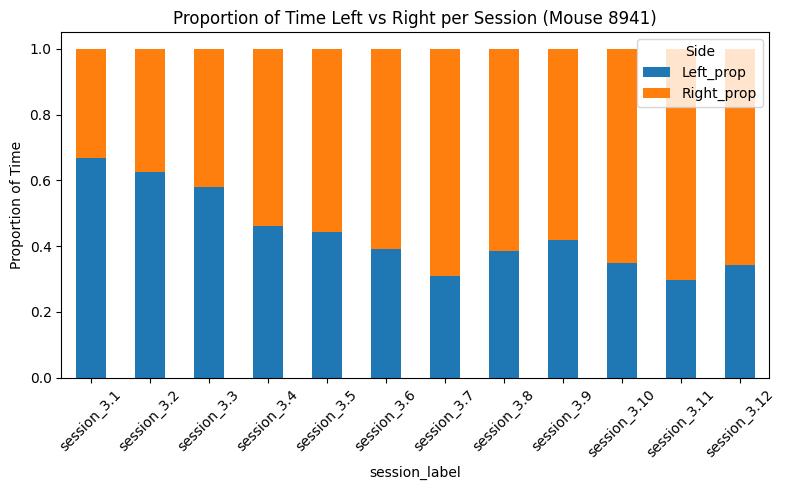

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_3.1      429.423     424.077   0.503132    0.496868
session_3.2      343.106     263.918   0.565226    0.434774
session_3.3      157.997     348.682   0.311829    0.688171
session_3.4      403.299     707.911   0.362937    0.637063
session_3.5      217.057     593.455   0.267802    0.732198
session_3.6      273.079     597.816   0.313561    0.686439
session_3.7      182.850     518.162   0.260837    0.739163
session_3.8      293.346     465.221   0.386711    0.613289
session_3.9      317.518     294.183   0.519074    0.480926
session_3.10     244.832     332.884   0.423793    0.576207
session_3.11     195.157     431.742   0.311305    0.688695
session_3.12     228.697     381.771   0.374626    0.625374


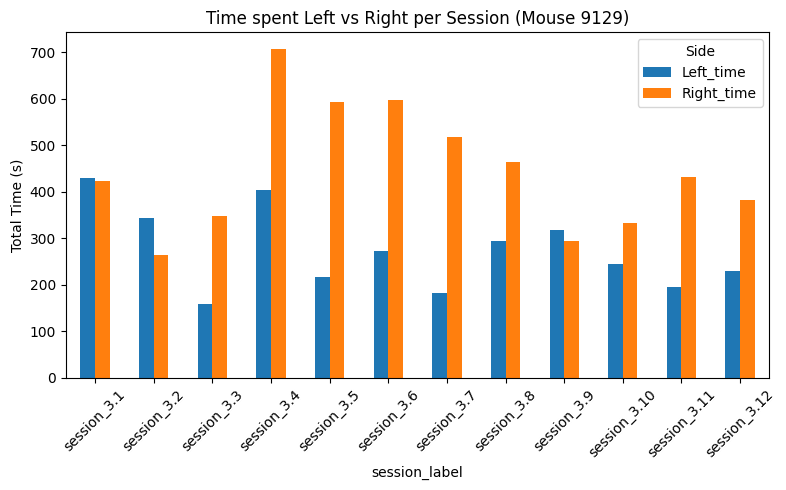

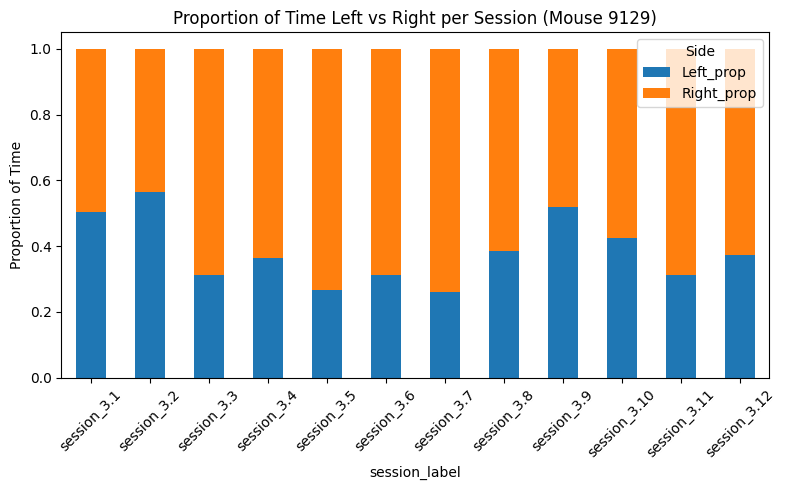

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_3.1      289.143     313.218   0.480016    0.519984
session_3.2      350.273     381.245   0.478830    0.521170
session_3.3      243.072     249.030   0.493946    0.506054
session_3.4      209.240     205.274   0.504784    0.495216
session_3.5      298.166     171.991   0.634184    0.365816
session_3.6      230.648     242.004   0.487987    0.512013
session_3.7      215.048     233.498   0.479434    0.520566
session_3.8      213.942     170.837   0.556013    0.443987


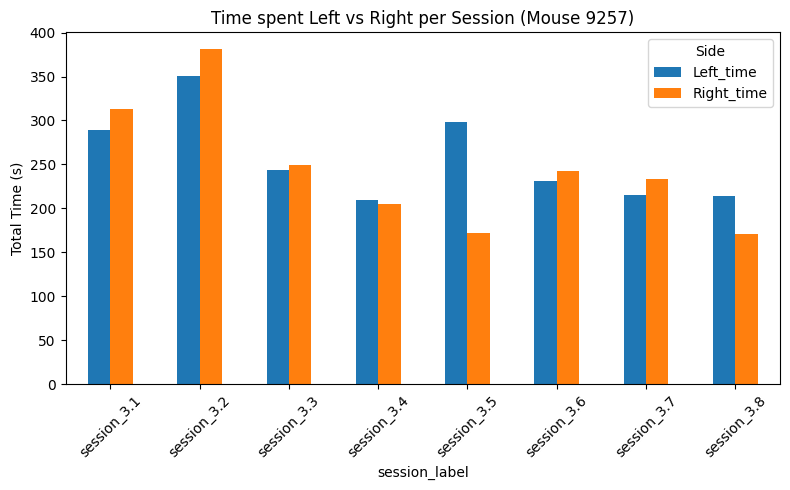

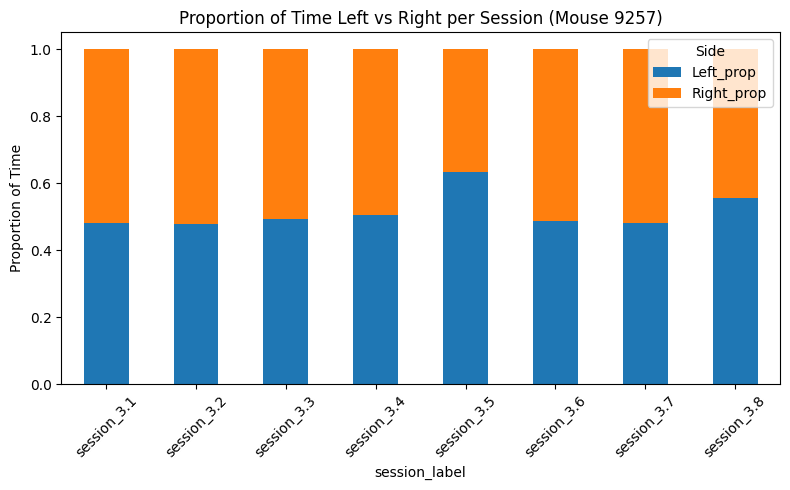

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_3.1      182.686     157.390   0.537192    0.462808
session_3.2      104.465     134.578   0.437013    0.562987
session_3.3      130.021      93.667   0.581261    0.418739
session_3.4      153.583     120.019   0.561337    0.438663
session_3.5      137.766     110.696   0.554475    0.445525
session_3.6      138.288     169.272   0.449629    0.550371
session_3.7      136.992     101.590   0.574193    0.425807
session_3.8      102.962      78.908   0.566130    0.433870


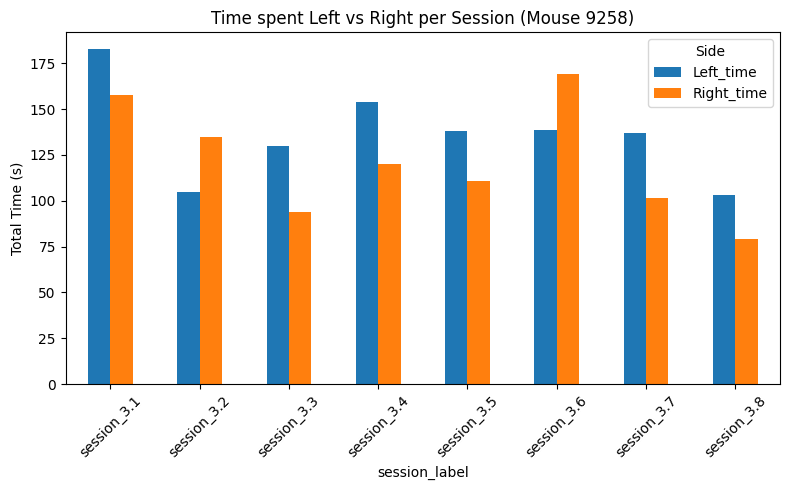

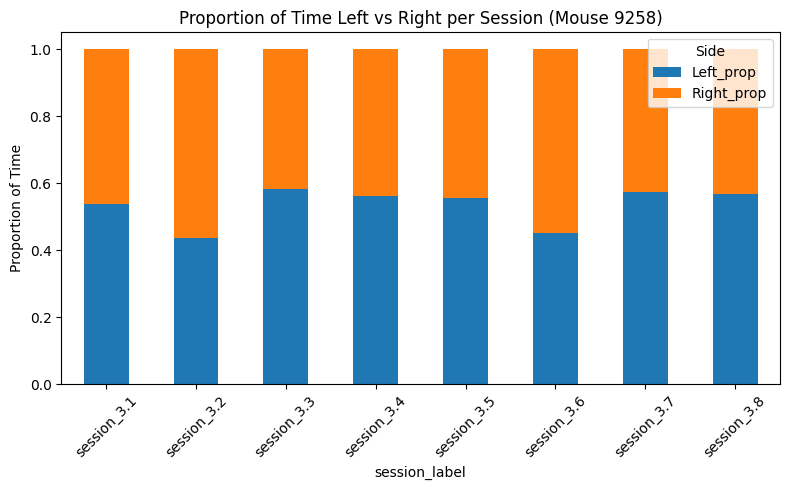

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_3.1      466.107     385.321   0.547441    0.452559
session_3.2      362.242     236.823   0.604679    0.395321
session_3.3      419.233     164.616   0.718050    0.281950
session_3.4      353.778     223.388   0.612957    0.387043
session_3.5      491.132     290.206   0.628578    0.371422
session_3.6       72.633       0.000   1.000000    0.000000
session_3.7      186.264     184.129   0.502882    0.497118
session_3.8      286.742     214.230   0.572371    0.427629


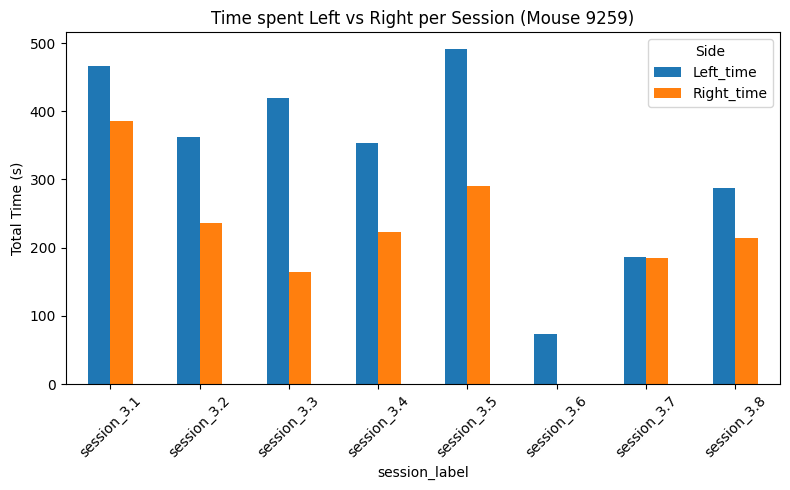

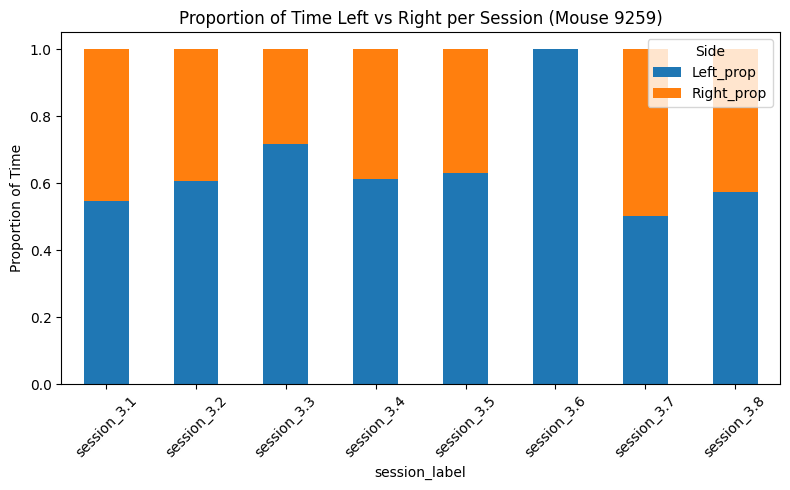

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session_3.1      239.853     112.284   0.681135    0.318865
session_3.2      462.815     236.379   0.661926    0.338074
session_3.3       91.353       0.000   1.000000    0.000000
session_3.4      387.435     359.333   0.518816    0.481184
session_3.5      300.240     366.149   0.450548    0.549452
session_3.6      388.594     282.047   0.579437    0.420563
session_3.7      292.276     275.611   0.514673    0.485327
session_3.8      174.794     354.080   0.330502    0.669498


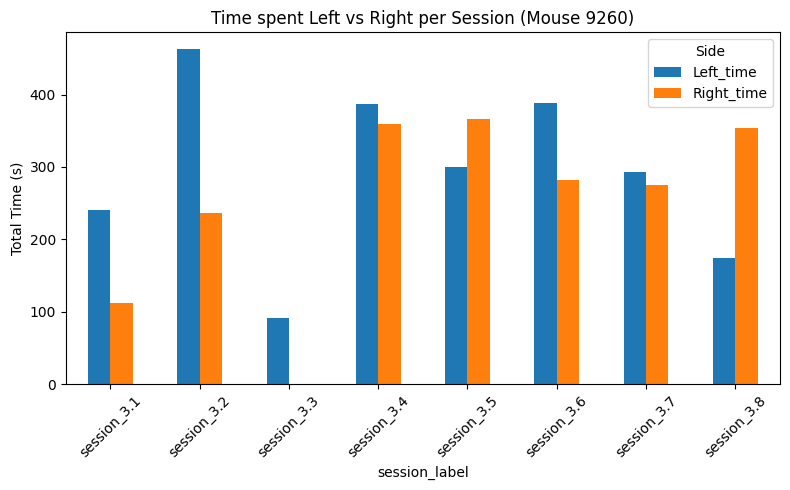

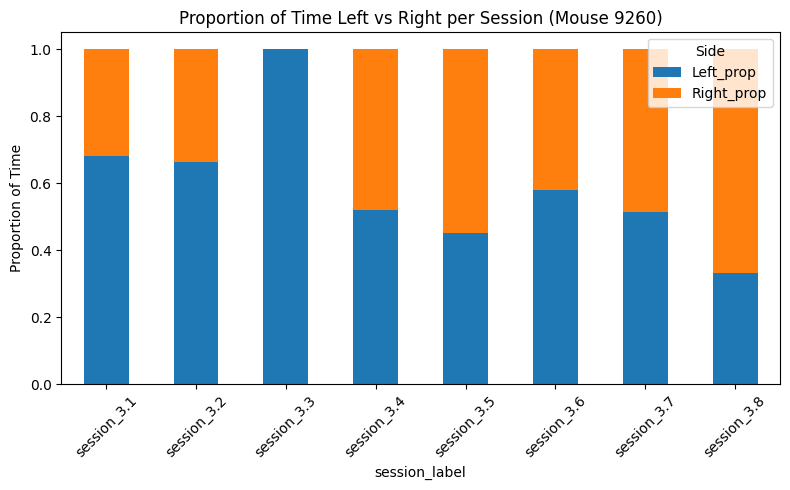

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session3.2       161.558     163.245   0.497403    0.502597
session3.3        28.481     135.619   0.173559    0.826441
session3.4         7.268      36.084   0.167651    0.832349
session3.5         2.100      13.664   0.133215    0.866785
session3.6         0.000       1.307   0.000000    1.000000
session3.7         0.977       5.674   0.146895    0.853105
session3.8        91.353     211.045   0.302095    0.697905


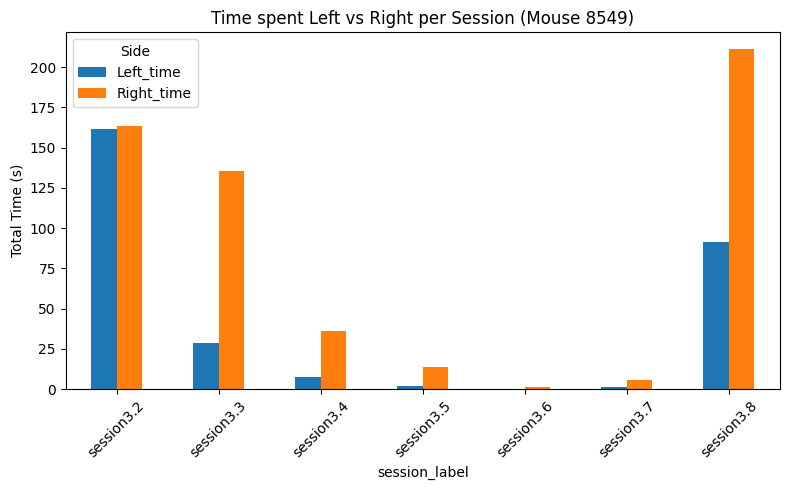

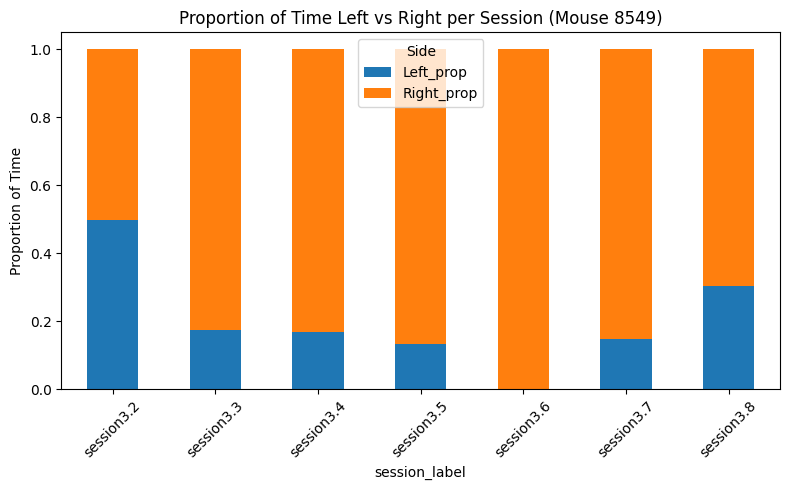

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session3.1       250.338     321.939   0.437442    0.562558
session3.2       188.138     237.131   0.442398    0.557602
session3.3       103.857     164.370   0.387198    0.612802
session3.4        94.859     100.803   0.484811    0.515189
session3.5       308.001     126.644   0.708627    0.291373
session3.6       322.128     358.830   0.473051    0.526949
session3.7       271.767      83.626   0.764694    0.235306
session3.8       320.718     215.498   0.598113    0.401887


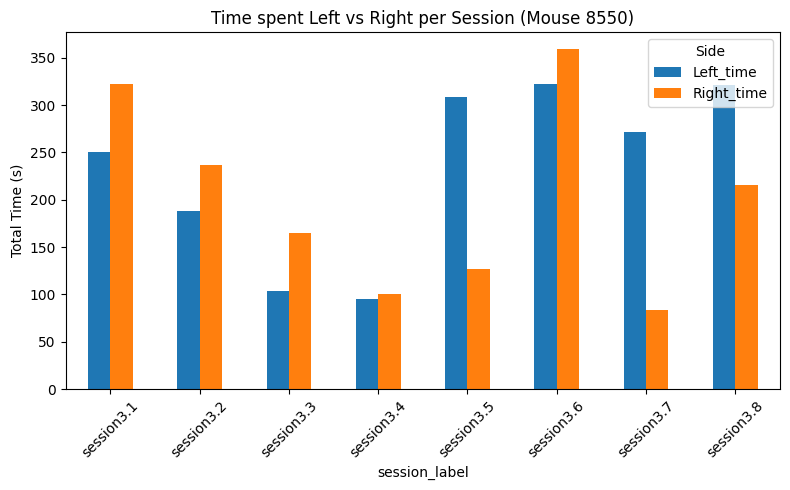

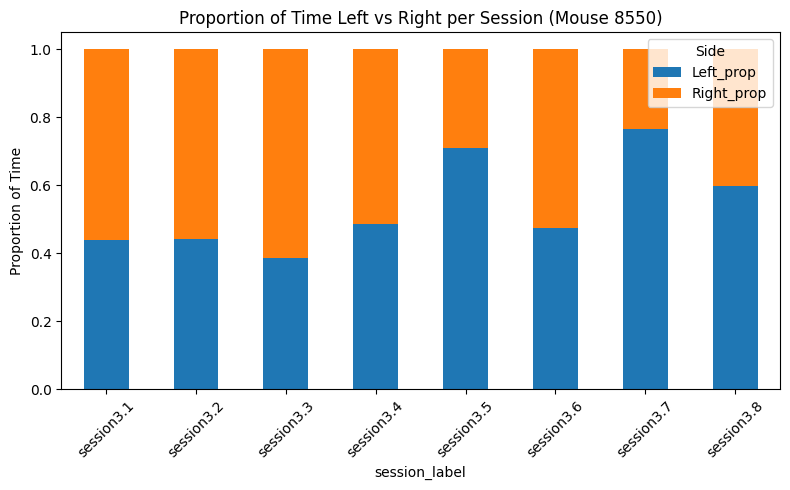

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session3.1       253.258     250.561   0.502677    0.497323
session3.2       460.149     236.967   0.660075    0.339925
session3.4       295.951     161.760   0.646589    0.353411
session3.5       269.886     100.991   0.727697    0.272303
session3.6       217.287     154.188   0.584930    0.415070
session3.7       308.805     176.943   0.635731    0.364269
session3.8       517.948     269.631   0.657646    0.342354


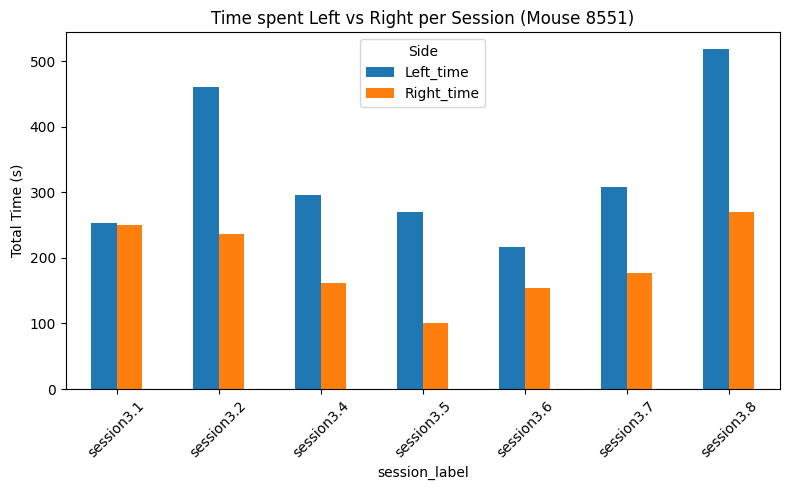

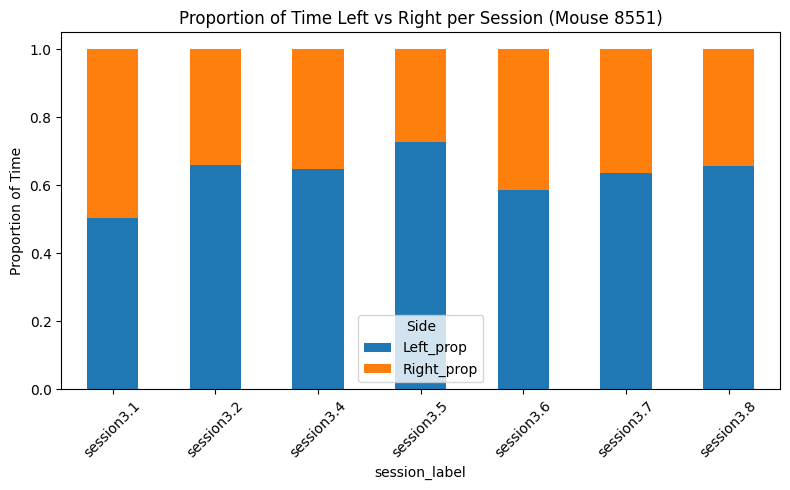

               Left_time  Right_time  Left_prop  Right_prop
session_label                                              
session3.1       308.199     427.449   0.418949    0.581051
session3.2       182.773     261.650   0.411259    0.588741
session3.3        69.704      82.453   0.458106    0.541894
session3.4       652.620     147.615   0.815535    0.184465
session3.5       886.554     221.688   0.799964    0.200036
session3.6       432.762      87.449   0.831897    0.168103
session3.7       224.591     159.682   0.584457    0.415543
session3.8       620.069      97.689   0.863897    0.136103


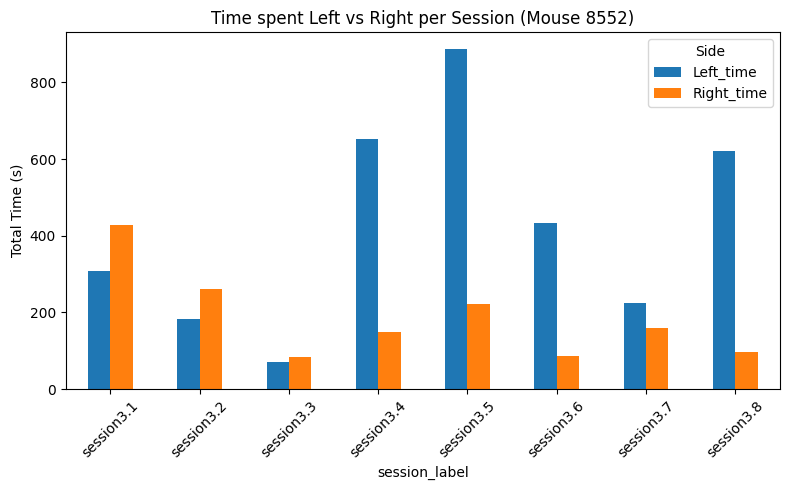

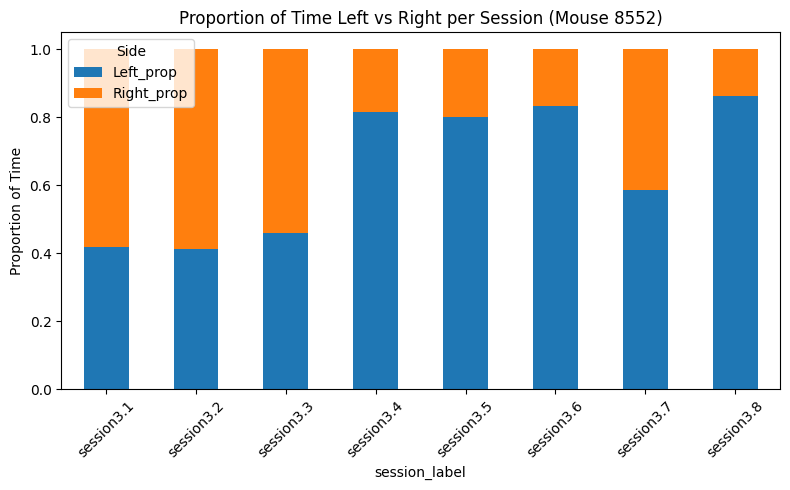

In [ ]:
mice_that_matter = ["6357", "6359", "7999", "8001", "8002", "9493", "9494", "9496", "9497", "8938", "8939", "8941", "9129", "9257", "9258", "9259", "9260", "8549", "8550", "8551", "8552", "11038", "11039", "11040", "11268", "11269", "11270", "11271", "11272"]


for i in mice_that_matter:
    filepaths = []
    for j in all_mice_sessions_sorted:
        if i in j and "session3" in j: 
            filepaths.append(j)

    summary = calculate_left_right_time(filepaths)
    # Relabel index to "session 1", "session 2", ...
    summary["session_label"] = [re.search(r"(session[_\s]?3\.\d+)", p, flags=re.I).group(1)
                                if re.search(r"(session[_\s]?3\.\d+)", p, flags=re.I) else f"session3.?"
                                for p in summary.index]
    summary = summary.set_index("session_label")
    print(summary)

    plot_left_right(summary, mouse_id=i)

Below is a little script that just plots mean ± SD for the total time spent in left vs right per mouse + proportions normalised by 1

In [ ]:

def extract_mouse_id(path):
    m = re.search(r"mouse\s?(\d+)", path.replace("\\", "/"))
    return m.group(1) if m else "unknown"

# --- Collect all session3 files ---
all_files = [p for p in all_mice_sessions_sorted if "session3" in p]

# --- Build per-file summary ---
summary_per_file = calculate_left_right_time(all_files)
summary_per_file["mouse_id"] = summary_per_file.index.map(extract_mouse_id)

# --- Aggregate per mouse: mean, SD, N ---
group = summary_per_file.groupby("mouse_id")

mean_df = group[["Left_time", "Right_time", "Left_prop", "Right_prop"]].mean()
std_df  = group[["Left_time", "Right_time", "Left_prop", "Right_prop"]].std(ddof=1)
n_df    = group.size().rename("n_sessions")

# Build tidy summary table
summary_table = pd.concat(
    [mean_df.add_suffix("_mean"), std_df.add_suffix("_sd"), n_df],
    axis=1
).sort_index()

# --- Print summary table ---
print("Mean ± SD per mouse (across session3 files)")
display(summary_table.round(3))

# --- Plot absolute times (mean ± SD) ---
ax = mean_df[["Left_time", "Right_time"]].plot(
    kind="bar", rot=45, figsize=(10,6),
    yerr=std_df[["Left_time", "Right_time"]].T.values
)
ax.set_ylabel("Mean Time (s)")
ax.set_xlabel("Mouse ID")
ax.set_title("Time spent Left vs Right per Mouse (mean ± SD over session3)")
ax.legend(title="Side")
plt.tight_layout()
plt.show()

# --- Plot proportions (mean ± SD) ---
ax = mean_df[["Left_prop", "Right_prop"]].plot(
    kind="bar", rot=45, figsize=(10,6),
    yerr=std_df[["Left_prop", "Right_prop"]].T.values
)
ax.set_ylabel("Mean Proportion of Time")
ax.set_xlabel("Mouse ID")
ax.set_title("Proportion Left vs Right per Mouse (mean ± SD over session3)")
ax.legend(title="Side")
plt.tight_layout()
plt.show()


this cell just gets the left vs right for sessions 1 + 3

In [ ]:
mice_that_matter = ["6357", "6359", "7999", "8001", "8002", 
                    "9493", "9494", "9496", "9497", 
                    "8938", "8939", "8941", "9129", 
                    "9257", "9258", "9259", "9260",
                    "8549", "8550", "8551", "8552"]

for i in mice_that_matter:
    filepaths = []
    for j in all_mice_sessions_sorted:
        # include session 1.1 AND any session 3.x
        if i in j and (re.search(r"session[_\s]?1\.1", j, flags=re.I) or
                       re.search(r"session[_\s]?3\.\d+", j, flags=re.I)):
            filepaths.append(j)

    if not filepaths:
        continue  # skip mice with no files

    summary = calculate_left_right_time(filepaths)

    # Relabel sessions consistently
    summary["session_label"] = [
        re.search(r"(session[_\s]?\d+\.\d+)", p, flags=re.I).group(1).replace(" ", "_")
        if re.search(r"(session[_\s]?\d+\.\d+)", p, flags=re.I) else "session_?.?"
        for p in summary.index
    ]
    summary = summary.set_index("session_label")

    # sort numerically (1.1 before 3.1, 3.2, …)
    def sess_key(lbl):
        m = re.search(r"(\d+)\.(\d+)", lbl)
        return (int(m.group(1)), int(m.group(2))) if m else (999, 999)

    summary = summary.sort_index(key=lambda idx: idx.map(sess_key))

    print(f"\n=== Mouse {i} ===")
    print(summary)

    plot_left_right(summary, mouse_id=i)


In [ ]:
def key(p):
    fname = os.path.basename(p)  # e.g., "mouse8938_session3.10_trial_info.csv"
    parts = fname.replace(".csv", "").split("_")  # ["mouse8938", "session3.10", ...]
    mouse = parts[0].replace("mouse", "")
    session = parts[1].replace("session", "")
    major, *minor = session.split(".")
    return int(mouse), int(major), int(minor[0]) if minor else 0

# Add parsed fields to summary_per_file (assumes index are file paths)
summary_per_file["mouse_id"]      = summary_per_file.index.map(lambda p: key(p)[0])
summary_per_file["session_major"] = summary_per_file.index.map(lambda p: key(p)[1])
summary_per_file["session_minor"] = summary_per_file.index.map(lambda p: key(p)[2])

# Canonical session label for display (e.g., "session_3.2")
summary_per_file["session"] = summary_per_file.apply(
    lambda r: f"session_{r.session_major}.{r.session_minor}", axis=1
)

# Pivot to Session x Mouse with Left_prop
pivot = summary_per_file.pivot_table(
    index="session",
    columns="mouse_id",
    values="Left_prop",
    aggfunc="mean",
)

# Build numeric session order from parsed columns and reindex
session_order = (
    summary_per_file[["session", "session_major", "session_minor"]]
    .drop_duplicates()
    .sort_values(["session_major", "session_minor"])
    ["session"].tolist()
)
pivot = pivot.reindex(index=session_order)

# Optional: enforce mouse column order
try:
    # If you have this list already defined
    pivot = pivot.reindex(columns=[int(m) for m in mice_that_matter if int(m) in pivot.columns])
except NameError:
    # otherwise just sort numerically
    pivot = pivot.reindex(columns=sorted(pivot.columns))

# Plot
ax = pivot.plot(kind="bar", rot=45, figsize=(20,6))
ax.set_ylabel("Left proportion")
ax.set_xlabel("Session")
ax.set_title("Left proportion per Mouse by Session")
ax.legend(title="Mouse ID", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [ ]:
def calculate_entry_probabilities(filepaths):
    results = {}

    for path in filepaths:
        df = pd.read_csv(path)

        # Drop NaNs
        valid = df['first_reward_area_visited'].dropna()

        # Count occurrences
        counts = valid.value_counts()

        # Convert to probabilities
        probs = counts / counts.sum()

        results[path] = probs.to_dict()

    prob_df = pd.DataFrame(results).T.fillna(0)

    # Ensure consistent column order
    all_areas = ["rewA", "rewB", "rewC", "rewD"]
    prob_df = prob_df.reindex(columns=all_areas, fill_value=0)

    return prob_df


def plot_entry_probabilities(prob_df, mouse_id=None):
    # Fixed colors for reward areas
    colors = {
        "rewA": "tab:blue",
        "rewB": "tab:orange",
        "rewC": "tab:green",
        "rewD": "tab:red"
    }

    ax = prob_df.plot(
        kind="bar",
        figsize=(8, 5),
        rot=0,  # keep labels horizontal
        color=[colors[col] for col in prob_df.columns]
    )

    ax.set_ylabel("Probability")
    title = "Probability of Entering Each Reward Area First"
    if mouse_id is not None:
        title += f" (Mouse {mouse_id})"
    ax.set_title(title)
    ax.legend(title="Reward Area")
    plt.tight_layout()
    plt.show()


In [ ]:
import re

mice_that_matter = ["6357", "6359", "7999", "8001", "8002",
                    "9493", "9494", "9496", "9497",
                    "8938", "8939", "8941", "9129",
                    "9257", "9258", "9259", "9260",
                    "8549", "8550", "8551", "8552"]

for mid in mice_that_matter:
    filepaths = [p for p in all_mice_sessions_sorted if mid in p and "session3" in p]

    if not filepaths:
        continue  # skip mice with no session3 files

    # Calculate entry probabilities per session
    entry_probs = calculate_entry_probabilities(filepaths)

    # Add session labels (instead of raw paths)
    entry_probs["session_label"] = [
        re.search(r"(session[_\s]?3\.\d+)", p, flags=re.I).group(1)
        if re.search(r"(session[_\s]?3\.\d+)", p, flags=re.I) else "session3.?"
        for p in entry_probs.index
    ]
    entry_probs = entry_probs.set_index("session_label")

    print(f"\n=== Mouse {mid} ===")
    print(entry_probs)

    # Plot per mouse
    plot_entry_probabilities(entry_probs, mouse_id = mid)


Plotting the probability of entering each rew area first (normalised by 1)

In [ ]:
mice_that_matter = ["6357", "6359", "7999", "8001", "8002",
                    "9493", "9494", "9496", "9497",
                    "8938", "8939", "8941", "9129",
                    "9257", "9258", "9259", "9260",
                    "8549", "8550", "8551", "8552"]

for mid in mice_that_matter:
    # Include both session1 and session3 files
    filepaths = [
        p for p in all_mice_sessions_sorted
        if mid in p and ("session1" in p or "session3" in p)
    ]

    if not filepaths:
        continue

    # Calculate entry probabilities per session
    entry_probs = calculate_entry_probabilities(filepaths)

    # Extract session labels (1.x or 3.x)
    entry_probs["session_label"] = [
        re.search(r"(session[_\s]?\d+\.\d+)", p, flags=re.I).group(1)
        if re.search(r"(session[_\s]?\d+\.\d+)", p, flags=re.I) else "session?.?"
        for p in entry_probs.index
    ]
    entry_probs = entry_probs.set_index("session_label")

    print(f"\n=== Mouse {mid} ===")
    print(entry_probs)

    # Plot per mouse
    plot_entry_probabilities(entry_probs, mouse_id=mid)


Plotting the mismatch vs hit ratios


In [ ]:
# Load the summary
path = main_path+"/mismatch_summary.csv"
df = pd.read_csv(path)



print("Columns available:", df.columns.tolist())
display(df.head(len(df)))

# --- Compute percentages relative to active trials ---
df["perc_mismatch_act"] = (df["mismatch_count"] / df["tot_active_trials"] * 100).round(2)
df["perc_hits_act"]     = (df["hits"] / df["tot_active_trials"] * 100).round(2)

# --- Bar plot side by side ---
ax = df.plot(
    x="file",
    y=["perc_mismatch_act", "perc_hits_act"],
    kind="bar",
    figsize=(20,6),
    rot=90,
    color=["orange", "green"]
)

ax.set_ylabel("Percentage of Active Trials (%)")
ax.set_xlabel("Session File")
ax.set_title("Mismatch vs Hits (% of Active Trials)")
ax.legend(["Mismatch %", "Hit %"], title="Metric")

plt.tight_layout()
plt.show()


Plotting mismatchvs hit ratios with SD

In [ ]:
from matplotlib.ticker import MaxNLocator

# --- load ---
path = main_path+"/mismatch_summary.csv"
df = pd.read_csv(path)

# make sure columns exist
needed = {"file","mismatch_count","hits","tot_active_trials"}
missing = needed - set(df.columns)
if missing:
    raise ValueError(f"CSV missing columns: {missing}")

# parse mouse_id and session label (optional)
df["mouse_id"] = df["file"].str.extract(r"mouse\s?(\d+)", expand=False)
df["session"]  = df["file"].str.extract(r"(session[_\s]?\d+\.\d+)", expand=False)

# per-session percentages
df["perc_mismatch_act"] = (df["mismatch_count"] / df["tot_active_trials"] * 100)
df["perc_hits_act"]     = (df["hits"]            / df["tot_active_trials"] * 100)

# aggregate per mouse: mean + SD + n
g = df.groupby("mouse_id")[["perc_mismatch_act","perc_hits_act"]]
mean = g.mean().sort_index()
sd   = g.std(ddof=1).reindex(mean.index)
n    = df.groupby("mouse_id").size()

# side-by-side bars with error bars
ax = mean.plot(
    kind="bar", y=["perc_mismatch_act","perc_hits_act"],
    yerr=sd[["perc_mismatch_act","perc_hits_act"]].T.values,
    figsize=(10,6), rot=0
)
ax.set_ylabel("% of Active Trials")
ax.set_xlabel("Mouse ID")
ax.set_title("Mismatch vs Hit (mean ± SD across sessions)")
ax.legend(["Mismatch %","Hit %"], title="Metric")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

# (optional) print the summary table
summary = mean.copy()
summary.columns = ["mismatch_mean_%","hit_mean_%"]
summary["mismatch_sd_%"] = sd["perc_mismatch_act"]
summary["hit_sd_%"]      = sd["perc_hits_act"]
summary["n_sessions"]    = n
display(summary.round(2))


In [ ]:
def calculate_first_visit_probabilities(filepaths):
    results = {}

    for path in filepaths:
        df = pd.read_csv(path)

        # Drop rows without data
        df = df.dropna(subset=['first_reward_area_visited', 'area_rewarded'])

        total_trials = len(df)
        if total_trials == 0:
            continue

        # Correct first visit
        correct_first = (df['first_reward_area_visited'] == df['area_rewarded']).sum()

        # Incorrect first visits (split by which area)
        incorrect_counts = df.loc[df['first_reward_area_visited'] != df['area_rewarded'], 'first_reward_area_visited'].value_counts()

        stats = {
            "Correct_first": correct_first / total_trials,
            "Incorrect_first": 1 - (correct_first / total_trials)
        }

        # Add per-area incorrect probabilities
        for area in ['rewA', 'rewB', 'rewC', 'rewD']:
            stats[f"Incorrect_{area}"] = incorrect_counts.get(area, 0) / total_trials

        results[path] = stats

    return pd.DataFrame(results).T


def plot_first_visit_probabilities(summary_df):
    # Plot correct vs incorrect stacked
    summary_df[['Correct_first', 'Incorrect_first']].plot(
        kind='bar', stacked=True, figsize=(8, 5), rot=45
    )
    plt.ylabel("Probability")
    plt.title("Probability of Visiting Correct Area First vs Incorrect")
    plt.legend(title="First Visit")
    plt.tight_layout()
    plt.show()

    # Plot breakdown of incorrect first visits by area
    incorrect_cols = [col for col in summary_df.columns if col.startswith("Incorrect_rew")]
    summary_df[incorrect_cols].plot(
        kind='bar', stacked=True, figsize=(8, 5), rot=45
    )
    plt.ylabel("Probability")
    plt.title("Probability of Visiting Each Incorrect Area First")
    plt.legend(title="First Incorrect Area")
    plt.tight_layout()
    plt.show()



In [ ]:


summary = calculate_first_visit_probabilities(filepaths)
# Rename index to session labels
summary.index = [f"session {i+1}" for i in range(len(summary))]
summary[['Correct_first', 'Incorrect_first']].plot.bar(
    figsize=(10, 6),
    color=['mediumseagreen', 'tomato']
)

plt.title("Correct vs. Incorrect First Choices Across Sessions")
plt.ylabel("Fraction of Trials")
plt.xlabel("Session")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Choice Type")
plt.tight_layout()
plt.show()

summary[['Incorrect_rewA', 'Incorrect_rewB', 'Incorrect_rewC', 'Incorrect_rewD']].plot.bar(
    figsize=(12, 6),
    color=['slateblue', 'darkorange', 'teal', 'crimson']
)

plt.title("Incorrect Visits per Reward Zone Across Sessions")
plt.ylabel("Fraction of Trials")
plt.xlabel("Session")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Reward Zone")
plt.tight_layout()
plt.show()

print(summary)

plot_first_visit_probabilities(summary)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_first_visit_recovery_latency(filepaths):
    results = {}

    for path in filepaths:
        df = pd.read_csv(path)
        print(df)

        # Drop missing rows
        df = df.dropna(subset=['first_reward_area_visited', 'area_rewarded'])

        # Calculate trial duration
        df['trial_duration'] = df['end_trial_time'] - df['trial_start_time']

        

        total_trials = len(df)
        if total_trials == 0:
            continue

        # Correct first visit
        correct_df = df[df['first_reward_area_visited'] == df['area_rewarded']]
        incorrect_df = df[df['first_reward_area_visited'] != df['area_rewarded']]

        correct_first = len(correct_df)
        incorrect_first = len(incorrect_df)

        # Recovery rate (hit correct eventually)
        recovery_trials = incorrect_df[(incorrect_df['hit'] == 1) & (incorrect_df['rew_location'] == incorrect_df['area_rewarded'])]
        recovery_count = len(recovery_trials)

        # Mean latencies
        mean_correct_latency = correct_df['trial_duration'].mean() if len(correct_df) > 0 else 0
        mean_incorrect_latency = incorrect_df['trial_duration'].mean() if len(incorrect_df) > 0 else 0
        latency_cost = mean_incorrect_latency - mean_correct_latency

        # Incorrect breakdown
        incorrect_counts = incorrect_df['first_reward_area_visited'].value_counts()

        stats = {
            "Correct_first": correct_first / total_trials,
            "Incorrect_first": incorrect_first / total_trials,
            "Recovery_given_incorrect": recovery_count / incorrect_first if incorrect_first > 0 else 0,
            "Mean_latency_correct": mean_correct_latency,
            "Mean_latency_incorrect": mean_incorrect_latency,
            "Latency_cost": latency_cost
        }

        # Breakdown of incorrect first visits
        for area in ['rewA', 'rewB', 'rewC', 'rewD']:
            stats[f"Incorrect_{area}"] = incorrect_counts.get(area, 0) / total_trials

        results[path] = stats

    return pd.DataFrame(results).T


def plot_first_visit_recovery_latency(summary_df):
    # Correct vs incorrect first
    summary_df[['Correct_first', 'Incorrect_first']].plot(
        kind='bar', stacked=True, figsize=(8, 5), rot=45
    )
    plt.ylabel("Probability")
    plt.title("Correct vs Incorrect First Visits")
    plt.tight_layout()
    plt.show()

    # Breakdown incorrect
    incorrect_cols = [c for c in summary_df.columns if c.startswith("Incorrect_rew")]
    summary_df[incorrect_cols].plot(
        kind='bar', stacked=True, figsize=(8, 5), rot=45
    )
    plt.ylabel("Probability")
    plt.title("Breakdown of Incorrect First Visits")
    plt.tight_layout()
    plt.show()

    # Recovery
    summary_df[['Recovery_given_incorrect']].plot(
        kind='bar', figsize=(8, 5), rot=45
    )
    plt.ylabel("Probability")
    plt.title("Recovery Probability After Incorrect First Choice")
    plt.tight_layout()
    plt.show()

    # Latency cost
    summary_df[['Mean_latency_correct', 'Mean_latency_incorrect']].plot(
        kind='bar', figsize=(8, 5), rot=45
    )
    plt.ylabel("Mean Trial Duration (s)")
    plt.title("Latency: Correct vs Incorrect First Choice")
    plt.tight_layout()
    plt.show()

    summary_df[['Latency_cost']].plot(
        kind='bar', figsize=(8, 5), rot=45, color="red")
    plt.ylabel("Extra Time (s)")
    plt.title("Latency Cost of Incorrect First Choice")
    plt.tight_layout()
    plt.show()


# # Example usage

# filepaths = [
#     r"C:/Users/aleja/Box/Awake Project/Maze data/simplermaze/mouse 6357/session 3.1/session_data_2024-08-19_12_36_04.csv",
#     r"C:/Users/aleja/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-21_11_14_226357session3.2/session_data_2024-08-21_11_14_22.csv",
#     r"C:/Users/aleja/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-22_14_33_316357session3.3/session_data_2024-08-22_14_33_31.csv",
#     r"C:/Users/aleja/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-23_10_42_226357session3.4/session_data_2024-08-23_10_42_22.csv",
#     r"C:/Users/aleja/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-27_13_05_196357session3.5/session_data_2024-08-27_13_05_19.csv",
#     r"C:/Users/aleja/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-28_11_58_146357session3.6/session_data_2024-08-28_11_58_14.csv",
#     r"C:/Users/aleja/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-29_10_23_026357session3.7/session_data_2024-08-29_10_23_02.csv",
#     r"C:/Users/aleja/Box/Awake Project/Maze data/simplermaze/mouse 6357/2024-08-30_10_07_556357session3.8/session_data_2024-08-30_10_07_55.csv"
# ]

# summary = calculate_first_visit_recovery_latency(filepaths)
# summary.index = [f"Session {i+1}" for i in range(len(summary))]
# summary['Unrecovered_incorrect'] = summary['Incorrect_first'] - (summary['Recovery_given_incorrect'] * summary['Incorrect_first'])

# summary[['Recovery_given_incorrect', 'Unrecovered_incorrect']].plot(
#     kind='bar', stacked=True, figsize=(8, 5), rot=45, color=['green', 'gray']
# )
# plt.ylabel("Fraction of Trials")
# plt.title("Recovery vs Unrecovered Incorrect First Choices")
# plt.tight_layout()
# plt.show()

# print(summary)

# plot_first_visit_recovery_latency(summary)


> # Now use the clean datasets to find the latency

In [ ]:

results = {}

for path in filepaths:
    df = pd.read_csv(path)
    

    # Drop missing rows
    df = df.dropna(subset=['first_reward_area_visited', 'area_rewarded'])

    # Calculate trial duration
    df['trial_duration'] = df['end_trial_time'] - df['trial_start_time']

    df["first_reward_area_visited"] = df["first_reward_area_visited"].astype(str).str[-1]

    total_trials = len(df)
    if total_trials == 0:
        continue

    # Correct first visit -- 
    correct_df = df[df['first_reward_area_visited'] == df['area_rewarded']]
    incorrect_df = df[df['first_reward_area_visited'] != df['area_rewarded']]

    correct_first = len(correct_df)
    incorrect_first = len(incorrect_df)

    # Recovery rate (hit correct eventually)
    recovery_trials = incorrect_df[(incorrect_df['hit'] == 1.0) & (incorrect_df['rew_location'] == incorrect_df['area_rewarded'])]
    recovery_count = len(recovery_trials)

    # Mean latencies
    mean_correct_latency = correct_df['trial_duration'].mean() if len(correct_df) > 0 else 0
    mean_incorrect_latency = incorrect_df['trial_duration'].mean() if len(incorrect_df) > 0 else 0
    latency_cost = mean_incorrect_latency - mean_correct_latency

    # Incorrect breakdown
    incorrect_counts = incorrect_df['first_reward_area_visited'].value_counts()

    stats = {
        "Correct_first": correct_first / total_trials,
        "Incorrect_first": incorrect_first / total_trials,
        "Recovery_given_incorrect": recovery_count / incorrect_first if incorrect_first > 0 else 0,
        "Mean_latency_correct": mean_correct_latency,
        "Mean_latency_incorrect": mean_incorrect_latency,
        "Latency_cost": latency_cost
    }

    # Breakdown of incorrect first visits
    for area in ['rewA', 'rewB', 'rewC', 'rewD']:
        stats[f"Incorrect_{area}"] = incorrect_counts.get(area, 0) / total_trials

    results[path] = stats



In [ ]:
#this is to calculate time spent in the maze in relation to time given to explore (video length)
import pandas as pd

def calculate_maze_exploration(filepaths):

    
    results = {}
    for path in filepaths:
        session_label = os.path.basename(path)
        session_label = session_label[:9]
        df = pd.read_csv(path)
        # Ensure numeric
        for col in ['mouse_enter_time', 'end_trial_time', 'trial_start_time']:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce')

        # Video duration = max(end_trial_time) across trials (ms → s)
        video_duration = df['end_trial_time'].max() / 1000.0

        # Maze exploration time = sum of (end_trial_time - mouse_enter_time), only when mouse_enter_time not NaN
        df['maze_time'] = df['end_trial_time'] - df['mouse_enter_time']
        maze_time = df['maze_time'].dropna().sum() / 1000.0  # ms → s

        # Percent
        percent_in_maze = (maze_time / video_duration) * 100 if video_duration > 0 else 0

        results[session_label] = {
            "video_duration_s": video_duration,
            "maze_time_s": maze_time,
            "percent_in_maze": percent_in_maze
        }

    return pd.DataFrame(results).T


def plot_maze_exploration(summary_df, mouse_id=None):
    ax = summary_df['percent_in_maze'].plot(
        kind='bar', figsize=(10, 5), rot=45, color="teal"
    )
    ax.set_ylabel("Time in Maze (% of video)")
    title = "Maze Exploration Efficiency"
    if mouse_id:
        title += f" (Mouse {mouse_id})"
    ax.set_title(title)
    plt.tight_layout()
    plt.show()


In [ ]:
hab_list = []
for unit in all_mice_sessions_sorted:
    if "session1.1" in unit or "habituation" in unit:
        print(unit)
        hab_list.append(unit)


In [ ]:
prova = calculate_maze_exploration(hab_list)
prova

In [ ]:
plot_maze_exploration(prova)

In [ ]:
import re
import matplotlib.pyplot as plt
import pandas as pd

def calculate_hit_rate(filepaths):
    results = {}
    for path in filepaths:
        df = pd.read_csv(path)

        # Drop passive/non-trials
        df = df.dropna(subset=['first_reward_area_visited'])

        # A trial is a "hit" if first_reward_area_visited == rewarded_arm
        if 'rewarded_arm' in df.columns:
            hits = (df['first_reward_area_visited'] == df['rewarded_arm']).sum()
            total = len(df)
        else:
            # fallback if we don't have rewarded_arm explicitly
            hits = df['hit'].sum() if 'hit' in df.columns else None
            total = len(df) if hits is not None else None

        hit_rate = hits / total if total and total > 0 else None

        results[path] = {
            'hits': hits,
            'total_trials': total,
            'hit_rate': hit_rate
        }

    return pd.DataFrame(results).T


def plot_hit_rate(summary_df, mouse_id=None):
    ax = summary_df['hit_rate'].plot(
        kind='line', marker='o', figsize=(8,5)
    )
    ax.set_ylim(0, 1.05)
    ax.set_ylabel("Hit Rate")
    title = "Hit Rate Across Sessions"
    if mouse_id:
        title += f" (Mouse {mouse_id})"
    ax.set_title(title)
    plt.tight_layout()
    plt.show()


# --- Loop over all mice ---
mice_that_matter = ["6357", "6359", "7999", "8001", "8002", 
                    "9493", "9494", "9496", "9497", 
                    "8938", "8939", "8941", "9129", 
                    "9257", "9258", "9259", "9260",
                    "8549", "8550", "8551", "8552"]

for i in mice_that_matter:
    filepaths = []
    for j in all_mice_sessions_sorted:
        if i in j and ("session1.1" in j or "session3" in j):
            filepaths.append(j)

    summary = calculate_hit_rate(filepaths)

    # Relabel sessions
    session_labels = [
        re.search(r"(session[_\s]?(?:1\.1|3\.\d+))", p, flags=re.I).group(1)
        if re.search(r"(session[_\s]?(?:1\.1|3\.\d+))", p, flags=re.I) else "unknown_session"
        for p in summary.index
    ]
    summary.index = session_labels

    print(f"\nMouse {i} hit rate summary:")
    print(summary)

    plot_hit_rate(summary, mouse_id=i)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

def calculate_hit_rate(filepaths):
    results = {}
    for path in filepaths:
        df = pd.read_csv(path)

        # Drop passive trials
        if 'first_reward_area_visited' in df.columns:
            df = df.dropna(subset=['first_reward_area_visited'])

        hits, total = None, None

        if 'rewarded_arm' in df.columns and 'first_reward_area_visited' in df.columns:
            hits = (df['first_reward_area_visited'] == df['rewarded_arm']).sum()
            total = len(df)
        elif 'hit' in df.columns:
            hits = df['hit'].sum()
            total = len(df)
        elif 'correct' in df.columns:
            hits = df['correct'].sum()
            total = len(df)

        hit_rate = hits / total if hits is not None and total > 0 else None

        results[path] = {
            'hits': hits,
            'total_trials': total,
            'hit_rate': hit_rate
        }

    return pd.DataFrame(results).T


# --- Loop over all mice and collect hit rates ---
mice_that_matter = ["6357", "6359", "7999", "8001", "8002", 
                    "9493", "9494", "9496", "9497", 
                    "8938", "8939", "8941", "9129", 
                    "9257", "9258", "9259", "9260"]

all_mice_hit_rates = []

for i in mice_that_matter:
    filepaths = []
    for j in all_mice_sessions_sorted:
        if i in j and ("session1.1" in j or "session3" in j):
            filepaths.append(j)

    summary = calculate_hit_rate(filepaths)

    # Relabel sessions (session1.1 or session3.x)
    session_labels = [
        re.search(r"(session[_\s]?(?:1\.1|3\.\d+))", p, flags=re.I).group(1)
        if re.search(r"(session[_\s]?(?:1\.1|3\.\d+))", p, flags=re.I) else "unknown_session"
        for p in summary.index
    ]
    summary.index = session_labels

    # Keep only hit_rate
    all_mice_hit_rates.append(summary['hit_rate'])

# --- Combine across mice ---
group_df = pd.concat(all_mice_hit_rates, axis=1)
group_df.columns = mice_that_matter  # label mice
group_mean = group_df.mean(axis=1)
group_std  = group_df.std(axis=1)

# --- Plot ---
plt.figure(figsize=(8,5))
plt.plot(group_mean.index, group_mean.values, marker='o', label="Mean Hit Rate")
plt.fill_between(group_mean.index,
                 group_mean - group_std,
                 group_mean + group_std,
                 alpha=0.2, color="blue", label="± SD")

plt.ylim(0, 1.05)
plt.ylabel("Hit Rate")
plt.xlabel("Session")
plt.title("Average Hit Rate Across Mice")
plt.legend()
plt.tight_layout()
plt.show()
